# telecom_churn

In [11]:
#├── data/
#│   ├── raw_data.csv             # Raw data
#│   └── processed_data.csv       # Preprocessed data
#│
#├── src/
#│   ├── data_preprocessing.py    # Preprocessing and feature engineering
#│   ├── model_training.py        # Individual model training
#│   ├── model_evaluation.py      # Evaluation of multiple models
#│   ├── model_ensembling.py     # Ensemble methods (Voting, Stacking, etc.)
#│   ├── churn_pipeline.py        # Main pipeline for end-to-end workflow
#│   └── hyperparameter_tuning.py # Hyperparameter optimization (GridSearchCV, RandomizedSearchCV)
#│
#├── notebooks/
#│   └── churn_prediction.ipynb   # Exploration, EDA, and model comparison
#│
#├── requirements.txt            # Python dependencies

# └── README.md                   # Project overview

In [12]:
#import data
#feature engineering
#⁠EDA
#⁠⁠Use Classifier to transform and do preprocessing 
#⁠⁠run decision tree models
#⁠⁠ensamble
#⁠⁠hypertune
#Explain key clusters, feature importance, and model customization

In [13]:
# data.py
import os
import shutil
import pandas as pd

In [14]:
#Get Data

# Load raw data
data = pd.read_csv('../data/churndata.csv')

# Inspect the first few rows of the data
data.head()
#drop customerID
data = data.drop('customerID', axis=1)


In [15]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
# Ensure TotalCharges is strictly numeric (invalid values → NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check missing values after coercion
missing_total_charges = data['TotalCharges'].isna().sum()
print(f"Missing TotalCharges after conversion: {missing_total_charges}")

# Impute missing values with the median (robust to outliers)
if missing_total_charges > 0:
    median_total = data['TotalCharges'].median()
    data['TotalCharges'].fillna(median_total, inplace=True)


Missing TotalCharges after conversion: 11


/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_13809/1471901316.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(median_total, inplace=True)


In [17]:
#count unique values in each column
data.nunique()


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [19]:
#printing unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [20]:
#for the following columns, replace 'No internet service' and 'No phone service' with 'No'
replace_cols = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                "TechSupport", "StreamingTV", "StreamingMovies"]

for col in replace_cols:
    data[col] = data[col].replace({'No internet service': 'No', 'No phone service': 'No'})

#printing unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [21]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
#printing numeric columns with their data types, min, max, mean, median
data[numeric_cols].describe().round(2)

tenure  MonthlyCharges  TotalCharges
count  7043.00         7043.00       7043.00
mean     32.37           64.76       2281.92
std      24.56           30.09       2265.27
min       0.00           18.25         18.80
25%       9.00           35.50        402.22
50%      29.00           70.35       1397.48
75%      55.00           89.85       3786.60
max      72.00          118.75       8684.80

In [22]:
boolean_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']


#for boolean columns, convert 'Yes'/'No' to 1/0, if only yes/no values exist, else leave as is
for col in boolean_cols:
    if set(data[col].unique()) == {'Yes', 'No'}:
        data[col] = data[col].map({'Yes': 1, 'No': 0})
    
    # count NaNs if any
    print(f"{col} NaNs: {data[col].isna().sum()}")
    
    # drop NaNs if any
    data[col].dropna(inplace=True)
    
    # convert to int
    data[col] = data[col].astype(int)


SeniorCitizen NaNs: 0
Partner NaNs: 0
Dependents NaNs: 0
PhoneService NaNs: 0
MultipleLines NaNs: 0
OnlineSecurity NaNs: 0
OnlineBackup NaNs: 0
DeviceProtection NaNs: 0
TechSupport NaNs: 0
StreamingTV NaNs: 0
StreamingMovies NaNs: 0
PaperlessBilling NaNs: 0
Churn NaNs: 0


In [23]:
#checking StreamingTV unique values when StreamingMovies is 0
print(data[data['StreamingMovies'] == 0]['StreamingTV'].unique())

#that means StreamingTV and StreamingMovies are different,

[0 1]


In [24]:
#Churn Binary (0/1) Class Ration
# Check the %/count target variable classes
print(data['Churn'].value_counts(normalize=False).round(2))
print(data['Churn'].value_counts(normalize=True).round(2))  



Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73
1    0.27
Name: proportion, dtype: float64


#import data

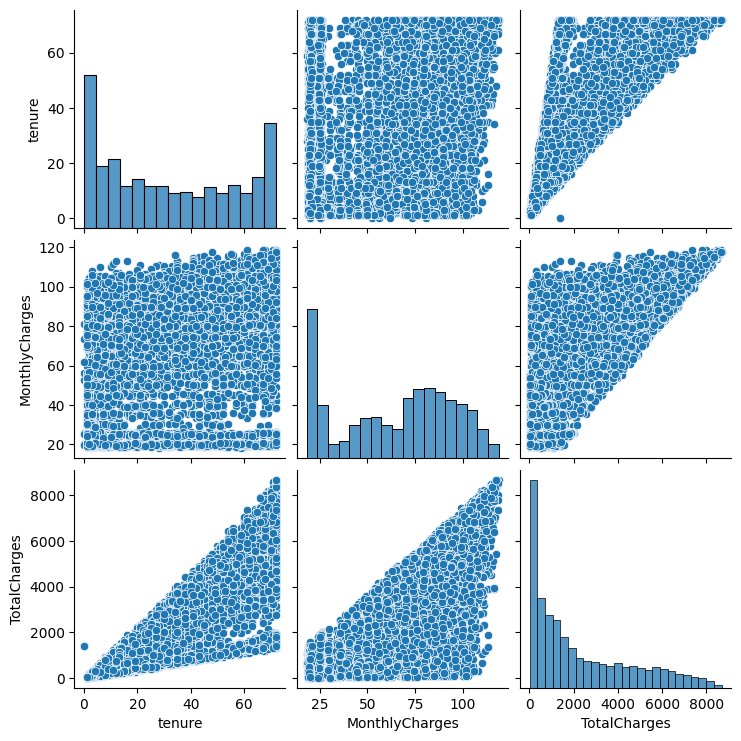

In [25]:
# Scatter plot matrix for numeric columns with churn as hue
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data[numeric_cols])
plt.show()


In [26]:
#print col names
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


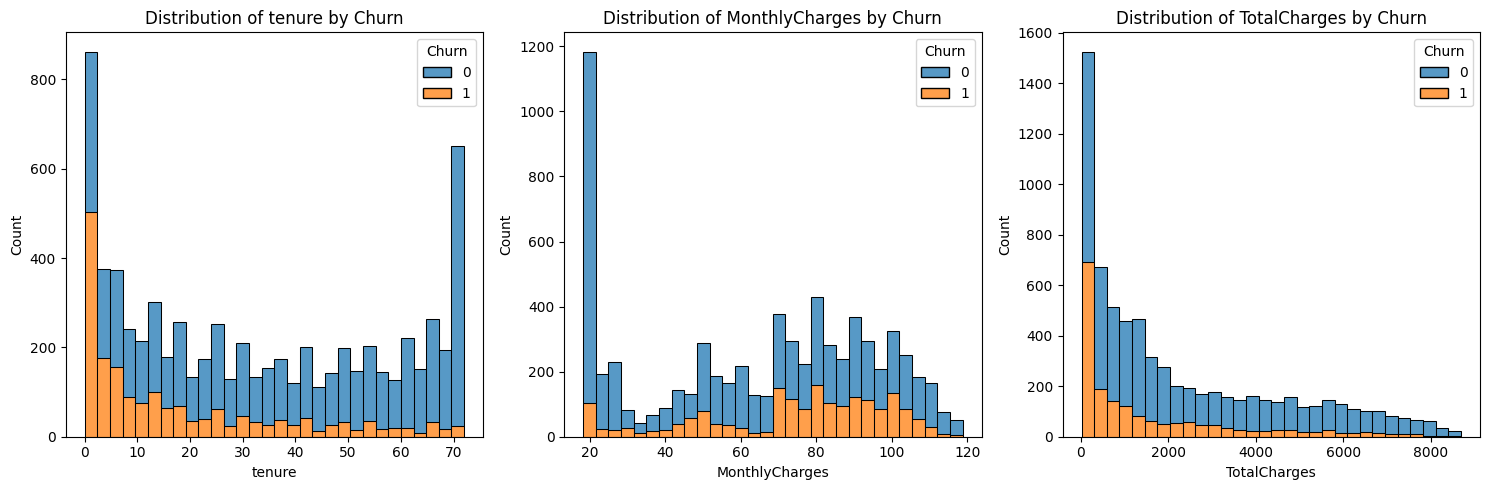

In [27]:
# distribution of numeric columns with Churn hue on same 1-3 canvas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    sns.histplot(data=data, x=col, hue='Churn', multiple='stack', bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.show()


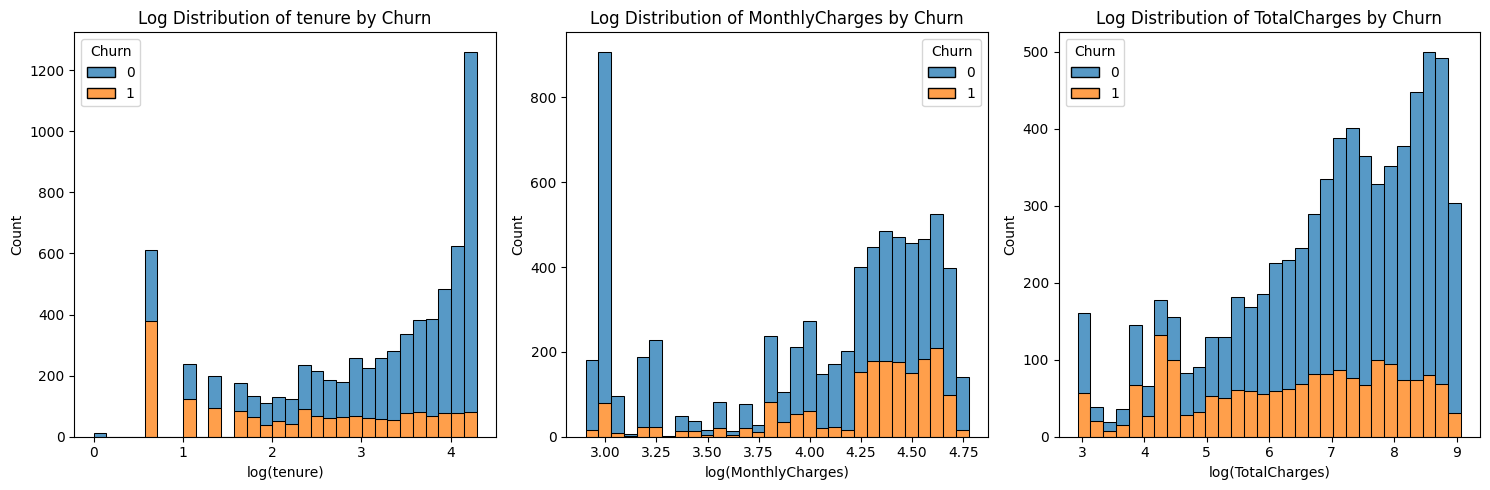

In [28]:
#log normal distribution of numeric columns on same 1-3 canvas
import numpy as np

# Create log-transformed distributions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    # Create a copy of the data to avoid modifying original
    plot_data = data.copy()
    
    # Apply log transformation (add small value to avoid log(0))
    # For tenure and MonthlyCharges, we might have 0 values
    if col == 'tenure':
        plot_data[f'log_{col}'] = np.log1p(plot_data[col])  # log1p handles 0 values better
    else:
        # Add small epsilon to avoid log(0) if any
        plot_data[f'log_{col}'] = np.log(plot_data[col] + 0.001)
    
    # Plot log-transformed distribution
    sns.histplot(data=plot_data, x=f'log_{col}', hue='Churn', 
                 multiple='stack', bins=30, ax=axes[i])
    axes[i].set_title(f'Log Distribution of {col} by Churn')
    axes[i].set_xlabel(f'log({col})')

plt.tight_layout()
plt.show()

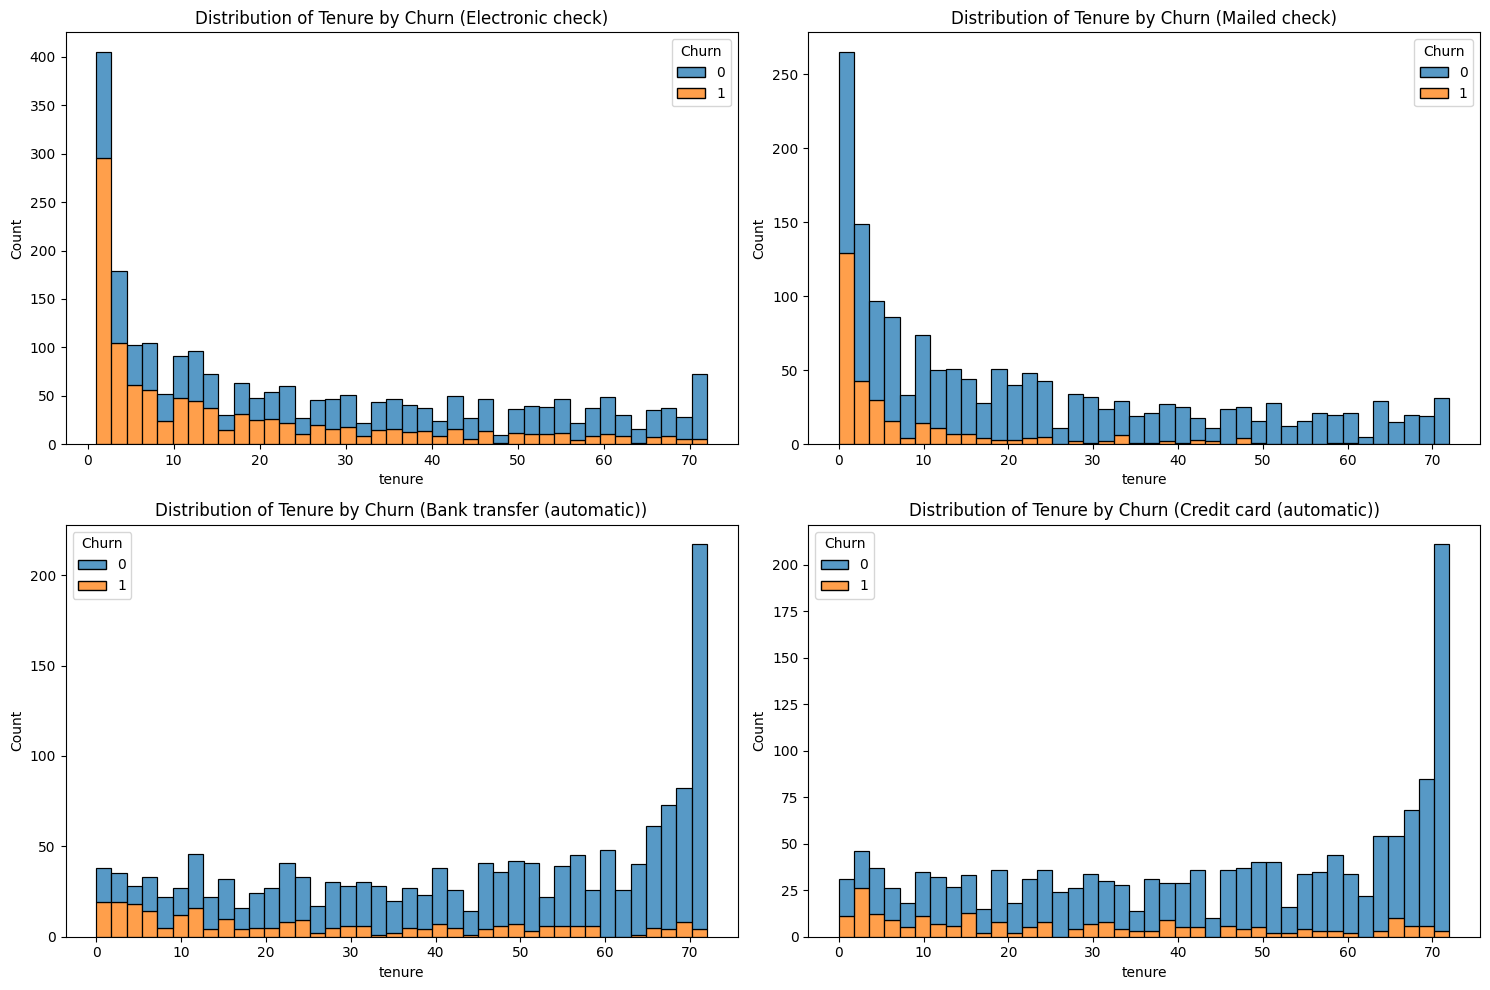

In [29]:
# distribution of tenure with bins 40 and churn, by all PaymentMethod on same canvas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, method in enumerate(data['PaymentMethod'].unique()):
    sns.histplot(data=data[data['PaymentMethod'] == method], x='tenure', hue='Churn', multiple='stack', bins=40, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of Tenure by Churn ({method})')
plt.tight_layout()
plt.show()



In [30]:
# I see that churn is drastically lower for high tenure, and even lower for other subsets like Mailed check.


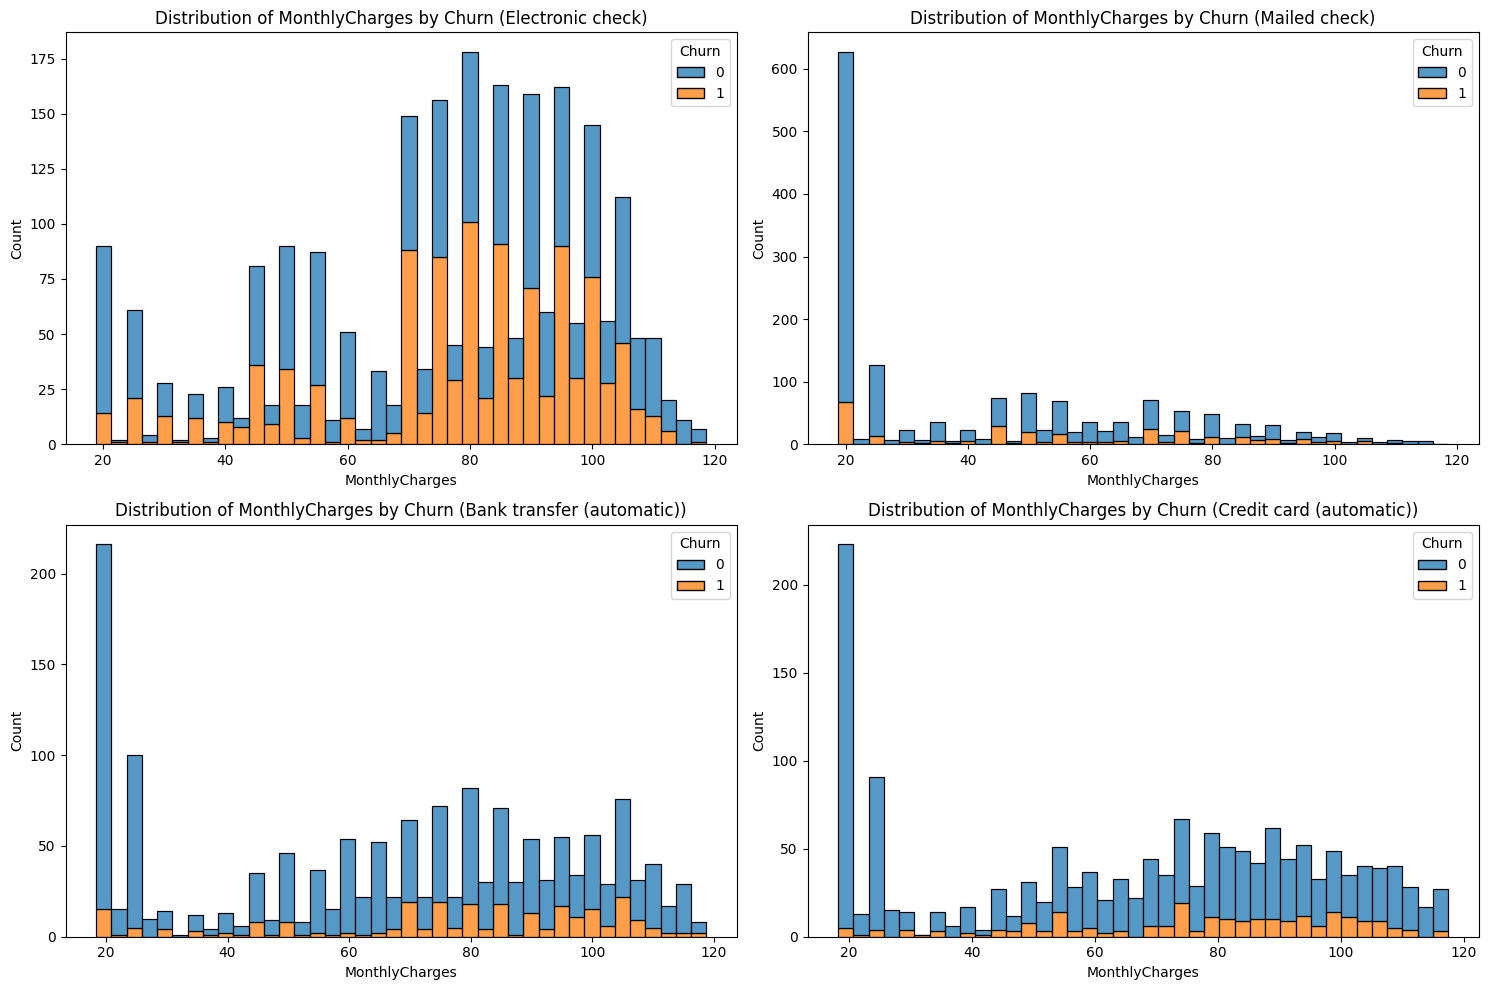

In [31]:
# distribution of MonthlyCharges with bins 40 and churn, by all PaymentMethod on same canvas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, method in enumerate(data['PaymentMethod'].unique()):
    sns.histplot(data=data[data['PaymentMethod'] == method], x='MonthlyCharges', hue='Churn', multiple='stack', bins=40, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of MonthlyCharges by Churn ({method})')
plt.tight_layout()
plt.show()



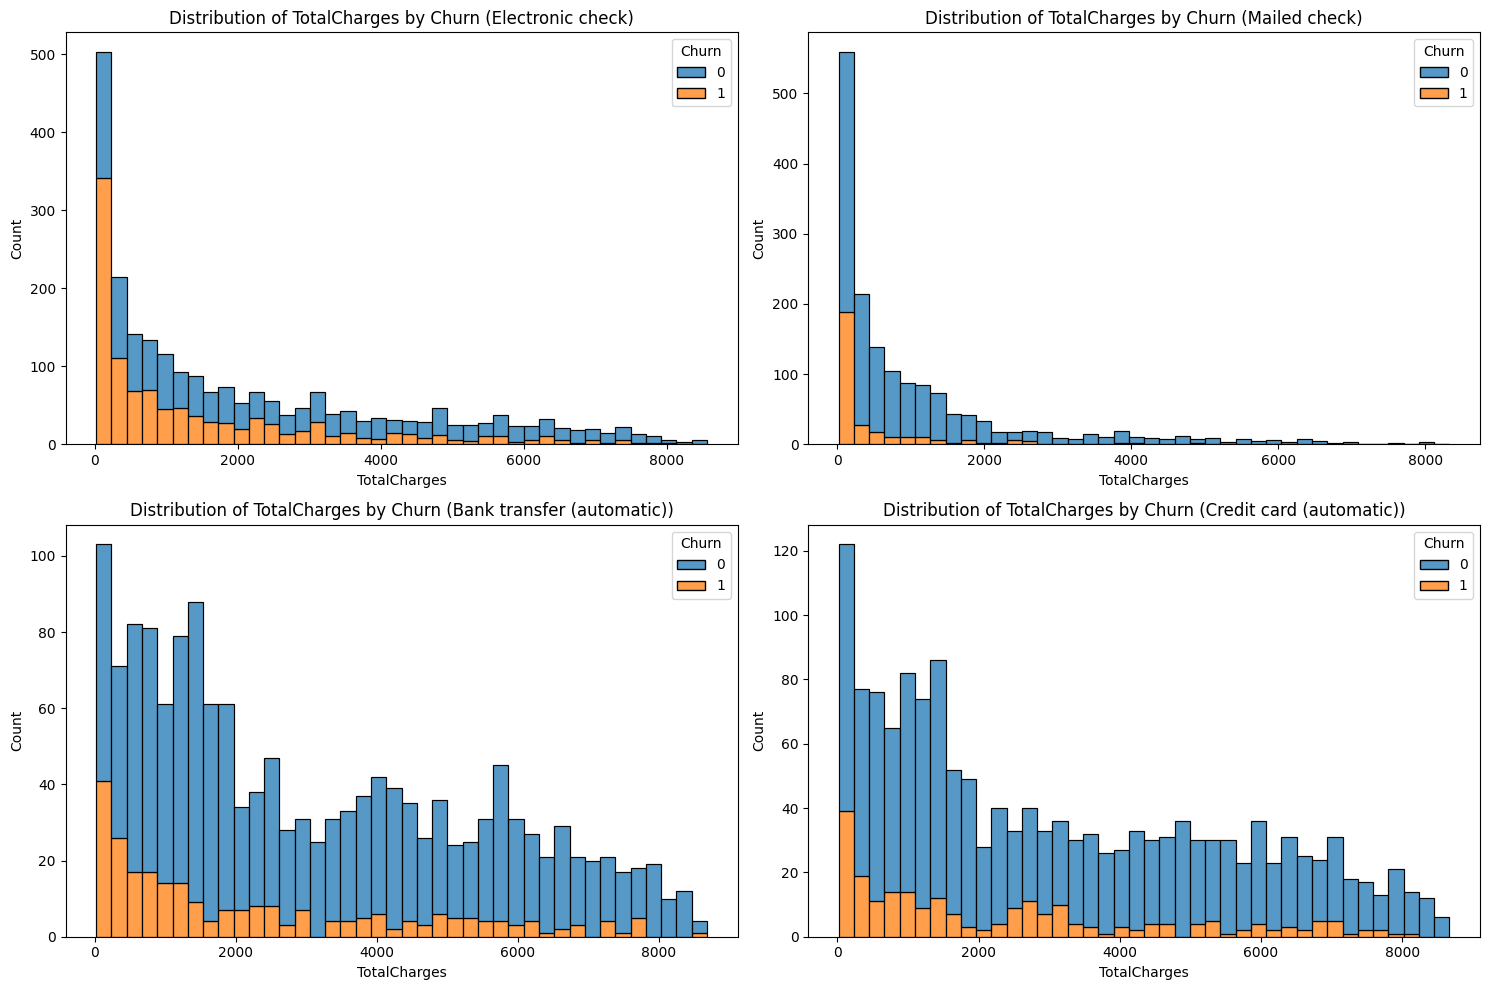

In [32]:
# distribution of TotalCharges with bins 40 and churn, by all PaymentMethod on same canvas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, method in enumerate(data['PaymentMethod'].unique()):
    sns.histplot(data=data[data['PaymentMethod'] == method], x='TotalCharges', hue='Churn', multiple='stack', bins=40, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of TotalCharges by Churn ({method})')
plt.tight_layout()
plt.show()



In [33]:
#tenure_group
#Out of this EDA, I see that tenure is a very important feature, as well as MonthlyCharges and TotalCharges.

#I want to bin tenure
data["tenure"].describe()

# Create bins for tenure function
def tenure_bin(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '13-24 Months'
    elif tenure <= 48:
        return '25-48 Months'
    elif tenure <= 60:
        return '49-60 Months'
    else:
        return '61-72 Months'

data['tenure_group'] = data['tenure'].apply(tenure_bin)
data['tenure_group'].value_counts()

tenure_group
0-12 Months     2186
25-48 Months    1594
61-72 Months    1407
13-24 Months    1024
49-60 Months     832
Name: count, dtype: int64

In [34]:
#LogTerm
# Also want to Classify LongTerm customers as those with tenure > 24 months (looking at the plots, churn is very low after 24 months)
data['LongTerm'] = data['tenure'].apply(lambda x: 1 if x > 24 else 0)
data['LongTerm'].value_counts()

LongTerm
1    3833
0    3210
Name: count, dtype: int64

In [35]:
# Contract Contract Type (Ordinal Encoding)
contract_order = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}
data['Contract'] = data['Contract'].map(contract_order)
data['Contract'].value_counts()

Contract
1    3875
3    1695
2    1473
Name: count, dtype: int64

In [36]:
# feature engineering: AvailingInternetService
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  Female              0        1           0       1             0   
1    Male              0        0           0      34             1   
2    Male              0        0           0       2             1   
3    Male              0        0           0      45             0   
4  Female              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0             DSL               0             1  ...   
1              0             DSL               1             0  ...   
2              0             DSL               1             1  ...   
3              0             DSL               1             0  ...   
4              0     Fiber optic               0             0  ...   

   StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0                0         1                 1   
1            0                0         2                 0   
2            0                0         1                 1   
3            0                0         2                 0   
4            0                0         1                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  \
0           Electronic check           29.85        29.85      0   
1               Mailed check           56.95      1889.50      0   
2               Mailed check           53.85       108.15      1   
3  Bank transfer (automatic)           42.30      1840.75      0   
4           Electronic check           70.70       151.65      1   

   tenure_group  LongTerm  
0   0-12 Months         0  
1  25-48 Months         1  
2   0-12 Months         0  
3  25-48 Months         1  
4   0-12 Months         0  

[5 rows x 22 columns]

In [37]:
#unique value count in MultipleLines column
data['MultipleLines'].value_counts()

MultipleLines
0    4072
1    2971
Name: count, dtype: int64

In [38]:
# unique value count in InternetService column
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [39]:
#unique values in PhoneService column when InternetService is 'No'
data[data['InternetService'] == 'No']['PhoneService'].value_counts()

PhoneService
1    1526
Name: count, dtype: int64

In [40]:
#Availing internet Service
data['AvailingInternetService'] = data['InternetService'].apply(lambda x: 0 if x == 'No' else 1)
data['AvailingInternetService'].value_counts()

AvailingInternetService
1    5517
0    1526
Name: count, dtype: int64

In [41]:
#print columns and their unique values
for column in data.columns:
    print(f"{column}: {data[column].unique()} + {data[column].dtypes}")

gender: ['Female' 'Male'] + object
SeniorCitizen: [0 1] + int64
Partner: [1 0] + int64
Dependents: [0 1] + int64
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] + int64
PhoneService: [0 1] + int64
MultipleLines: [0 1] + int64
InternetService: ['DSL' 'Fiber optic' 'No'] + object
OnlineSecurity: [0 1] + int64
OnlineBackup: [1 0] + int64
DeviceProtection: [0 1] + int64
TechSupport: [0 1] + int64
StreamingTV: [0 1] + int64
StreamingMovies: [0 1] + int64
Contract: [1 2 3] + int64
PaperlessBilling: [1 0] + int64
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] + object
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] + float64
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] + float64
Churn: [0 1] + int64
tenure_group: ['0-12 M

This reflectes that PhoneService when InternetService is 'No' is always "Yes"

The thought is to make all as services and make a feature of sum counts

A feature 
SumFeatures = (PhoneService + MultipleLines + AvailingInternetService + OnlineSecurity + OnlineBackup 
                + TechSupport + StreamingTV + StreamingMovies)

In [42]:
#NumServices
data['NumServices'] = (data['PhoneService'] + data['MultipleLines'] + data['AvailingInternetService'] +
                       data['OnlineSecurity'] + data['OnlineBackup'] + data['TechSupport'] +
                       data['StreamingTV'] + data['StreamingMovies'])
data['NumServices'].value_counts()


NumServices
1    1275
4    1110
5    1034
3     994
2     961
6     930
7     501
8     238
Name: count, dtype: int64

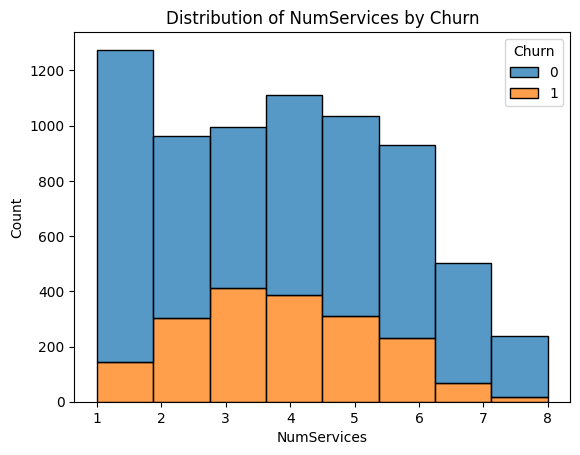

In [43]:
# Distribution of NumServices with Churn hue on same canvas
sns.histplot(data=data, x='NumServices', hue='Churn', multiple='stack', bins=8)
plt.title('Distribution of NumServices by Churn')
plt.show()

In [44]:
#max in monthly charges
data['MonthlyCharges'].max()

np.float64(118.75)

In [45]:
#min in monthly charges
data['MonthlyCharges'].min()

np.float64(18.25)

In [46]:
#min in TotalCharges
data['TotalCharges'].min()

np.float64(18.8)

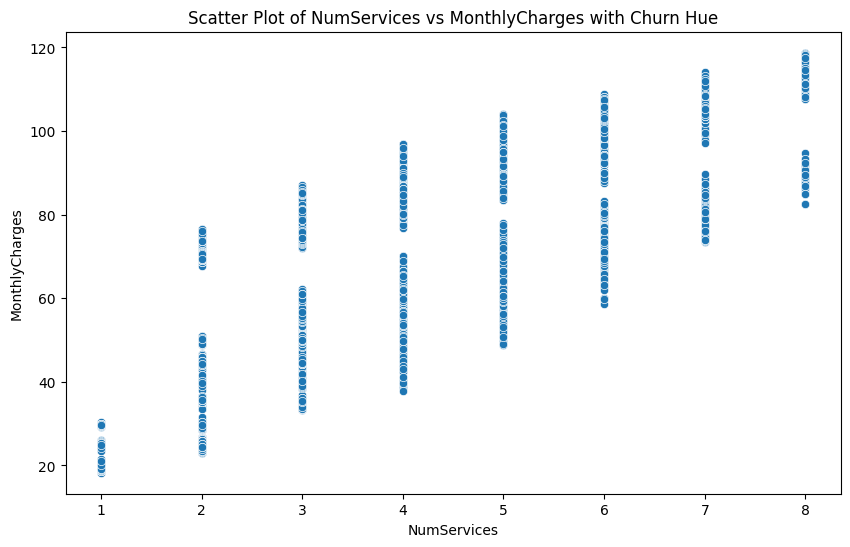

In [47]:
# what to create scatter plot of NumServices vs MonthlyCharges with Churn hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumServices', y='MonthlyCharges', data=data)
plt.title('Scatter Plot of NumServices vs MonthlyCharges with Churn Hue')
plt.show()

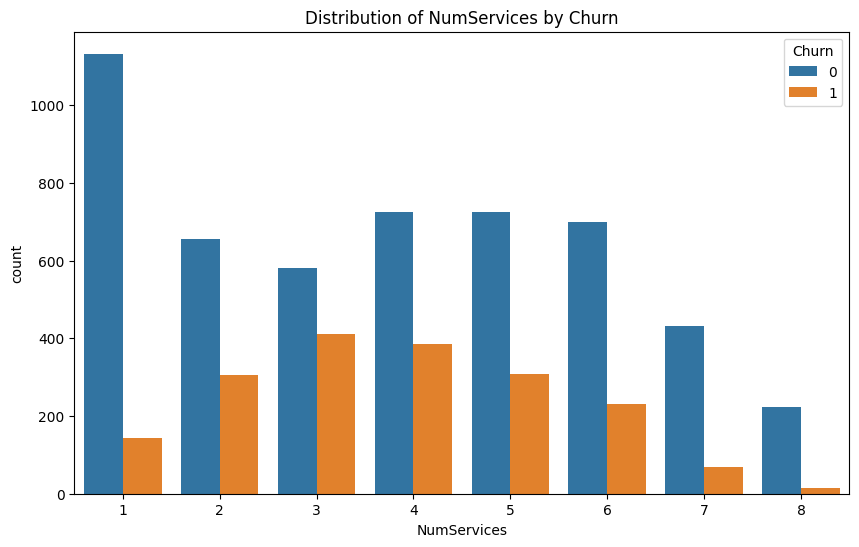

In [48]:
#distribution of NumServices by Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='NumServices', hue='Churn', data=data)
plt.title('Distribution of NumServices by Churn')
plt.show()

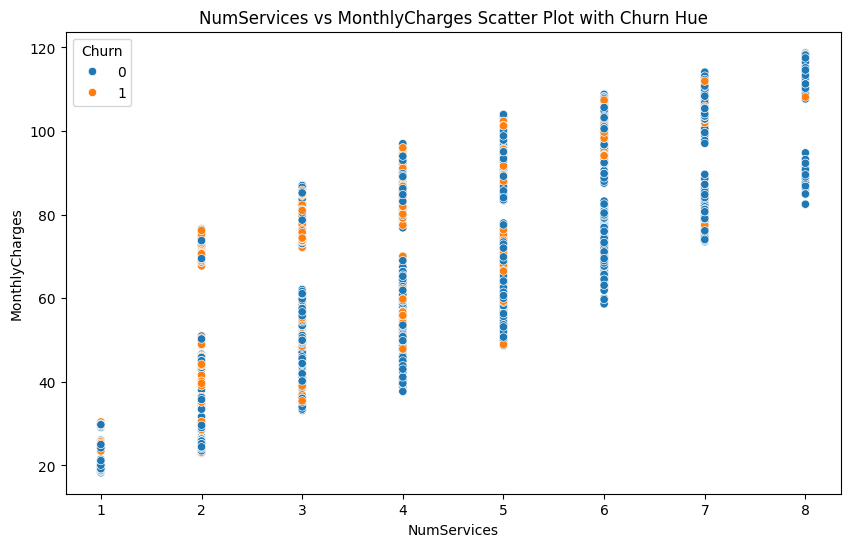

In [49]:
#NumService Vs MonthlyCharges scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumServices', y='MonthlyCharges', hue='Churn', data=data)
plt.title('NumServices vs MonthlyCharges Scatter Plot with Churn Hue')
plt.show()


Here I see some pure classes; so in my mind, I am thinking, a feature, MonthlyCharges/NumServices

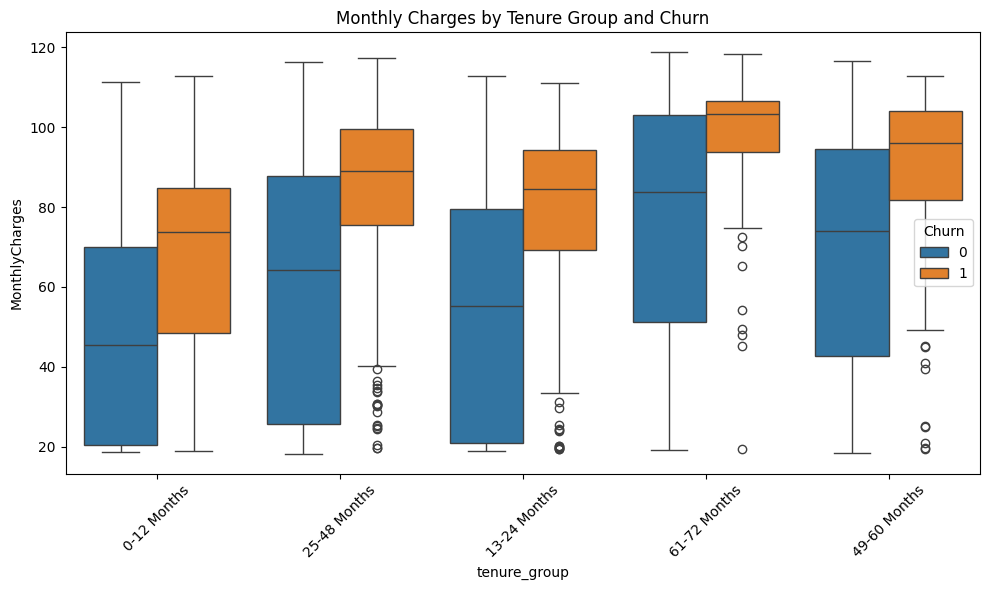

In [50]:
#want to see monthly charges by tenure group and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='tenure_group', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Monthly Charges by Tenure Group and Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

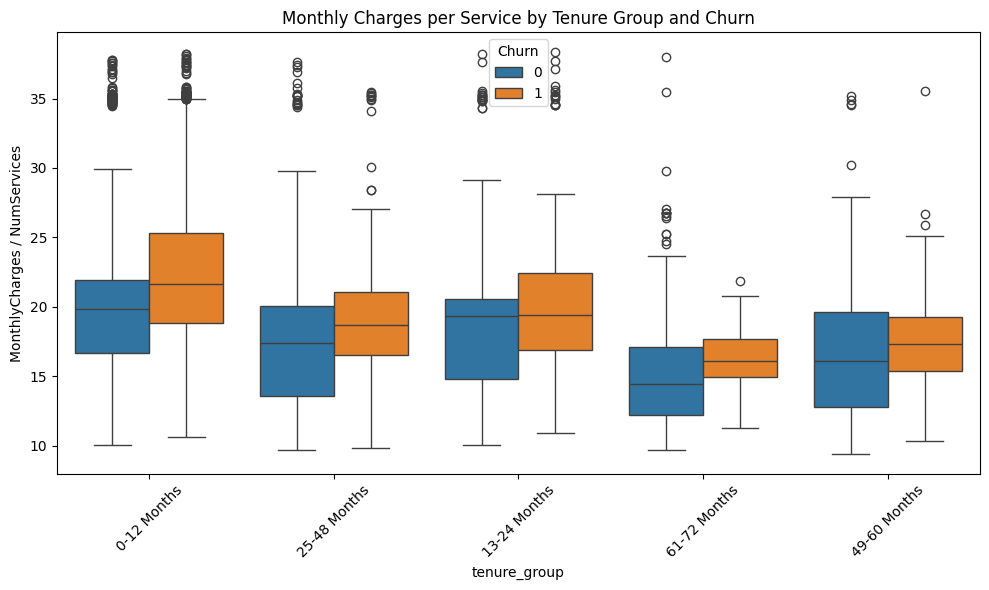

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='tenure_group',
    y=data['MonthlyCharges'] / data['NumServices'],
    hue='Churn',
    data=data
)
plt.title('Monthly Charges per Service by Tenure Group and Churn')
plt.ylabel('MonthlyCharges / NumServices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
summary_table = (
    data.groupby(['tenure_group', 'Churn'])[['MonthlyCharges', 'TotalCharges']]
        .median()
)

summary_table.style \
    .background_gradient(cmap='Reds') \
    .format("{:.2f}")


Clearly high paying clients in each group have a pattern to churn

75% or more of the people who Churned were paying higher than median MonthlyCharges, so if i just create a feature - 

MonthlyPerService = {       MonthlyCharges/NumServices          }

In [53]:
#feature engineering:
#AvgCharge: MonthlyCharges/NumServices
data['AvgCharge'] = data['MonthlyCharges'] / data['NumServices']

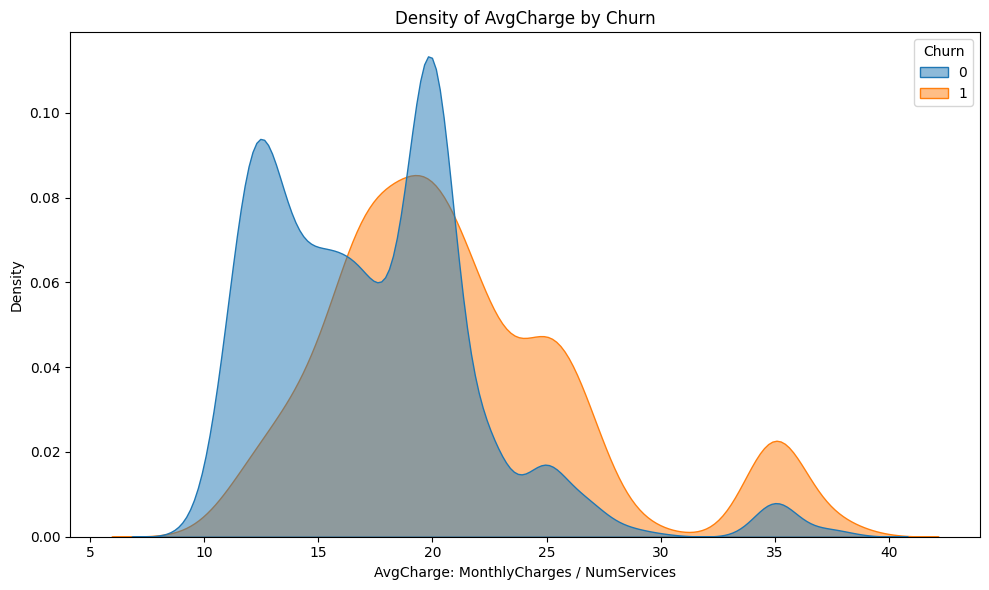

In [54]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=data,
    x=data['AvgCharge'],
    hue='Churn',
    common_norm=False,
    fill=True,
    alpha=0.5
)
plt.title('Density of AvgCharge by Churn')
plt.xlabel('AvgCharge: MonthlyCharges / NumServices')
plt.tight_layout()
plt.show()


In [55]:
# feature engineering: LessThan6Months
data['LessThan6Months'] = (data['tenure'] < 6).astype(int)

# value counts
data['LessThan6Months'].value_counts()

# notes: LessThan6Months feature captures very high churn risk in first 6 months

LessThan6Months
0    5672
1    1371
Name: count, dtype: int64

Features Engineered

| Column Name              | Description                                         | Data Type   | Example Values              |
|:-------------------------|:----------------------------------------------------|:------------|:----------------------------|
| tenure_group             | Categorical grouping of tenure into ranges         | object      | 0-12 Months, 25-48 Months   |
| LongTerm                 | Binary flag: 1 if tenure > 24 months               | int         | 0, 1                        |
| AvailingInternetService  | Binary flag: 1 if InternetService ≠ 'No'           | int         | 0, 1                        |
| NumServices              | Count of availed services                          | int         | 1–8                         |
| MonthlyChargesPerService | MonthlyCharges divided by NumServices              | float       | e.g. 14.93, 28.4            |
| LessThan6Months feature captures very high churn risk in first 6 months


In [56]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group', 'LongTerm',
       'AvailingInternetService', 'NumServices', 'AvgCharge',
       'LessThan6Months'],
      dtype='object')

In [57]:
data.dtypes

gender                      object
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService             object
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
Contract                     int64
PaperlessBilling             int64
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
Churn                        int64
tenure_group                object
LongTerm                     int64
AvailingInternetService      int64
NumServices                  int64
AvgCharge                  float64
LessThan6Months              int64
dtype: object

In [58]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumServices', 'AvgCharge']

boolean_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'LessThan6Months']

categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'tenure_group']

In [59]:
data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female              0        1           0       1             0   
1       Male              0        0           0      34             1   
2       Male              0        0           0       2             1   
3       Male              0        0           0      45             0   
4     Female              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038    Male              0        1           1      24             1   
7039  Female              0        1           1      72             1   
7040  Female              0        1           1      11             0   
7041    Male              1        1           0       4             1   
7042    Male              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  ...  \
0                 0             DSL               0             1  ...   
1                 0             DSL               1             0  ...   
2                 0             DSL               1             1  ...   
3                 0             DSL               1             0  ...   
4                 0     Fiber optic               0             0  ...   
...             ...             ...             ...           ...  ...   
7038              1             DSL               1             0  ...   
7039              1     Fiber optic               0             1  ...   
7040              0             DSL               1             0  ...   
7041              1     Fiber optic               0             0  ...   
7042              0     Fiber optic               1             0  ...   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0              Electronic check           29.85         29.85      0   
1                  Mailed check           56.95       1889.50      0   
2                  Mailed check           53.85        108.15      1   
3     Bank transfer (automatic)           42.30       1840.75      0   
4              Electronic check           70.70        151.65      1   
...                         ...             ...           ...    ...   
7038               Mailed check           84.80       1990.50      0   
7039    Credit card (automatic)          103.20       7362.90      0   
7040           Electronic check           29.60        346.45      0   
7041               Mailed check           74.40        306.60      1   
7042  Bank transfer (automatic)          105.65       6844.50      0   

      tenure_group  LongTerm AvailingInternetService  NumServices  AvgCharge  \
0      0-12 Months         0                       1            2  14.925000   
1     25-48 Months         1                       1            3  18.983333   
2      0-12 Months         0                       1            4  13.462500   
3     25-48 Months         1                       1            3  14.100000   
4      0-12 Months         0                       1            2  35.350000   
...            ...       ...                     ...          ...        ...   
7038  13-24 Months         0                       1            7  12.114286   
7039  61-72 Months         1                       1            6  17.200000   
7040   0-12 Months         0                       1            2  14.800000   
7041   0-12 Months         0                       1            3  24.800000   
7042  61-72 Months         1                       1            6  17.608333   

      LessThan6Months  
0                   1  
1                   0  
2                   1  
3                   0  
4                   1  
...               ...  
7038                0  
7039                0  
7040                0  
7041                1  
7042                0  

[7043 rows x 26 columns]

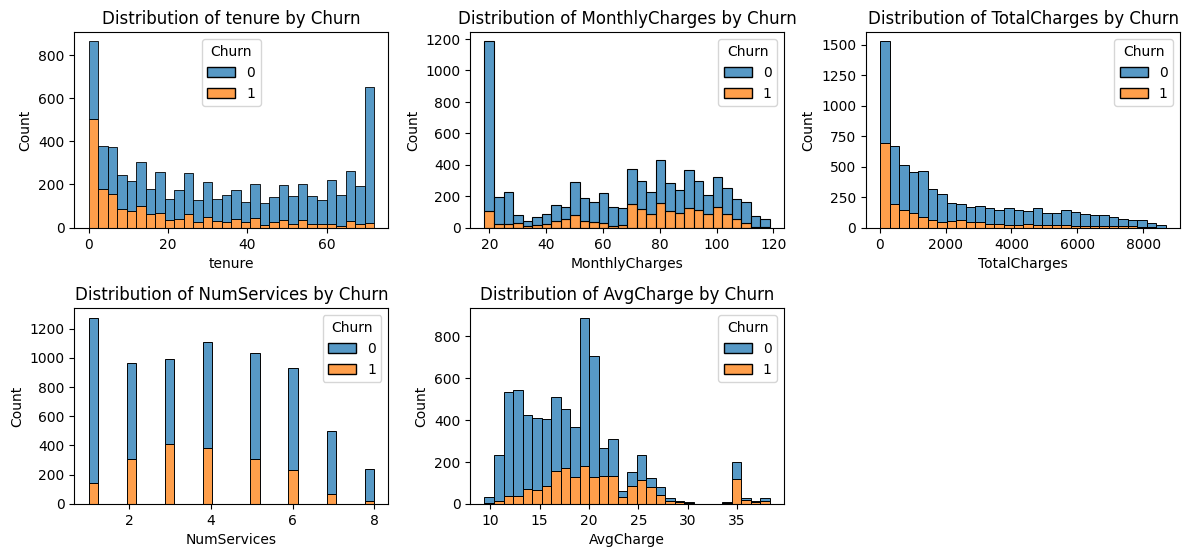

In [60]:
#distribution of numeric features on same canvas
plt.figure(figsize=(12, 8))
for col in numeric_features:
    plt.subplot(3, 3, numeric_features.index(col) + 1)
    sns.histplot(data=data, x=col, hue='Churn', multiple='stack', bins=30)
    plt.title(f'Distribution of {col} by Churn')
    plt.tight_layout()

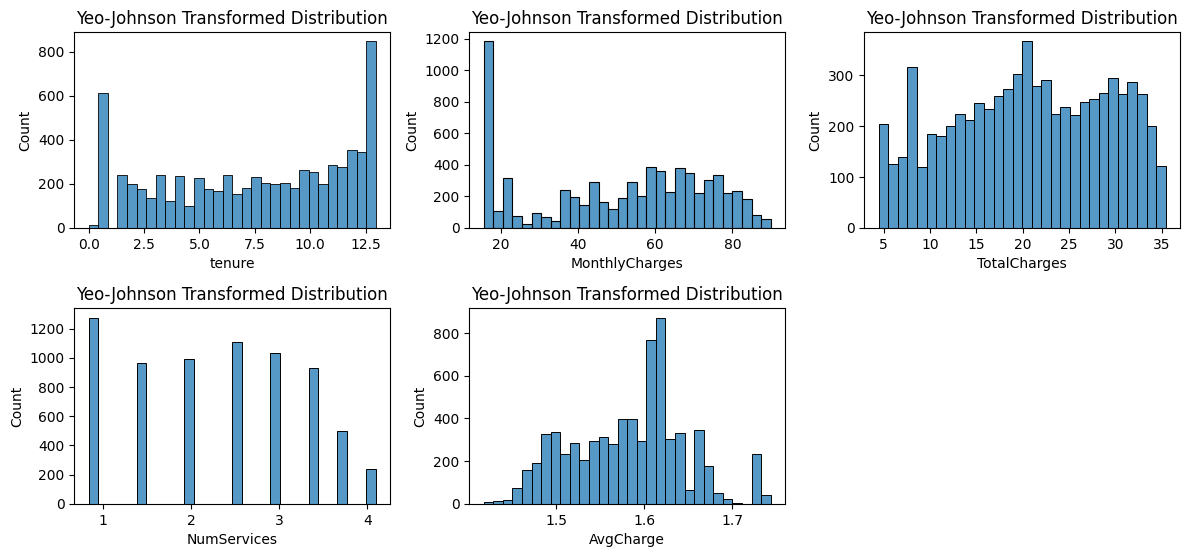

In [61]:
#creating data2 with Yeo-Johnson transformed numeric features and replacing original numeric features, plottting on one canvas
from sklearn.preprocessing import PowerTransformer
data2 = data.copy()
pt = PowerTransformer(method='yeo-johnson', standardize=False)
data2[numeric_features] = pt.fit_transform(data2[numeric_features])
data2.head()
plt.figure(figsize=(12, 8))
for col in numeric_features:
    plt.subplot(3, 3, numeric_features.index(col) + 1)
    sns.histplot(data=data2, x=col, multiple='stack', bins=30)
    plt.title(f'Yeo-Johnson Transformed Distribution')
    plt.tight_layout()
plt.show()

DATA MODELING STARTS HERE

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Optional: import for other models if you plan to use them later
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


Preprocessor Function

In [63]:
def get_preprocessor(X_train):
    # Column groups (manual or based on dtypes)
    categorical_features = ['gender', 'InternetService', 'PaymentMethod', 'tenure_group']
    
    numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumServices', 'AvgCharge']
    
    boolean_cols = [
        'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'LessThan6Months',
        'AvailingInternetService', 'LongTerm'  # If these are 0/1
    ]
    
    #Pipelines
    onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('power', PowerTransformer(method='yeo-johnson', standardize=True))
    ])
    
    preprocessor = ColumnTransformer([
        ('cat', onehot, categorical_features),
        ('num', 'passthrough', numeric_features),  # change to numeric_transformer if you want for logistic regression and Neural Networks
        ('bool', 'passthrough', boolean_cols)
    ])
    
    return preprocessor


In [64]:
# Target & Features
X = data.drop(columns=['Churn'])
y = data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessor
preprocessor = get_preprocessor(X_train)


Evaluation Function (for any pipeline)

# Model Registry

In [65]:
model_registry = {
    'dt': DecisionTreeClassifier(
        class_weight='balanced',
        criterion='gini',
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ),
    'rf': RandomForestClassifier(
        class_weight='balanced',
        criterion='gini',
        max_depth=10,
        min_samples_split=50,
        min_samples_leaf=20,
        max_features='sqrt',
        n_estimators=10000,
        bootstrap=True,
        oob_score=False,
        n_jobs=-1,
        random_state=42
    ),
    'gb': GradientBoostingClassifier(
        loss='log_loss',
        learning_rate=0.05,
        n_estimators=1000,
        criterion='friedman_mse',
        min_samples_split=10,
        min_samples_leaf=5,
        max_depth=3,
        validation_fraction=0.1,
        tol=0.0001,
        random_state=42
    ),
    'xgb': XGBClassifier(
        objective='binary:logistic',
        learning_rate=0.01,
        max_depth=3,
        min_child_weight=1,
        subsample=0.7,
        colsample_bytree=0.7,
        n_estimators=500,
        eval_metric='logloss',
        use_label_encoder=False,
        n_jobs=-1,
        random_state=42
    ),
    'lgbm': LGBMClassifier(
        objective='binary',
        learning_rate=0.01,
        n_estimators=500,
        max_depth=10,
        num_leaves=15,
        min_child_samples=20,
        min_child_weight=0.001,
        min_split_gain=0.0,
        subsample=1.0,
        colsample_bytree=1,
        reg_alpha=0.1,
        reg_lambda=0.5,
        n_jobs=-1,
        random_state=42
    ),
    'cat': CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=4,
        l2_leaf_reg=3,
        verbose=0,
        random_seed=42
    )
}


# Training + Evaluation Function

In [66]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import (
        classification_report, confusion_matrix, roc_auc_score, average_precision_score,
        brier_score_loss, roc_curve, precision_recall_curve,
        accuracy_score, precision_score, recall_score
    )
    from sklearn.calibration import calibration_curve

    def print_metrics_at_threshold(y_true, y_probs, threshold, dataset_name=""):
        y_pred = (y_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        report = classification_report(y_true, y_pred, digits=4)
        print(f"\n--- {dataset_name} Set Metrics (Threshold={threshold:.4f}) ---")
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"Classification Report:\n{report}")
        return y_pred

    # Get predicted probabilities for train and test
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_test_probs = model.predict_proba(X_test)[:, 1]

    # 1. Train metrics at threshold=0.5
    print_metrics_at_threshold(y_train, y_train_probs, 0.5, "Train")

    # 2a. Test metrics at threshold=0.5 (baseline)
    print_metrics_at_threshold(y_test, y_test_probs, 0.5, "Test (Default Threshold)")

    # --- Compute overall test set metrics ---
    roc_auc = roc_auc_score(y_test, y_test_probs)
    pr_auc = average_precision_score(y_test, y_test_probs)
    brier = brier_score_loss(y_test, y_test_probs)
    gini = 2 * roc_auc - 1

    # Best thresholds based on ROC curve and PR curve
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_test_probs)
    youden = tpr - fpr
    best_roc_idx = np.argmax(youden)
    best_roc_threshold = roc_thresholds[best_roc_idx]

    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_pr_idx = np.argmax(f1_scores)
    best_pr_threshold = pr_thresholds[best_pr_idx] if best_pr_idx < len(pr_thresholds) else 1.0

    # 2b. Test metrics at best PR threshold
    y_pred_best = print_metrics_at_threshold(y_test, y_test_probs, best_pr_threshold, "Test (Best PR Threshold)")

    cm_best = confusion_matrix(y_test, y_pred_best)
    prob_true, prob_pred = calibration_curve(y_test, y_test_probs, n_bins=10, strategy='quantile')

    def lorenz_curve(y_true, y_scores):
        idx = np.argsort(y_scores)[::-1]
        y_sorted = np.array(y_true)[idx]
        total_pos = np.sum(y_true)
        cum_pos = np.cumsum(y_sorted)
        return np.arange(1, len(y_true)+1) / len(y_true), cum_pos / total_pos

    x_lorenz, y_lorenz = lorenz_curve(y_test, y_test_probs)

    # Summary print
    print(f"\n=== Test Set Summary ===")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")
    print(f"Brier Score: {brier:.6f}")
    print(f"Gini Coefficient: {gini:.4f}")
    print(f"Best ROC Threshold (Youden's J): {best_roc_threshold:.4f}")
    print(f"Best PR Threshold (max F1): {best_pr_threshold:.4f}")

    # Plotting
    fig, axs = plt.subplots(3, 2, figsize=(16, 18))

    axs[0, 0].plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    axs[0, 0].scatter(fpr[best_roc_idx], tpr[best_roc_idx], color='red',
                      label=f"Best ROC Threshold = {best_roc_threshold:.4f}")
    axs[0, 0].plot([0,1], [0,1], 'k--', alpha=0.5)
    axs[0, 0].set_title("ROC Curve with Best Threshold")
    axs[0, 0].set_xlabel("False Positive Rate")
    axs[0, 0].set_ylabel("True Positive Rate")
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    axs[0, 1].plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")
    axs[0, 1].scatter(recall[best_pr_idx], precision[best_pr_idx], color='red',
                      label=f"Best PR Threshold = {best_pr_threshold:.4f}")
    axs[0, 1].set_title("Precision-Recall Curve with Best Threshold")
    axs[0, 1].set_xlabel("Recall")
    axs[0, 1].set_ylabel("Precision")
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    axs[1, 0].hist(y_test_probs[y_test == 0], bins=50, alpha=0.5, label="No Churn", density=True)
    axs[1, 0].hist(y_test_probs[y_test == 1], bins=50, alpha=0.5, label="Churn", density=True)
    axs[1, 0].axvline(best_pr_threshold, color='green', linestyle='--',
                      label=f"Best Threshold = {best_pr_threshold:.4f}")
    axs[1, 0].set_title("Histogram of Predicted Probabilities")
    axs[1, 0].set_xlabel("Predicted Probability")
    axs[1, 0].set_ylabel("Density")
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', ax=axs[1, 1],
                xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    axs[1, 1].set_title(f"Confusion Matrix (Threshold = {best_pr_threshold:.4f})")
    axs[1, 1].set_xlabel("Predicted")
    axs[1, 1].set_ylabel("Actual")

    axs[2, 0].plot(prob_pred, prob_true, 'o-', label="Model")
    axs[2, 0].plot([0,1], [0,1], '--', label="Perfect Calibration")
    axs[2, 0].set_title("Calibration Curve")
    axs[2, 0].set_xlabel("Mean Predicted Probability")
    axs[2, 0].set_ylabel("Fraction of Churners")
    axs[2, 0].legend()
    axs[2, 0].grid(True)

    axs[2, 1].plot(x_lorenz, y_lorenz, label="Model CAP")
    axs[2, 1].plot([0,1], [0,1], '--', label="Random Model")
    axs[2, 1].set_title("Lorenz Curve (Cumulative Accuracy Profile)")
    axs[2, 1].set_xlabel("Fraction of Customers")
    axs[2, 1].set_ylabel("Fraction of Churners Captured")
    axs[2, 1].legend()
    axs[2, 1].grid(True)

    plt.tight_layout()
    plt.show()

    return {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'brier': brier,
        'gini': gini,
        'thresholds': {
            'default': 0.5,
            'roc': best_roc_threshold,
            'pr': best_pr_threshold
        },
        'confusion_matrix': cm_best
    }


# Train and Evaluate Model

In [68]:
def run_model(model_key):
    clf = model_registry[model_key]

    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    pipe.fit(X_train, y_train)
    results = evaluate_model(pipe, X_test, y_test, X_test, y_test)
    return pipe, results


# Use

'dt': DecisionTreeClassifier

'rf': RandomForestClassifier

'gb': GradientBoostingClassifier

'xgb': XGBClassifier

'lgbm': LGBMClassifier

'cat': CatBoostClassifier


--- Train Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7516
Precision: 0.5217
Recall:    0.7727
Classification Report:
              precision    recall  f1-score   support

           0     0.9006    0.7440    0.8148      1035
           1     0.5217    0.7727    0.6228       374

    accuracy                         0.7516      1409
   macro avg     0.7111    0.7583    0.7188      1409
weighted avg     0.8000    0.7516    0.7639      1409


--- Test (Default Threshold) Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7516
Precision: 0.5217
Recall:    0.7727
Classification Report:
              precision    recall  f1-score   support

           0     0.9006    0.7440    0.8148      1035
           1     0.5217    0.7727    0.6228       374

    accuracy                         0.7516      1409
   macro avg     0.7111    0.7583    0.7188      1409
weighted avg     0.8000    0.7516    0.7639      1409


--- Test (Best PR Threshold) Set Metrics (Threshold=0.6072) ---
Accuracy:  0.794

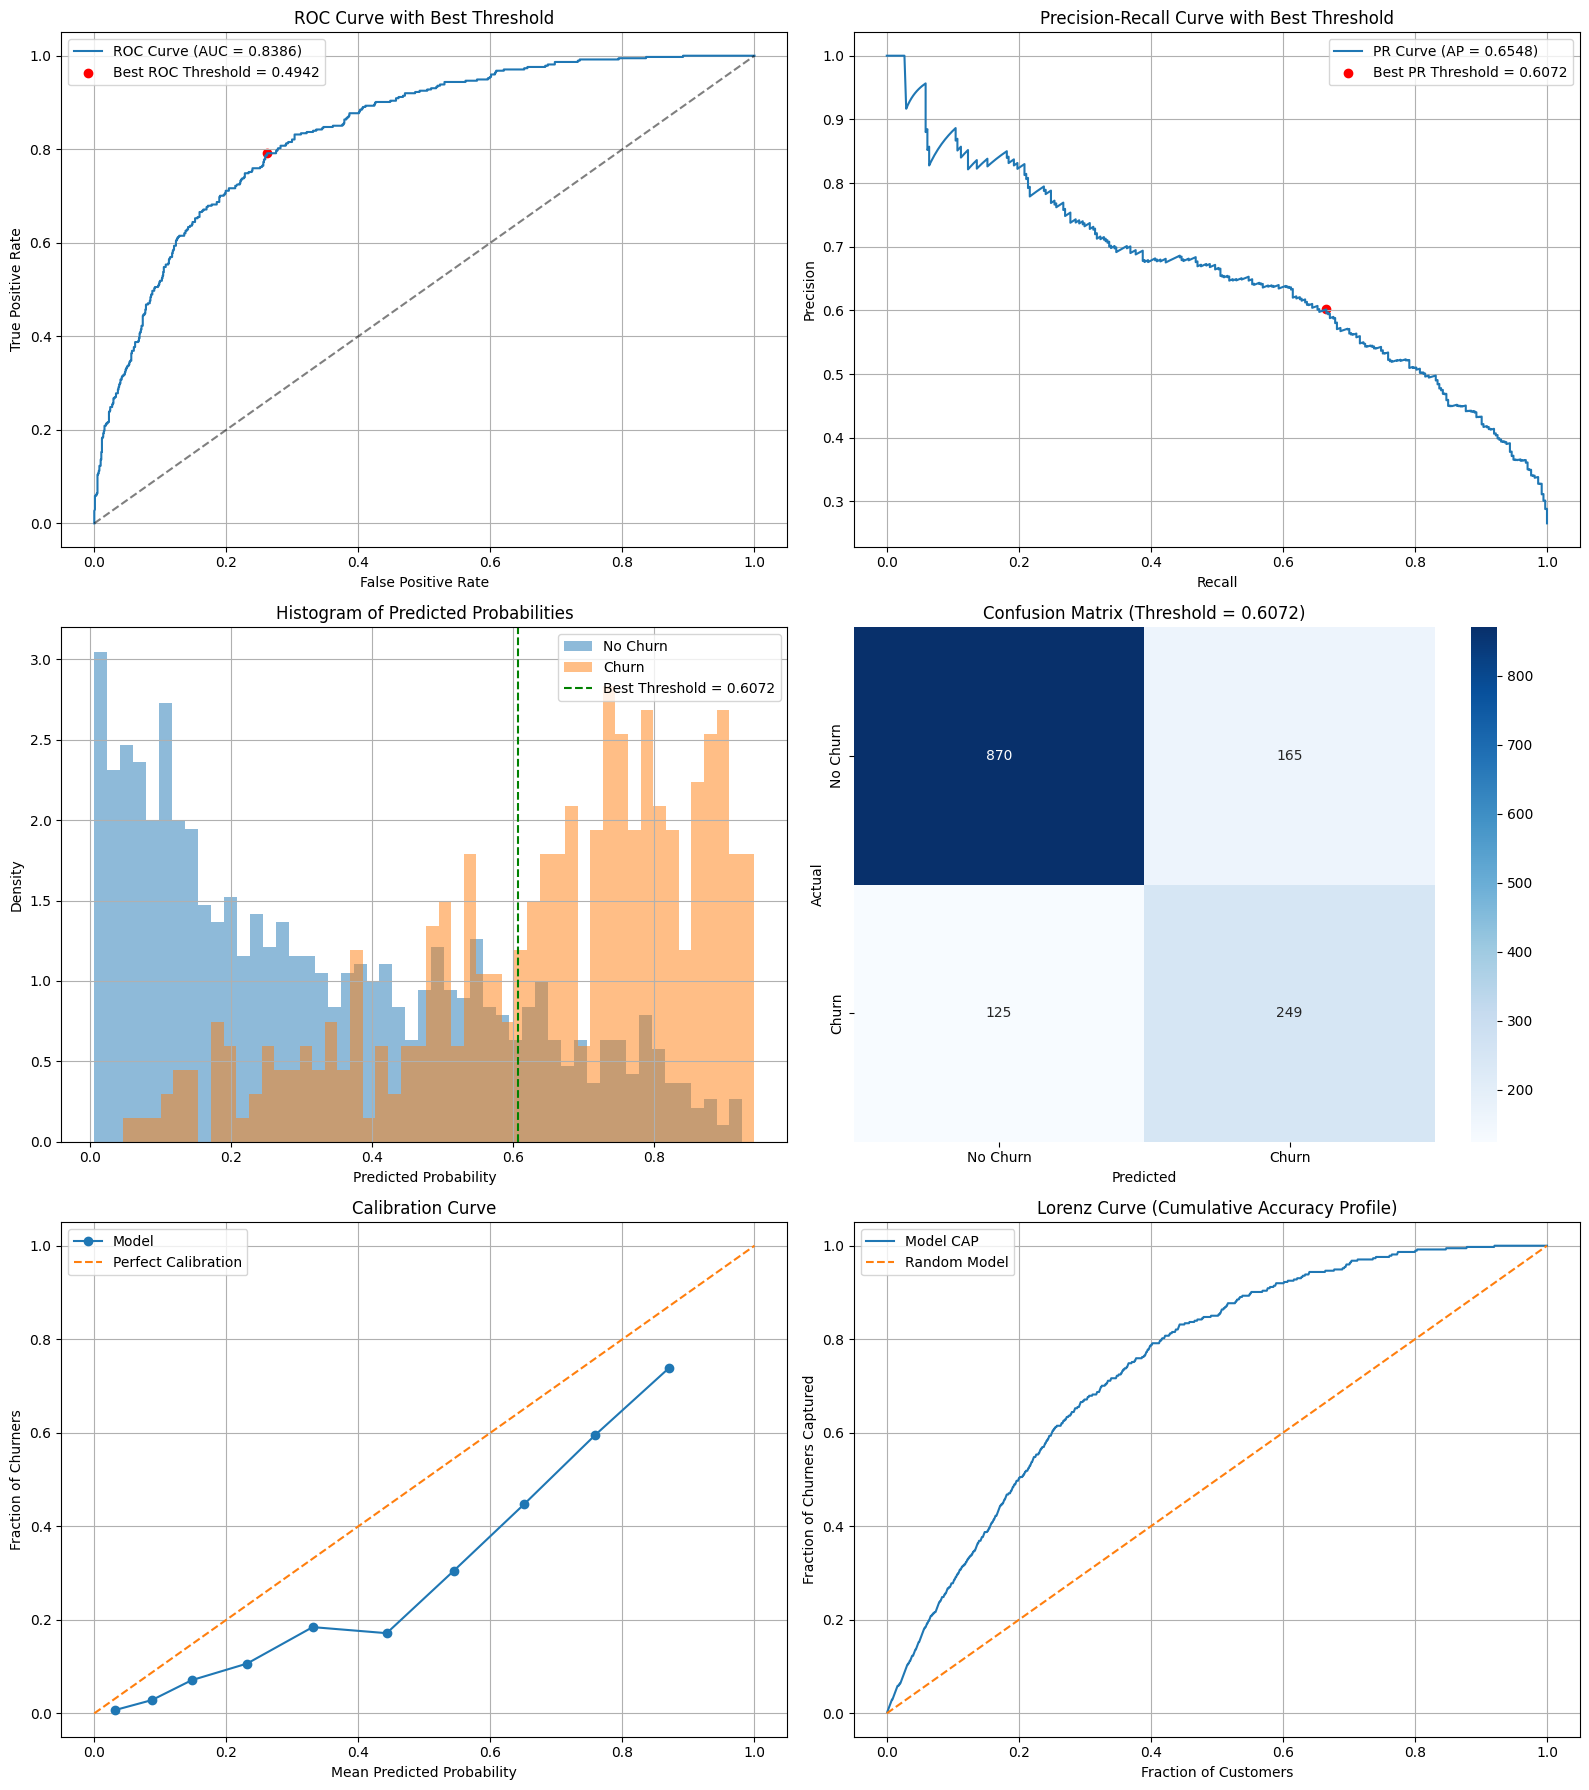

In [276]:
model_key = 'rf'   # change to: 'dt', 'gb', 'xgb', 'lgbm', 'cat', 'rf'
model, results = run_model(model_key)


🚀 Evaluating DT...

--- Train Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7104
Precision: 0.4731
Recall:    0.7995
Classification Report:
              precision    recall  f1-score   support

           0     0.9035    0.6783    0.7748      1035
           1     0.4731    0.7995    0.5944       374

    accuracy                         0.7104      1409
   macro avg     0.6883    0.7389    0.6846      1409
weighted avg     0.7892    0.7104    0.7269      1409


--- Test (Default Threshold) Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7104
Precision: 0.4731
Recall:    0.7995
Classification Report:
              precision    recall  f1-score   support

           0     0.9035    0.6783    0.7748      1035
           1     0.4731    0.7995    0.5944       374

    accuracy                         0.7104      1409
   macro avg     0.6883    0.7389    0.6846      1409
weighted avg     0.7892    0.7104    0.7269      1409


--- Test (Best PR Threshold) Set Metrics (Threshold=0.6505) -

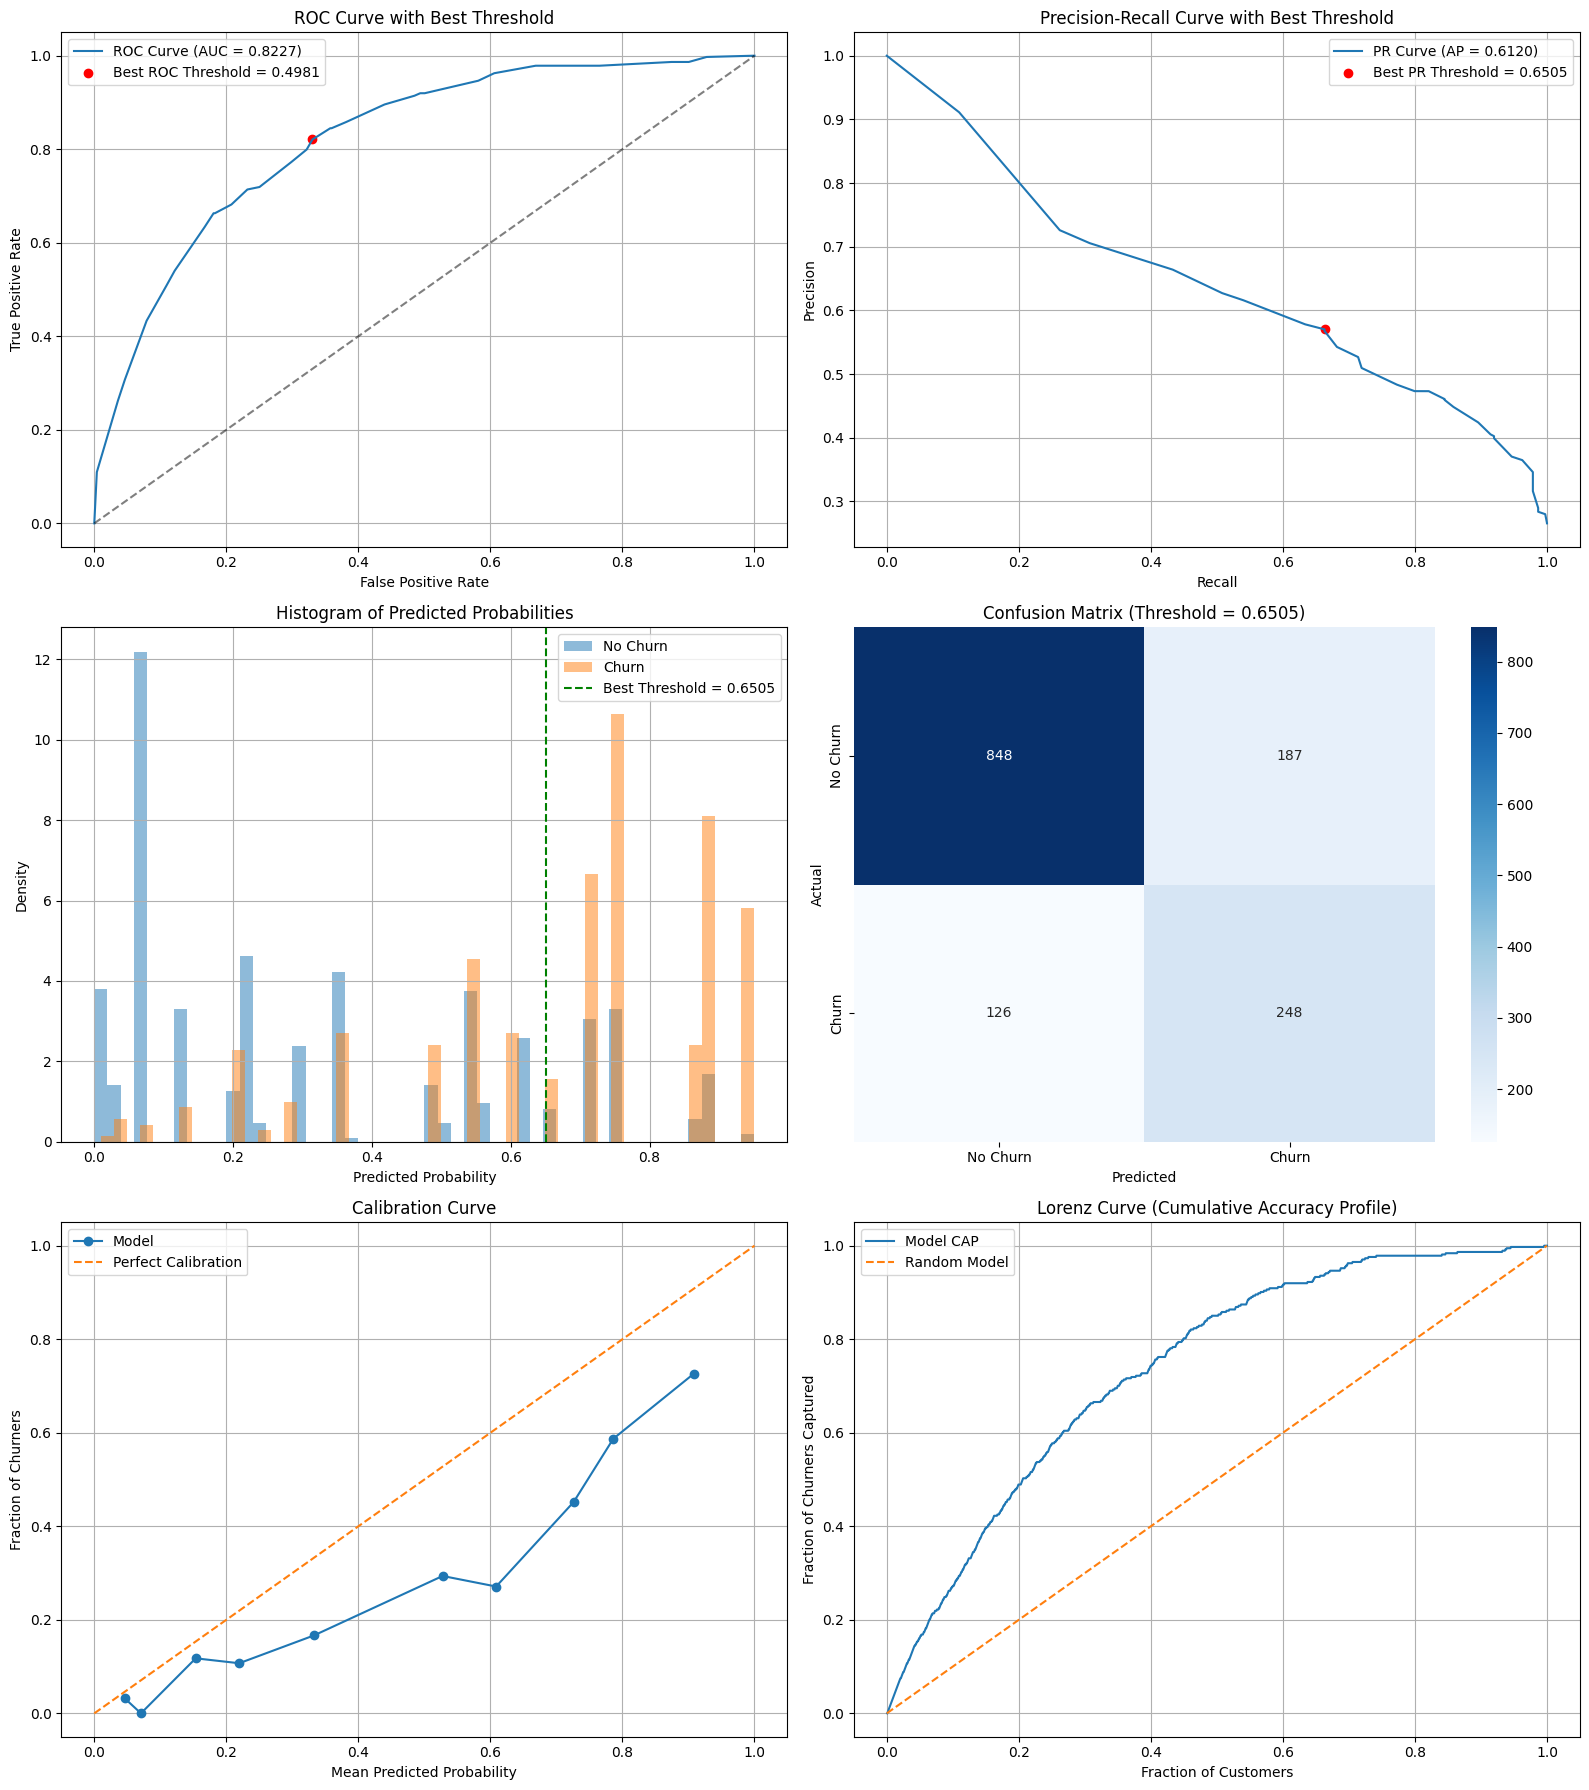

🚀 Evaluating RF...

--- Train Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7516
Precision: 0.5217
Recall:    0.7727
Classification Report:
              precision    recall  f1-score   support

           0     0.9006    0.7440    0.8148      1035
           1     0.5217    0.7727    0.6228       374

    accuracy                         0.7516      1409
   macro avg     0.7111    0.7583    0.7188      1409
weighted avg     0.8000    0.7516    0.7639      1409


--- Test (Default Threshold) Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7516
Precision: 0.5217
Recall:    0.7727
Classification Report:
              precision    recall  f1-score   support

           0     0.9006    0.7440    0.8148      1035
           1     0.5217    0.7727    0.6228       374

    accuracy                         0.7516      1409
   macro avg     0.7111    0.7583    0.7188      1409
weighted avg     0.8000    0.7516    0.7639      1409


--- Test (Best PR Threshold) Set Metrics (Threshold=0.6072) -

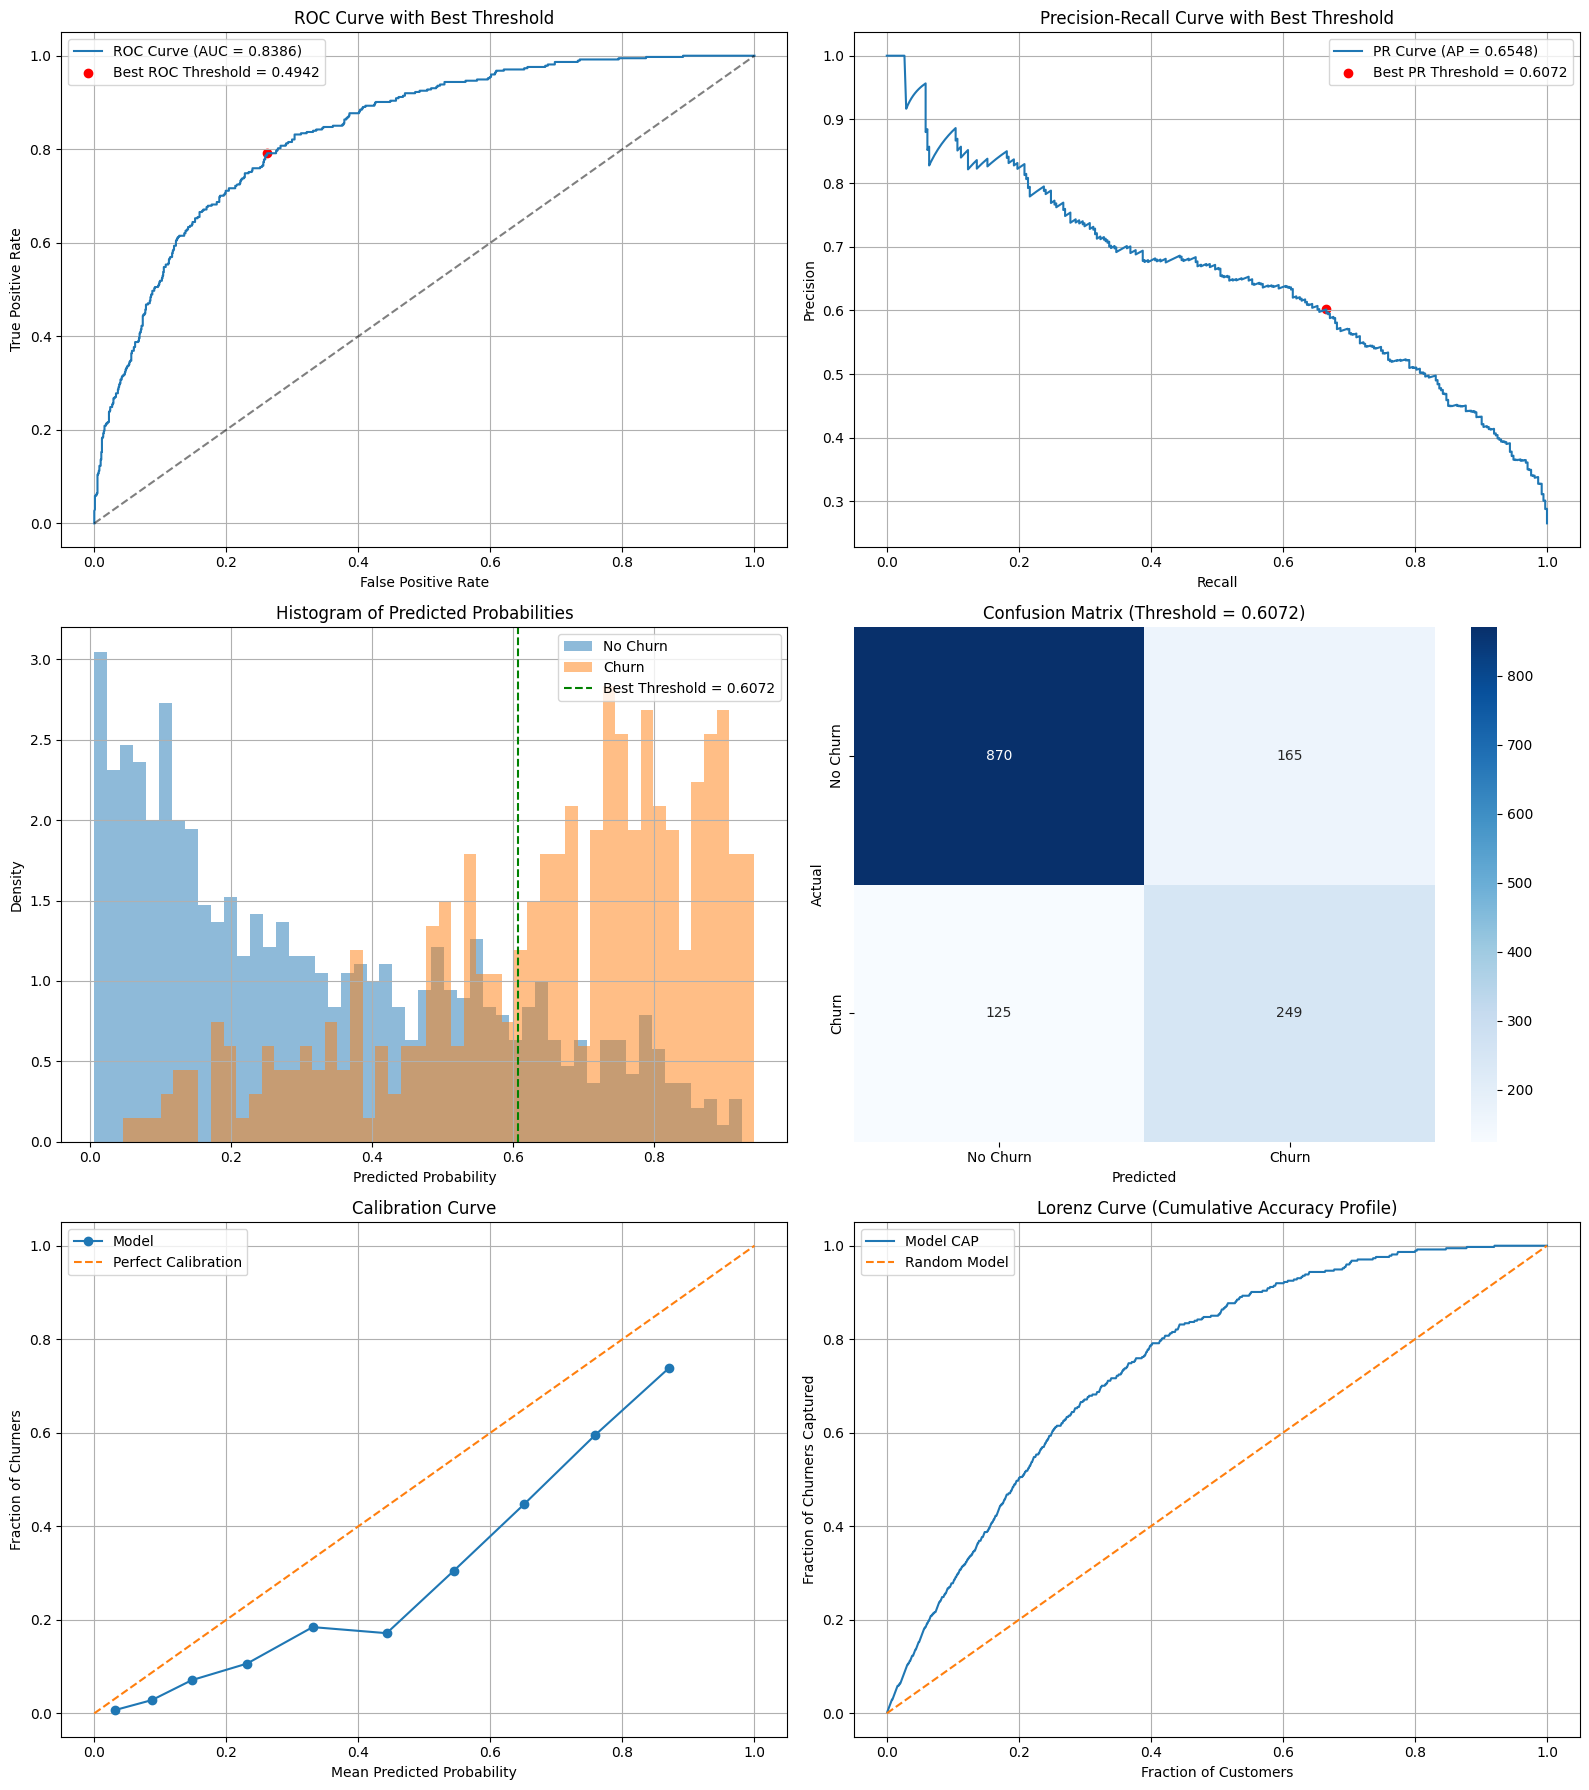

🚀 Evaluating GB...

--- Train Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7864
Precision: 0.6229
Recall:    0.4947
Classification Report:
              precision    recall  f1-score   support

           0     0.8300    0.8918    0.8598      1035
           1     0.6229    0.4947    0.5514       374

    accuracy                         0.7864      1409
   macro avg     0.7265    0.6932    0.7056      1409
weighted avg     0.7751    0.7864    0.7779      1409


--- Test (Default Threshold) Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7864
Precision: 0.6229
Recall:    0.4947
Classification Report:
              precision    recall  f1-score   support

           0     0.8300    0.8918    0.8598      1035
           1     0.6229    0.4947    0.5514       374

    accuracy                         0.7864      1409
   macro avg     0.7265    0.6932    0.7056      1409
weighted avg     0.7751    0.7864    0.7779      1409


--- Test (Best PR Threshold) Set Metrics (Threshold=0.2621) -

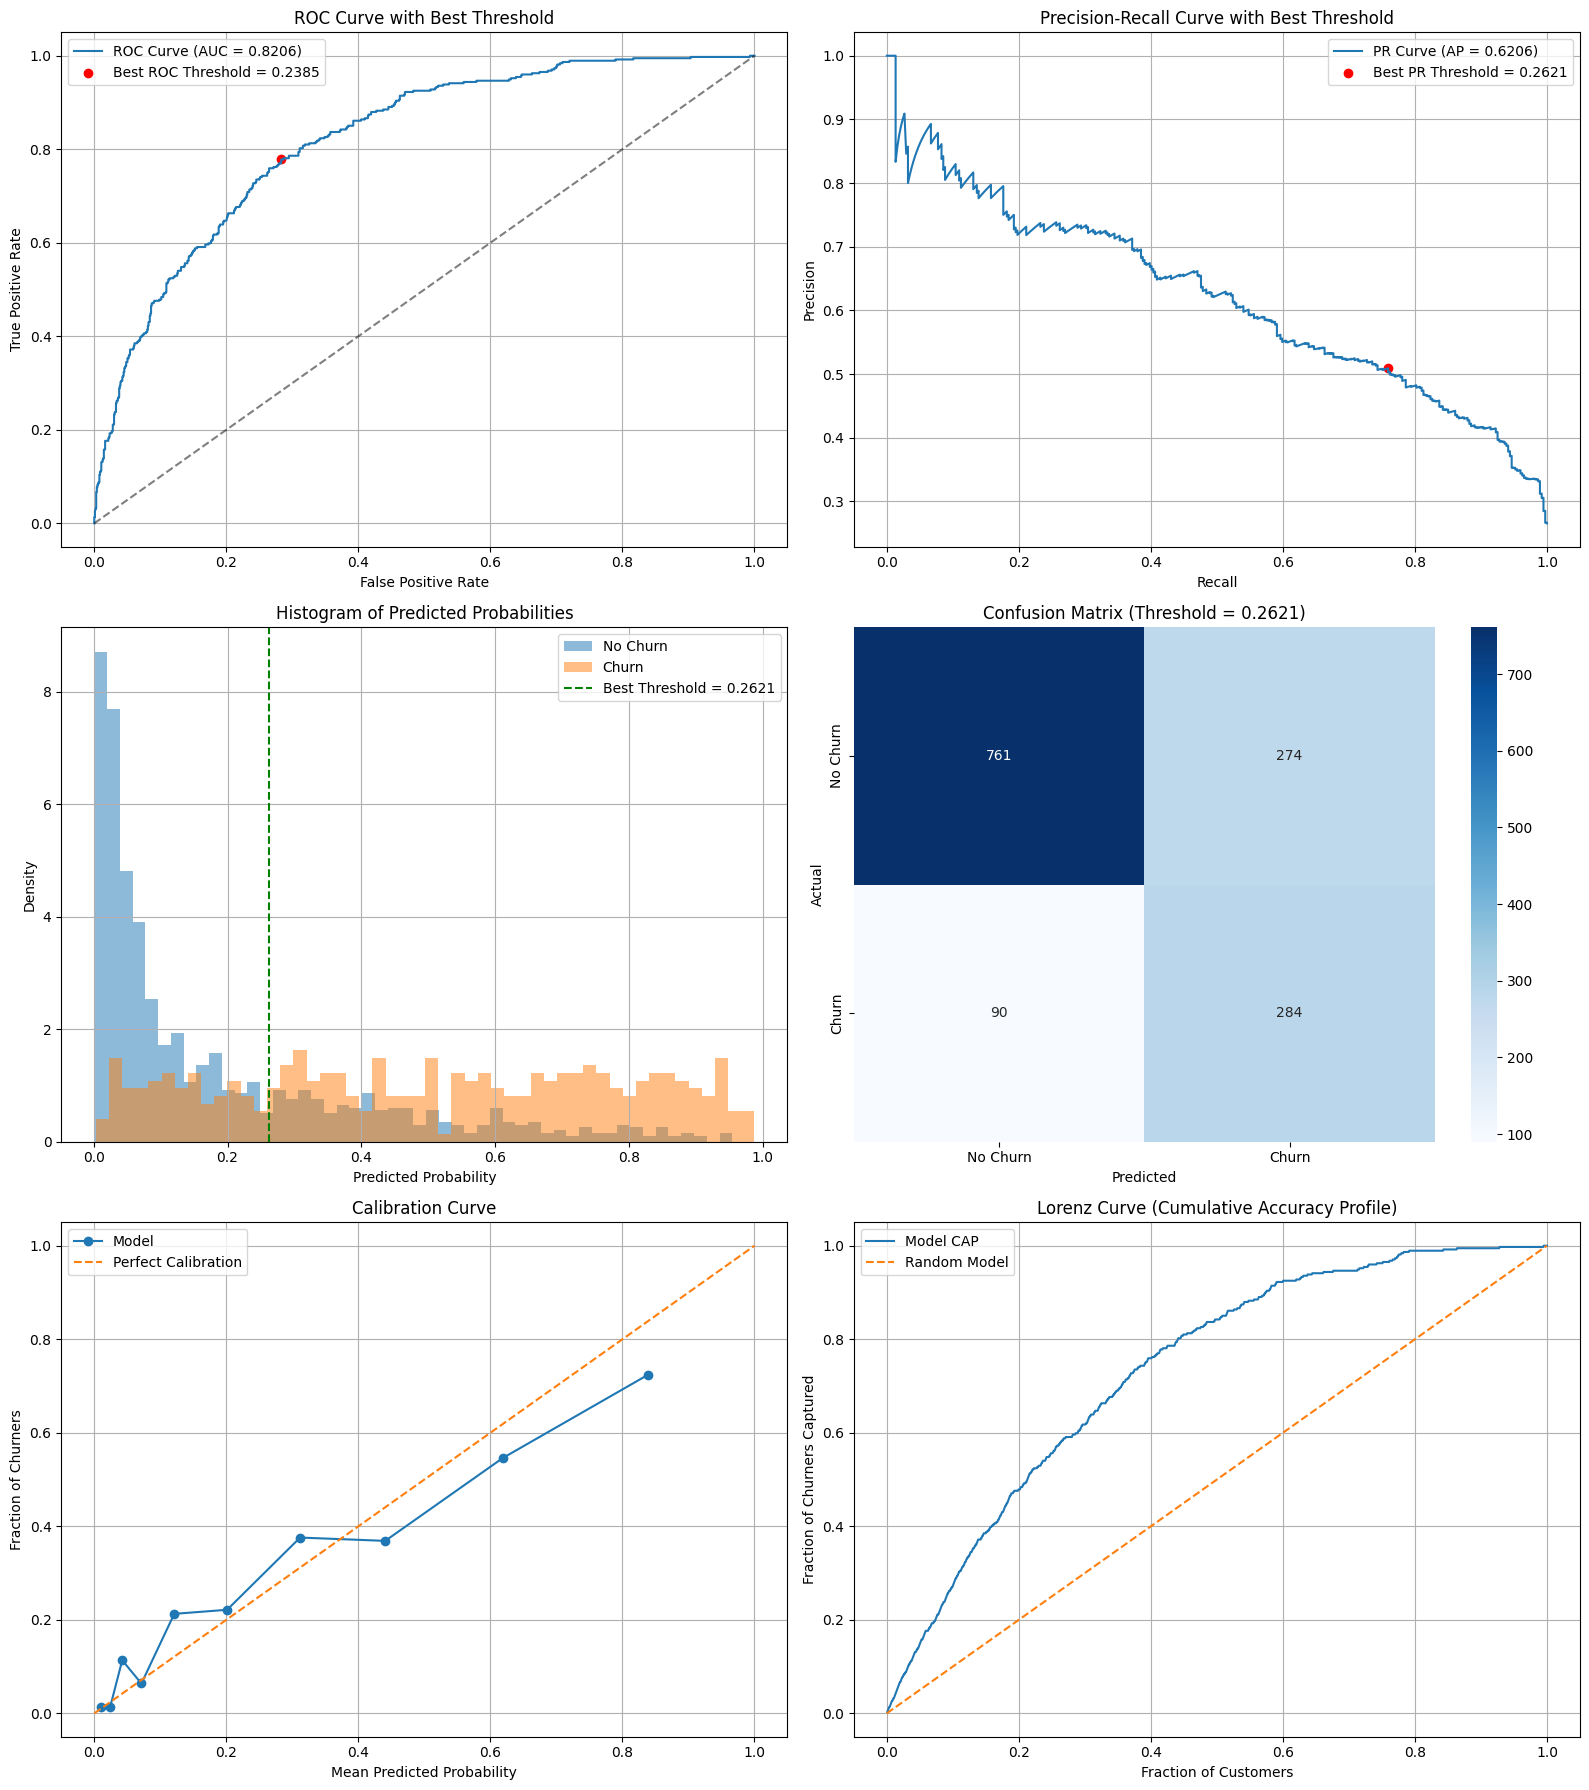

🚀 Evaluating XGB...


/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [00:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Train Set Metrics (Threshold=0.5000) ---
Accuracy:  0.8034
Precision: 0.6667
Recall:    0.5187
Classification Report:
              precision    recall  f1-score   support

           0     0.8390    0.9063    0.8713      1035
           1     0.6667    0.5187    0.5835       374

    accuracy                         0.8034      1409
   macro avg     0.7528    0.7125    0.7274      1409
weighted avg     0.7933    0.8034    0.7949      1409


--- Test (Default Threshold) Set Metrics (Threshold=0.5000) ---
Accuracy:  0.8034
Precision: 0.6667
Recall:    0.5187
Classification Report:
              precision    recall  f1-score   support

           0     0.8390    0.9063    0.8713      1035
           1     0.6667    0.5187    0.5835       374

    accuracy                         0.8034      1409
   macro avg     0.7528    0.7125    0.7274      1409
weighted avg     0.7933    0.8034    0.7949      1409


--- Test (Best PR Threshold) Set Metrics (Threshold=0.4232) ---
Accuracy:  0.802

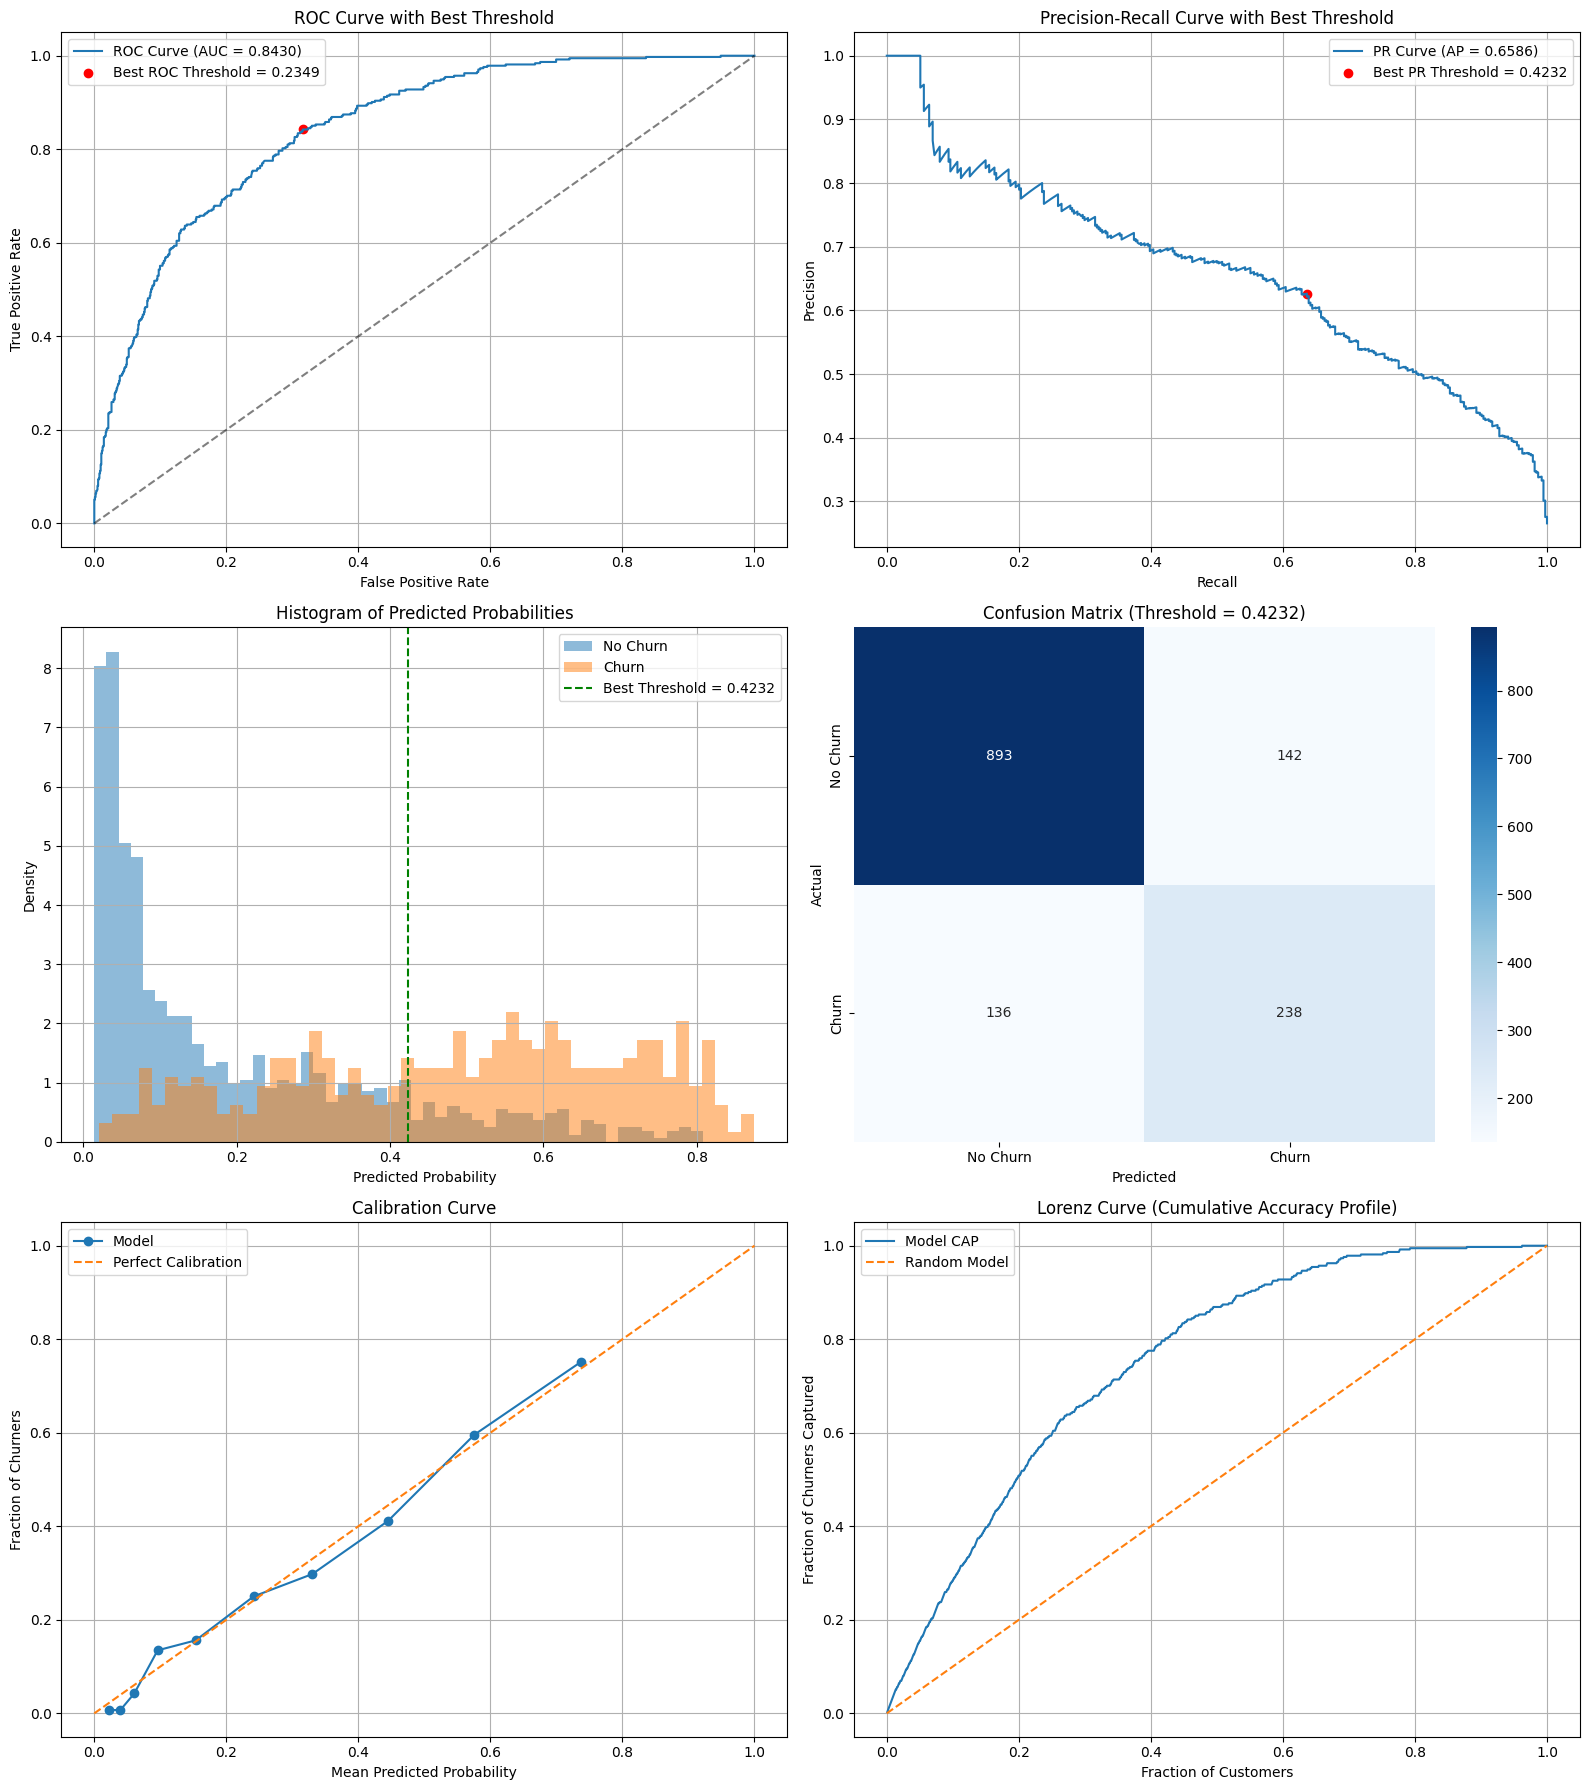

🚀 Evaluating LGBM...
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Train Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7991
Precision: 0.6502
Recall:    0.5267
Classification Report:
              precision    recall  f1-score   support

           0     0.8400    0.8976    0.8678      1035
           1     0.6502    0.5267    0.5820       374

    accuracy                         0.7991      1409
   macro avg     0.7451    0.7122    0.7249      1409
weighted avg     0.7896    0.7991    0.7919      1409


--- Test (Default Threshold) Set Metrics (Threshold=0.5000) ---
Accuracy:  0.7991
Precision: 0.6502
Recall:    0.5267
Classification Report:
              precision    recall  f1-score   support

           0     0.8400    0.8976    0.8678      1035
           1     0.6502    0.5267    0.5820       374

    accuracy                         0.7991      1409
   macro avg     0.7451    0.7122    0.7249      1409
weighted avg     0.7896    0.7991    0.7919      1409


--- Test (Best PR Threshold) Set Metrics (Threshold=0.3137) ---
Accuracy:  0.769

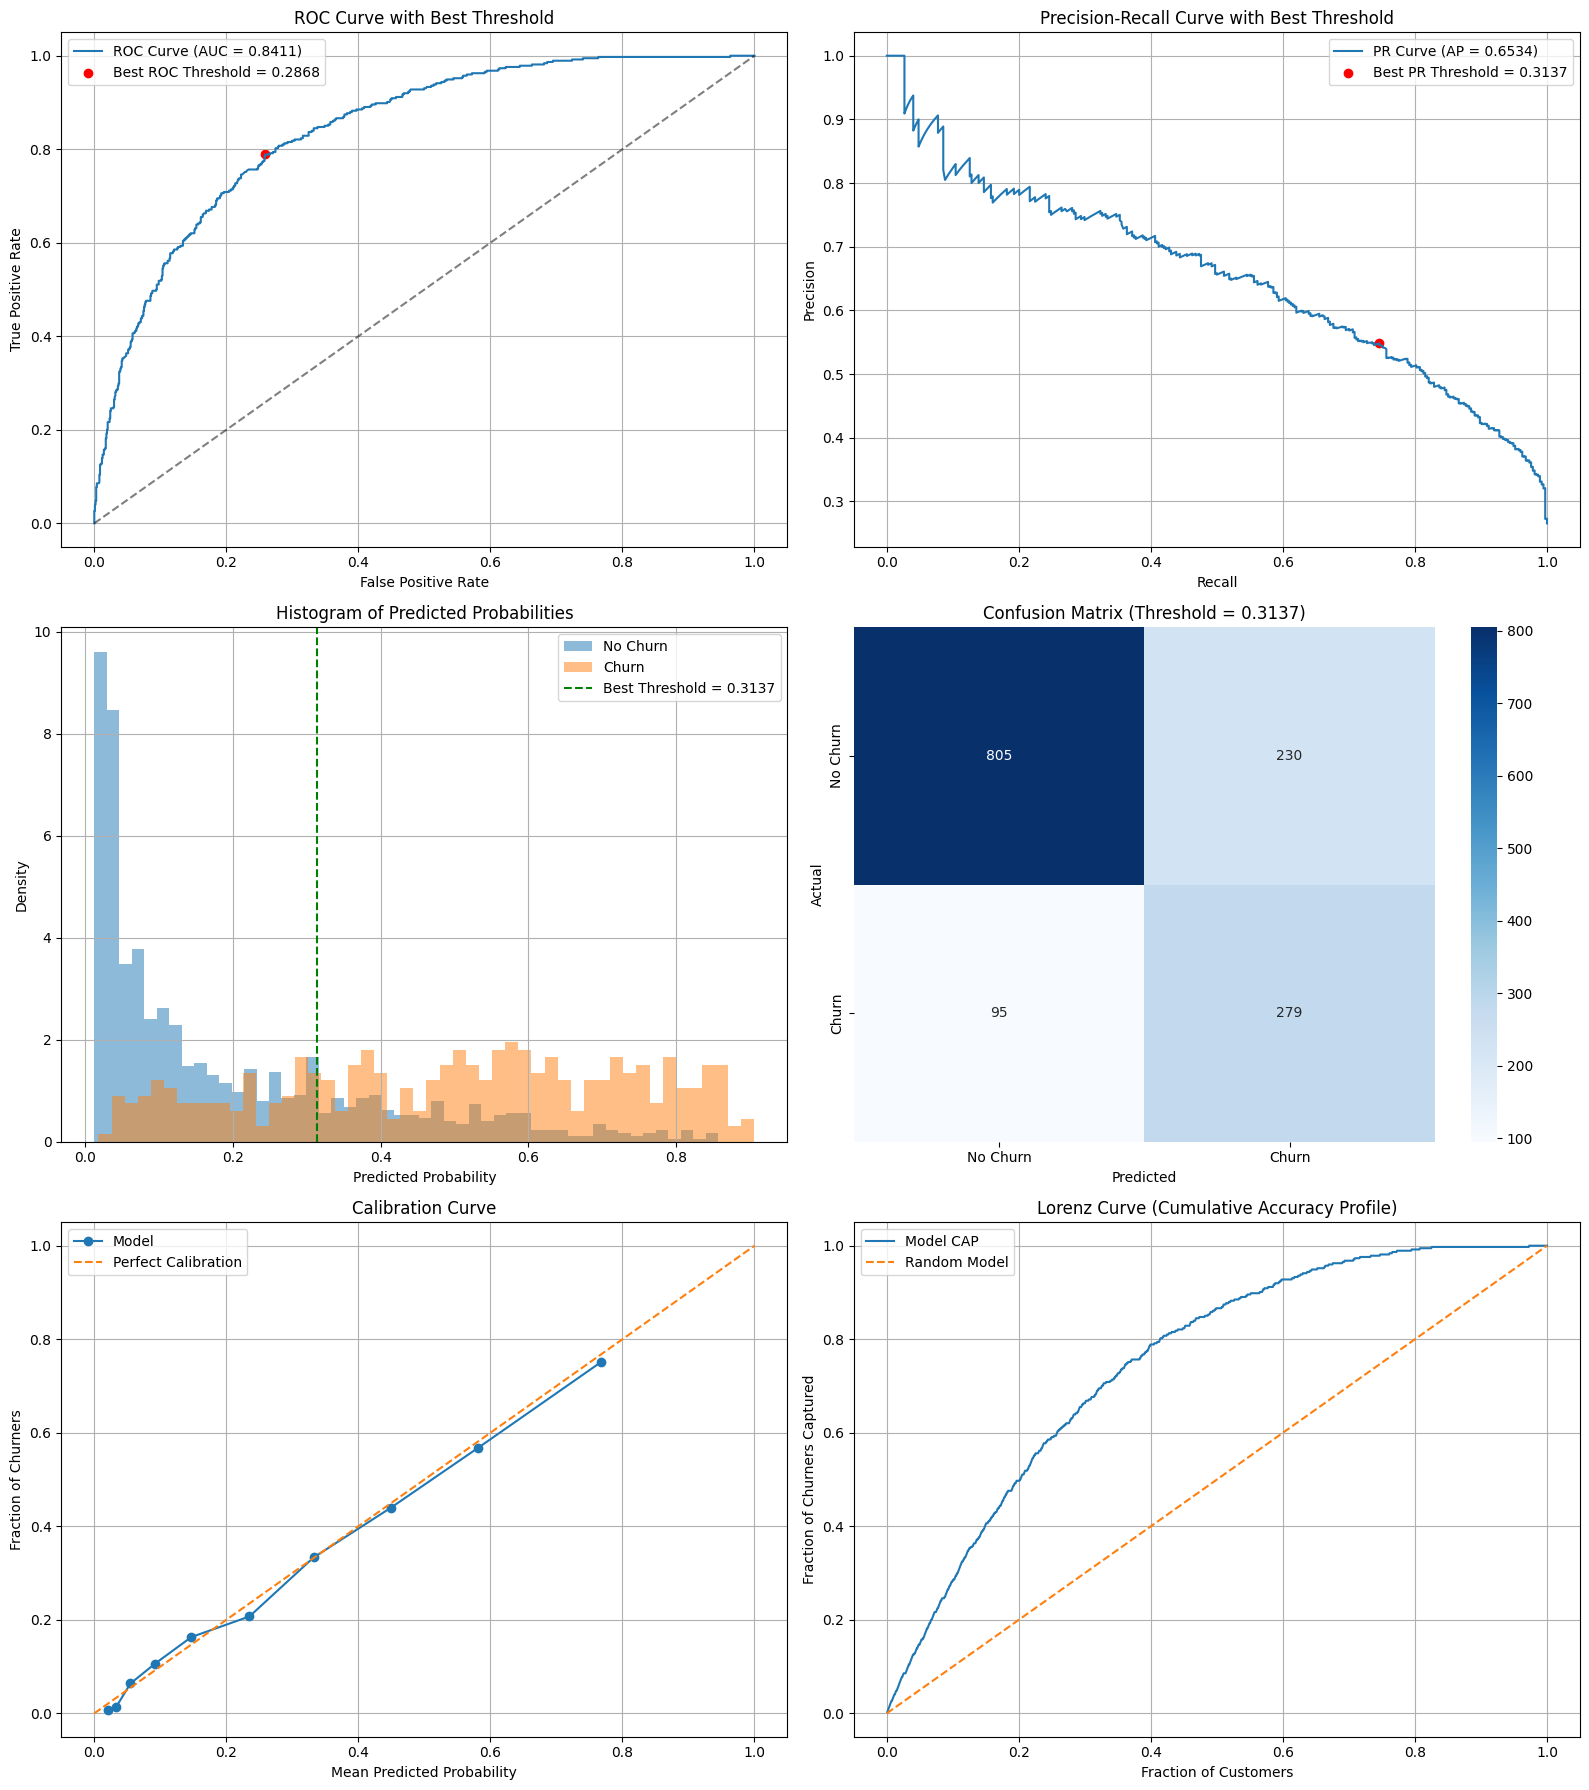

/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🚀 Evaluating CAT...

--- Train Set Metrics (Threshold=0.5000) ---
Accuracy:  0.8006
Precision: 0.6576
Recall:    0.5187
Classification Report:
              precision    recall  f1-score   support

           0     0.8384    0.9024    0.8692      1035
           1     0.6576    0.5187    0.5800       374

    accuracy                         0.8006      1409
   macro avg     0.7480    0.7106    0.7246      1409
weighted avg     0.7904    0.8006    0.7925      1409


--- Test (Default Threshold) Set Metrics (Threshold=0.5000) ---
Accuracy:  0.8006
Precision: 0.6576
Recall:    0.5187
Classification Report:
              precision    recall  f1-score   support

           0     0.8384    0.9024    0.8692      1035
           1     0.6576    0.5187    0.5800       374

    accuracy                         0.8006      1409
   macro avg     0.7480    0.7106    0.7246      1409
weighted avg     0.7904    0.8006    0.7925      1409


--- Test (Best PR Threshold) Set Metrics (Threshold=0.4149) 

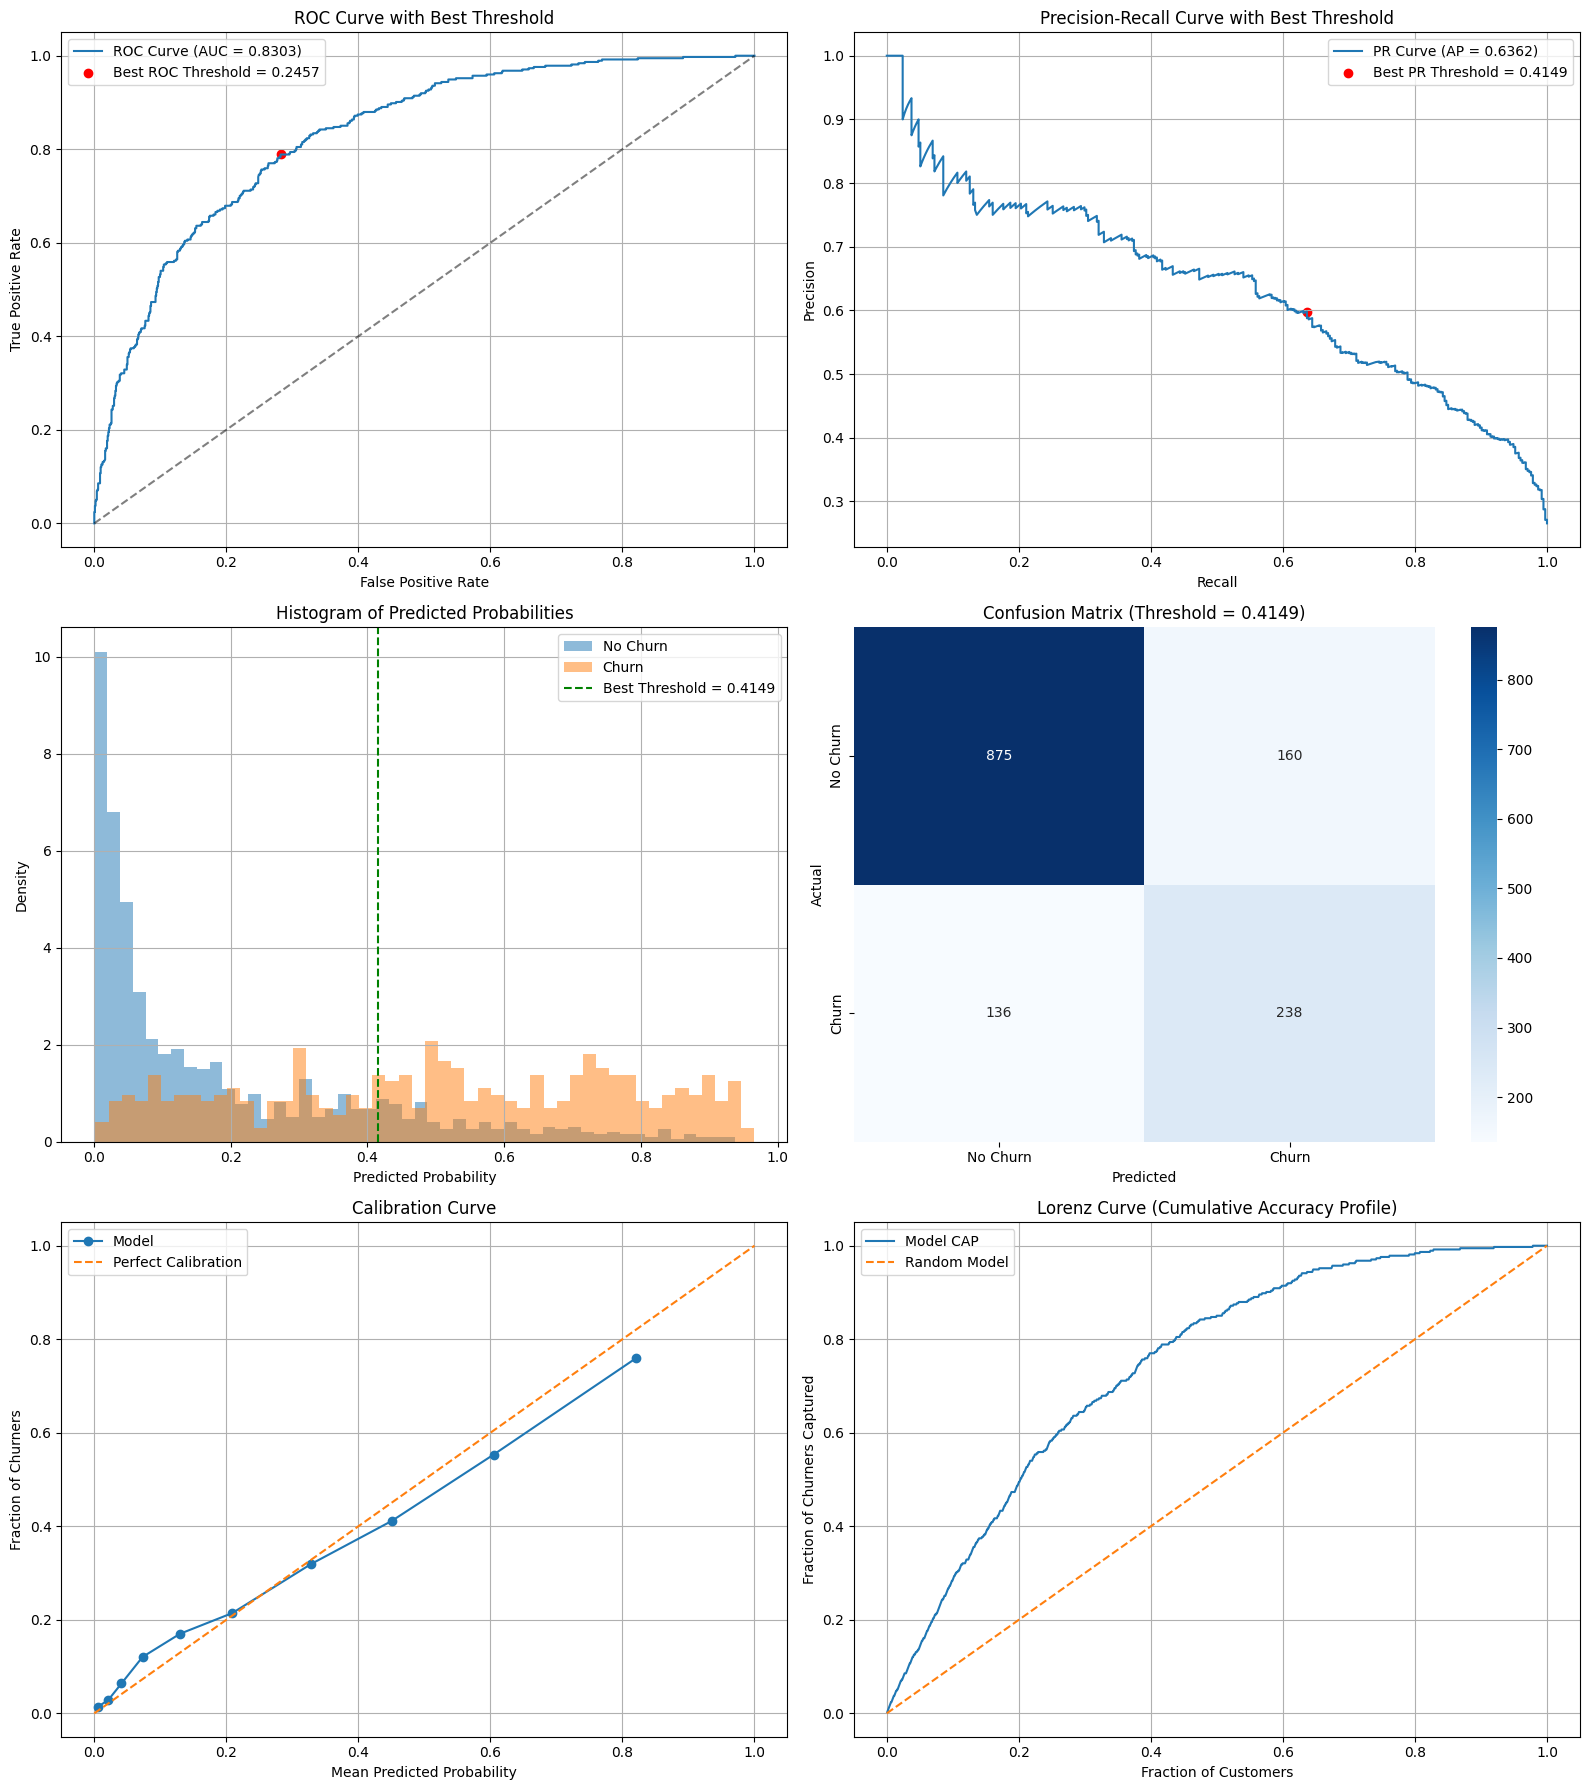

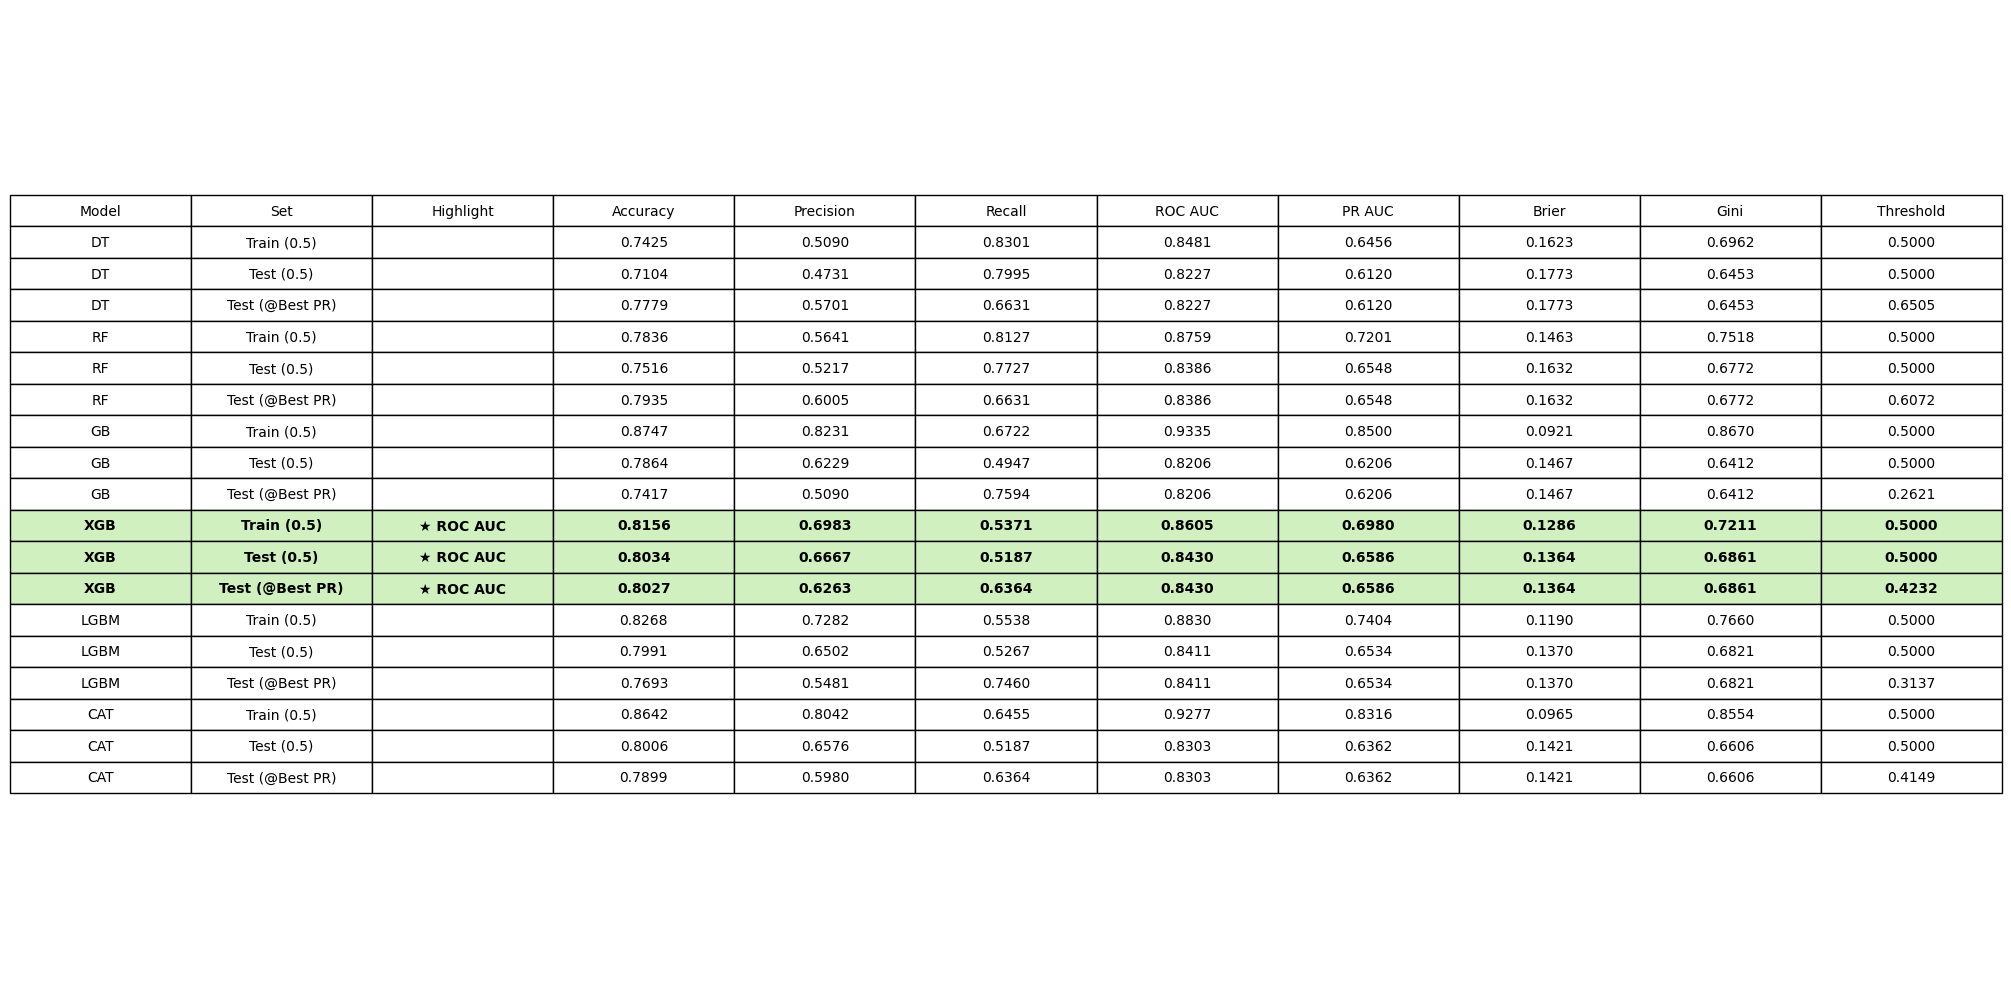

✅ Saved: model_metrics_summary.png


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, average_precision_score, brier_score_loss
)
from sklearn.pipeline import Pipeline

def get_model_metrics_summary(model_registry, X_train, y_train, X_test, y_test):
    all_results = []

    for model_key, clf in model_registry.items():
        print(f"🚀 Evaluating {model_key.upper()}...")
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', clf)
        ])
        pipe.fit(X_train, y_train)
        results = evaluate_model(pipe, X_test, y_test, X_test, y_test)

        y_train_probs = pipe.predict_proba(X_train)[:, 1]
        y_test_probs = pipe.predict_proba(X_test)[:, 1]

        y_train_pred_05 = (y_train_probs >= 0.5).astype(int)
        y_test_pred_05 = (y_test_probs >= 0.5).astype(int)

        best_thr = results['thresholds']['pr']
        y_test_pred_best = (y_test_probs >= best_thr).astype(int)

        train_metrics = {
            'ROC AUC': roc_auc_score(y_train, y_train_probs),
            'PR AUC': average_precision_score(y_train, y_train_probs),
            'Brier': brier_score_loss(y_train, y_train_probs),
            'Gini': 2 * roc_auc_score(y_train, y_train_probs) - 1,
        }

        all_results.extend([
            {
                'Model': model_key.upper(),
                'Set': 'Train (0.5)',
                'Accuracy': accuracy_score(y_train, y_train_pred_05),
                'Precision': precision_score(y_train, y_train_pred_05),
                'Recall': recall_score(y_train, y_train_pred_05),
                **train_metrics,
                'Threshold': 0.5
            },
            {
                'Model': model_key.upper(),
                'Set': 'Test (0.5)',
                'Accuracy': accuracy_score(y_test, y_test_pred_05),
                'Precision': precision_score(y_test, y_test_pred_05),
                'Recall': recall_score(y_test, y_test_pred_05),
                'ROC AUC': results['roc_auc'],
                'PR AUC': results['pr_auc'],
                'Brier': results['brier'],
                'Gini': results['gini'],
                'Threshold': 0.5
            },
            {
                'Model': model_key.upper(),
                'Set': 'Test (@Best PR)',
                'Accuracy': accuracy_score(y_test, y_test_pred_best),
                'Precision': precision_score(y_test, y_test_pred_best),
                'Recall': recall_score(y_test, y_test_pred_best),
                'ROC AUC': results['roc_auc'],
                'PR AUC': results['pr_auc'],
                'Brier': results['brier'],
                'Gini': results['gini'],
                'Threshold': best_thr
            }
        ])

    return pd.DataFrame(all_results)

# Run metric computation once
metrics_df = get_model_metrics_summary(model_registry, X_train, y_train, X_test, y_test)

# Formatting function
def fmt(x):
    if pd.isna(x): return ""
    return f"{x:.4f}" if isinstance(x, float) else x

for col in ['Accuracy', 'Precision', 'Recall', 'ROC AUC', 'PR AUC', 'Brier', 'Gini', 'Threshold']:
    metrics_df[col] = metrics_df[col].apply(fmt)

# Identify best models by ROC AUC and PR AUC on test set
test_rows = metrics_df[metrics_df['Set'] == 'Test (0.5)']
best_roc_model = test_rows.loc[test_rows['ROC AUC'].astype(float).idxmax(), 'Model']
best_pr_model = test_rows.loc[test_rows['PR AUC'].astype(float).idxmax(), 'Model']

# Add highlight flags with simple symbols (avoid font issues)
metrics_df['Highlight'] = metrics_df['Model'].apply(lambda m: (
    "★ ROC AUC" if m == best_roc_model else ("☆ PR AUC" if m == best_pr_model else "")
))

# Reorder columns for presentation
metrics_df = metrics_df[['Model', 'Set', 'Highlight', 'Accuracy', 'Precision', 'Recall',
                         'ROC AUC', 'PR AUC', 'Brier', 'Gini', 'Threshold']]

# Plot table as PNG
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')

tbl = ax.table(
    cellText=metrics_df.values,
    colLabels=metrics_df.columns,
    cellLoc='center',
    loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.5)

# Highlight best rows by making font bold and background greenish
for i, highlight in enumerate(metrics_df['Highlight']):
    if highlight.startswith("★") or highlight.startswith("☆"):
        for j in range(len(metrics_df.columns)):
            cell = tbl[(i + 1, j)]  # +1 because row 0 is header
            cell.get_text().set_weight('bold')
            cell.set_facecolor('#d0f0c0')  # light green

plt.tight_layout()
plt.savefig("model_metrics_summary.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✅ Saved: model_metrics_summary.png")


/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [00:29:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🏆 Best Model by PR AUC: XGB
   PR AUC Score: 0.6586

--- Train Set Metrics (Threshold=0.5000) ---
Accuracy:  0.8034
Precision: 0.6667
Recall:    0.5187
Classification Report:
              precision    recall  f1-score   support

           0     0.8390    0.9063    0.8713      1035
           1     0.6667    0.5187    0.5835       374

    accuracy                         0.8034      1409
   macro avg     0.7528    0.7125    0.7274      1409
weighted avg     0.7933    0.8034    0.7949      1409


--- Test (Default Threshold) Set Metrics (Threshold=0.5000) ---
Accuracy:  0.8034
Precision: 0.6667
Recall:    0.5187
Classification Report:
              precision    recall  f1-score   support

           0     0.8390    0.9063    0.8713      1035
           1     0.6667    0.5187    0.5835       374

    accuracy                         0.8034      1409
   macro avg     0.7528    0.7125    0.7274      1409
weighted avg     0.7933    0.8034    0.7949      1409


--- Test (Best PR Threshold)

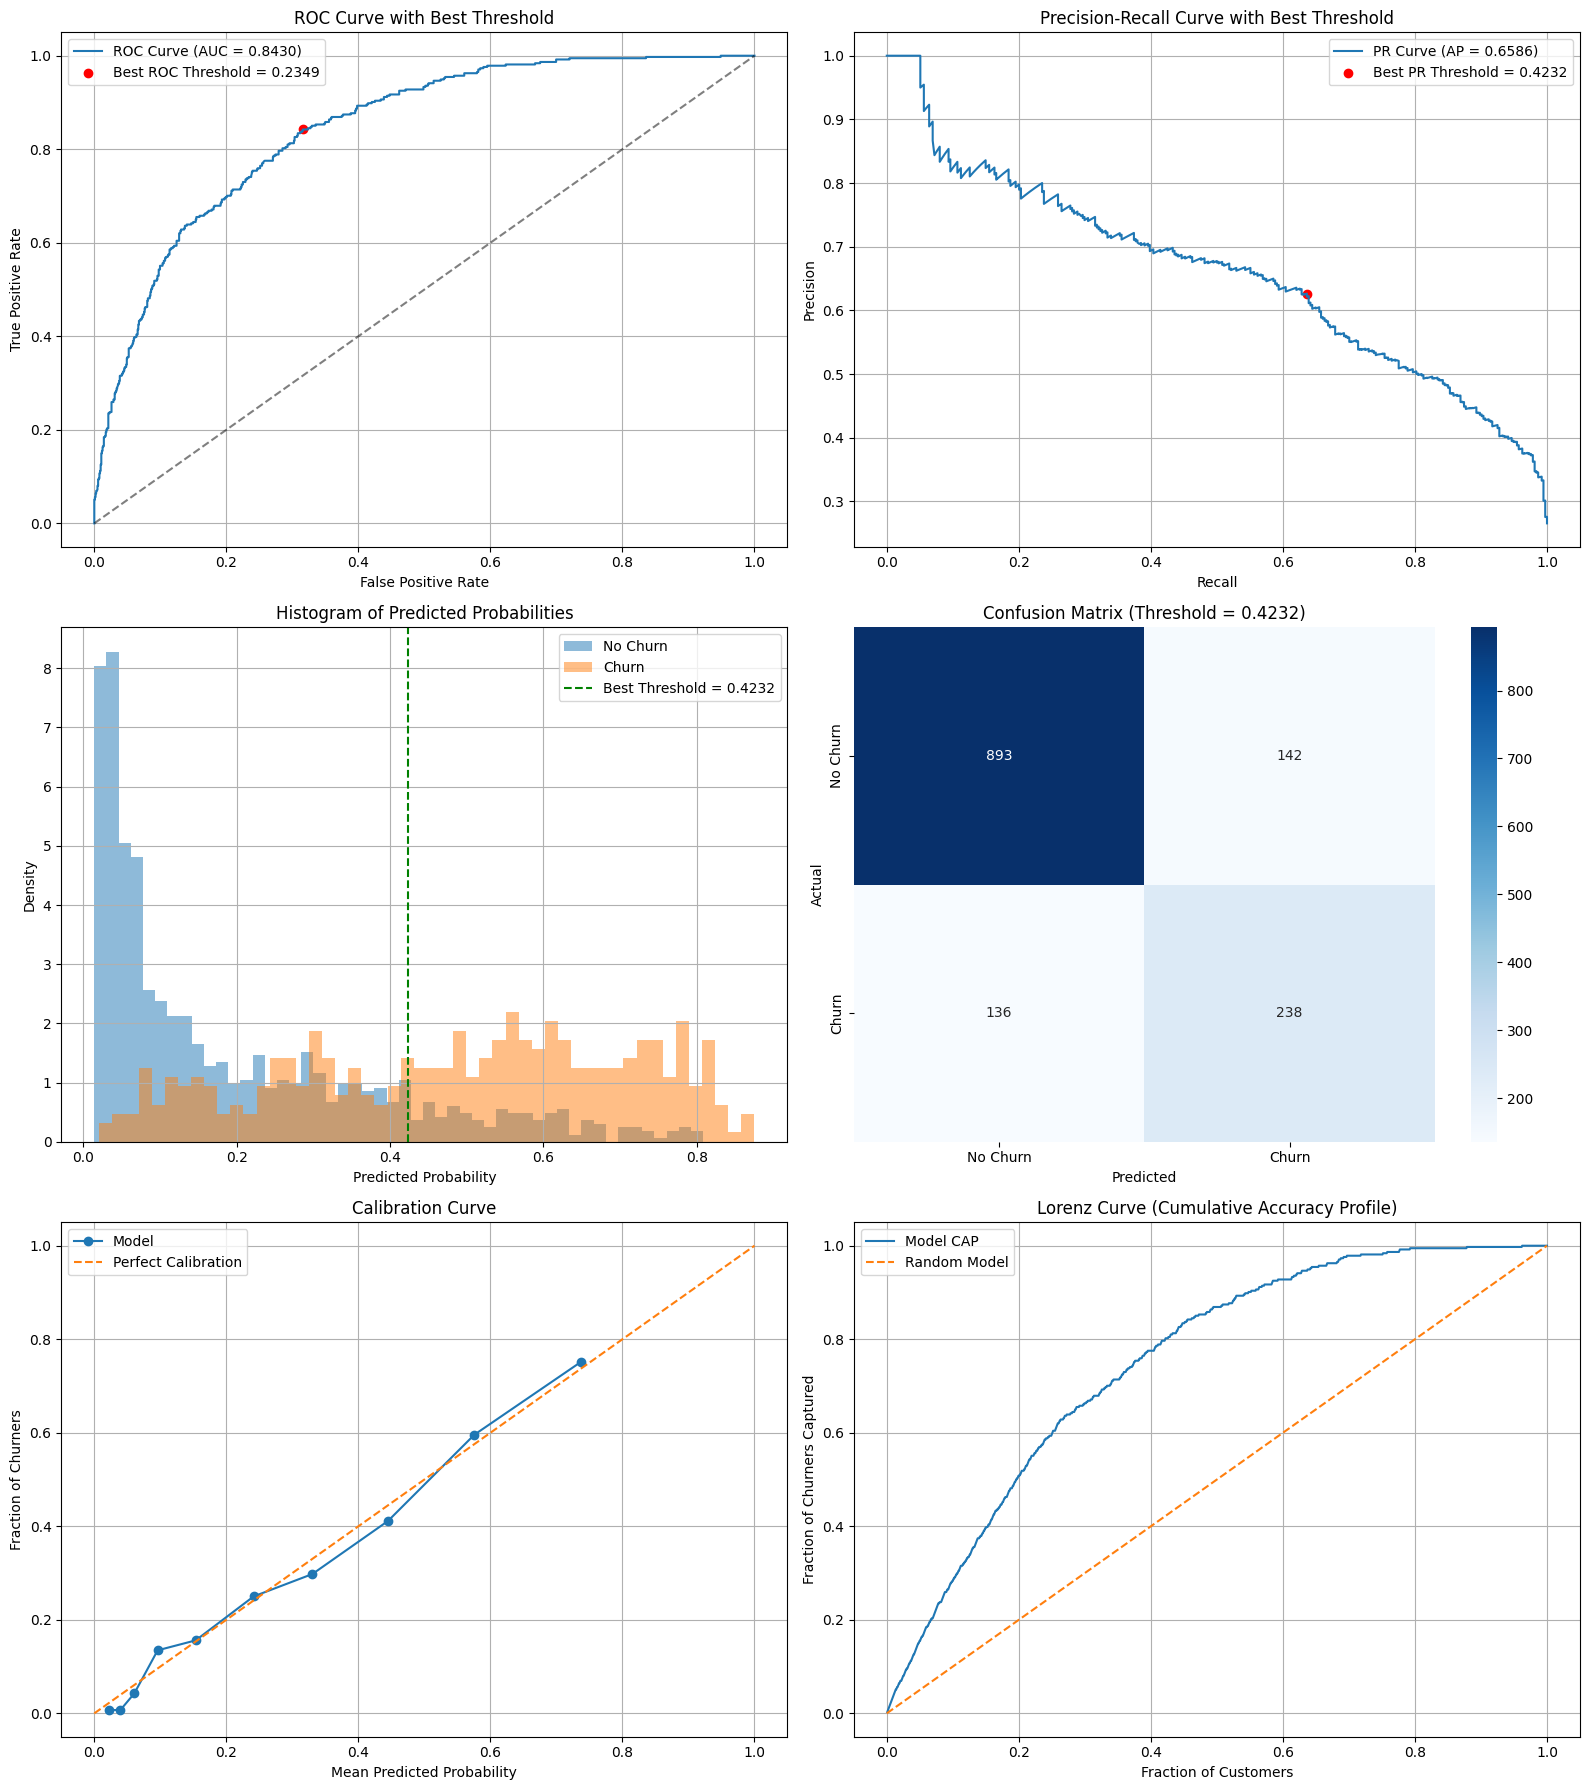


✅ Best model 'XGB' reloaded for SHAP analysis


In [70]:
# now do SHAP feature importance for the best model (by PR AUC)

# Step 1: Identify the best model by PR AUC on test set (default threshold 0.5)
import shap
from sklearn.pipeline import Pipeline

# Extract test-set metrics (threshold 0.5)
test_metrics_05 = metrics_df[metrics_df['Set'] == 'Test (0.5)'].copy()

# Convert PR AUC column back to float for comparison
test_metrics_05['PR_AUC_float'] = test_metrics_05['PR AUC'].astype(float)

# Find best model by PR AUC
best_model_idx = test_metrics_05['PR_AUC_float'].idxmax()
best_model_name = test_metrics_05.loc[best_model_idx, 'Model']

print(f"🏆 Best Model by PR AUC: {best_model_name}")
print(f"   PR AUC Score: {test_metrics_05.loc[best_model_idx, 'PR AUC']}")

# Retrain the best model to get the fitted pipeline
best_model_key = best_model_name.lower()
best_pipeline, best_results = run_model(best_model_key)

print(f"\n✅ Best model '{best_model_name}' reloaded for SHAP analysis")


## SHAP Feature Importance Analysis

Explaining the best model's predictions using SHAP (SHapley Additive exPlanations) values.


In [71]:
# Compute SHAP values for the best model
print("Computing SHAP values... (this may take ~60 seconds)")

# Extract the preprocessor and classifier
preprocessor = best_pipeline.named_steps['preprocessor']
classifier = best_pipeline.named_steps['classifier']

# Transform test data
X_test_transformed = preprocessor.transform(X_test)

# Get feature names after preprocessing
def get_feature_names_from_preprocessor(preprocessor, X_train):
    categorical_features = ['gender', 'InternetService', 'PaymentMethod', 'tenure_group']
    numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumServices', 'AvgCharge']
    boolean_cols = [
        'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'LessThan6Months',
        'AvailingInternetService', 'LongTerm'
    ]
    
    cat_transformer = preprocessor.named_transformers_['cat']
    cat_feature_names = cat_transformer.get_feature_names_out(categorical_features).tolist()
    
    feature_names = cat_feature_names + numeric_features + boolean_cols
    return feature_names

feature_names = get_feature_names_from_preprocessor(preprocessor, X_train)

# Create SHAP explainer using the TreeExplainer (works for tree-based models)
try:
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_test_transformed)
    print(f"✅ TreeExplainer successful. SHAP values shape: {np.array(shap_values).shape}")
except Exception as e:
    print(f"⚠️  TreeExplainer failed ({e}), trying KernelExplainer...")
    # Fallback to KernelExplainer
    background = shap.sample(X_test_transformed, min(50, X_test_transformed.shape[0]))
    explainer = shap.KernelExplainer(
        lambda x: classifier.predict_proba(x)[:, 1],
        background
    )
    shap_values = explainer.shap_values(X_test_transformed, nsamples=100)
    print(f"✅ KernelExplainer successful.")


Computing SHAP values... (this may take ~60 seconds)
⚠️  TreeExplainer failed (could not convert string to float: '[2.653532E-1]'), trying KernelExplainer...


100%|██████████| 1409/1409 [00:07<00:00, 193.45it/s]

✅ KernelExplainer successful.


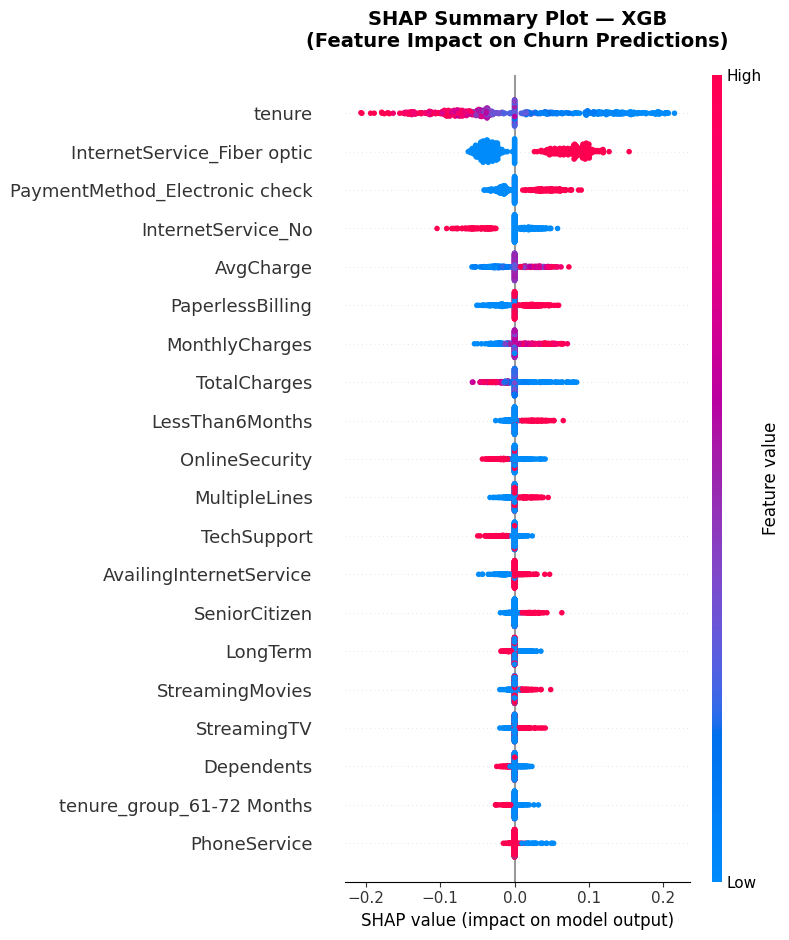

✅ Saved: shap_summary_plot.png


In [72]:
# SHAP Summary Plot (Beeswarm) — Modern Style
# Show how each feature contributes to predictions

fig, ax = plt.subplots(figsize=(12, 8))

# Handle multi-output case (for classification with 2 classes, take class 1)
if isinstance(shap_values, list):
    sv = shap_values[1]  # Positive class (churn)
else:
    sv = shap_values

# Sample for clarity if dataset is large
if X_test_transformed.shape[0] > 500:
    sample_idx = np.random.choice(X_test_transformed.shape[0], size=500, replace=False)
    sv_sample = sv[sample_idx]
    X_test_sample = X_test_transformed[sample_idx]
else:
    sv_sample = sv
    X_test_sample = X_test_transformed

# Create SHAP summary plot (beeswarm-style)
shap.summary_plot(
    sv_sample,
    X_test_sample,
    feature_names=feature_names,
    show=False,
    max_display=20,
    plot_type='dot'
)

plt.title(f"SHAP Summary Plot — {best_model_name}\n(Feature Impact on Churn Predictions)", 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('SHAP value (impact on model output)', fontsize=12)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: shap_summary_plot.png")


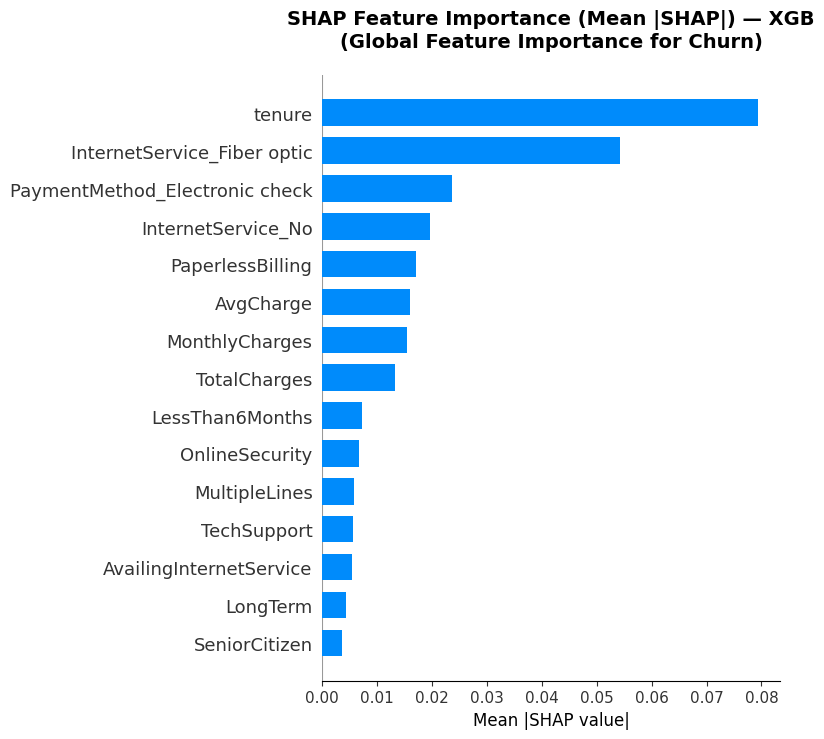

✅ Saved: shap_importance_bar.png


In [73]:
# SHAP Bar Plot — Global Feature Importance
# Shows which features are most important overall

fig, ax = plt.subplots(figsize=(12, 8))

shap.summary_plot(
    sv,
    X_test_transformed,
    feature_names=feature_names,
    show=False,
    max_display=15,
    plot_type='bar'
)

plt.title(f"SHAP Feature Importance (Mean |SHAP|) — {best_model_name}\n(Global Feature Importance for Churn)", 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Mean |SHAP value|', fontsize=12)
plt.tight_layout()
plt.savefig('shap_importance_bar.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: shap_importance_bar.png")


In [74]:
# SHAP Top Insight — Extract key takeaways

# Calculate mean absolute SHAP values for each feature
mean_abs_shap = np.abs(sv).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean |SHAP|': mean_abs_shap
}).sort_values('Mean |SHAP|', ascending=False)

print("\n" + "="*60)
print("🔍 KEY INSIGHTS — TOP 10 DRIVERS OF CHURN")
print("="*60)
for idx, row in shap_importance_df.head(10).iterrows():
    print(f"{idx+1:2d}. {row['Feature']:40s} → {row['Mean |SHAP|']:.6f}")
print("="*60)



🔍 KEY INSIGHTS — TOP 10 DRIVERS OF CHURN
11. tenure                                   → 0.079400
 2. InternetService_Fiber optic              → 0.054290
 5. PaymentMethod_Electronic check           → 0.023633
 3. InternetService_No                       → 0.019588
27. PaperlessBilling                         → 0.017127
15. AvgCharge                                → 0.015902
12. MonthlyCharges                           → 0.015437
13. TotalCharges                             → 0.013227
28. LessThan6Months                          → 0.007193
21. OnlineSecurity                           → 0.006594


## High-Risk Churner Segmentation & Modern Charts

Now let's identify high-risk customers and create presentation-ready charts with actionable insights.


In [75]:
# Generate predictions for risk segmentation
# Combine train and test for full churn analysis
X_full = pd.concat([X_train, X_test], ignore_index=True)
y_full = pd.concat([y_train, y_test], ignore_index=True)
y_pred_proba_full = best_pipeline.predict_proba(X_full)[:, 1]

# Add predictions to full dataset
X_full['churn_probability'] = y_pred_proba_full
X_full['actual_churn'] = y_full.values
X_full['tenure_group'] = X_full['tenure'].apply(lambda x: 
    '0-12 Months' if x <= 12 else 
    '13-24 Months' if x <= 24 else 
    '25-48 Months' if x <= 48 else 
    '49-60 Months' if x <= 60 else 
    '61-72 Months'
)

# Define risk segments: High risk (prob > 0.6), Medium risk (0.3-0.6), Low risk (< 0.3)
def assign_risk_segment(prob):
    if prob >= 0.6:
        return 'High Risk'
    elif prob >= 0.3:
        return 'Medium Risk'
    else:
        return 'Low Risk'

X_full['risk_segment'] = X_full['churn_probability'].apply(assign_risk_segment)

# Summary statistics
risk_summary = X_full.groupby('risk_segment').agg({
    'churn_probability': ['count', 'mean', 'std'],
    'actual_churn': ['sum', 'mean']
}).round(4)

print("\n" + "="*70)
print("📊 RISK SEGMENT SUMMARY")
print("="*70)
print(risk_summary)
print(f"\nTotal Customers: {X_full.shape[0]:,}")
print(f"High Risk: {(X_full['risk_segment'] == 'High Risk').sum():,} ({(X_full['risk_segment'] == 'High Risk').sum() / X_full.shape[0] * 100:.1f}%)")
print(f"Medium Risk: {(X_full['risk_segment'] == 'Medium Risk').sum():,} ({(X_full['risk_segment'] == 'Medium Risk').sum() / X_full.shape[0] * 100:.1f}%)")
print(f"Low Risk: {(X_full['risk_segment'] == 'Low Risk').sum():,} ({(X_full['risk_segment'] == 'Low Risk').sum() / X_full.shape[0] * 100:.1f}%)")
print("="*70)



📊 RISK SEGMENT SUMMARY
             churn_probability                 actual_churn        
                         count    mean     std          sum    mean
risk_segment                                                       
High Risk                  925  0.7112  0.0687          683  0.7384
Low Risk                  4441  0.1087  0.0813          421  0.0948
Medium Risk               1677  0.4386  0.0898          765  0.4562

Total Customers: 7,043
High Risk: 925 (13.1%)
Medium Risk: 1,677 (23.8%)
Low Risk: 4,441 (63.1%)


/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_13809/539956951.py:87: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.04, 1, 0.96])
/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_13809/539956951.py:88: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig('shap_key_insights_table.png', dpi=300, bbox_inches='tight', facecolor='white')
/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


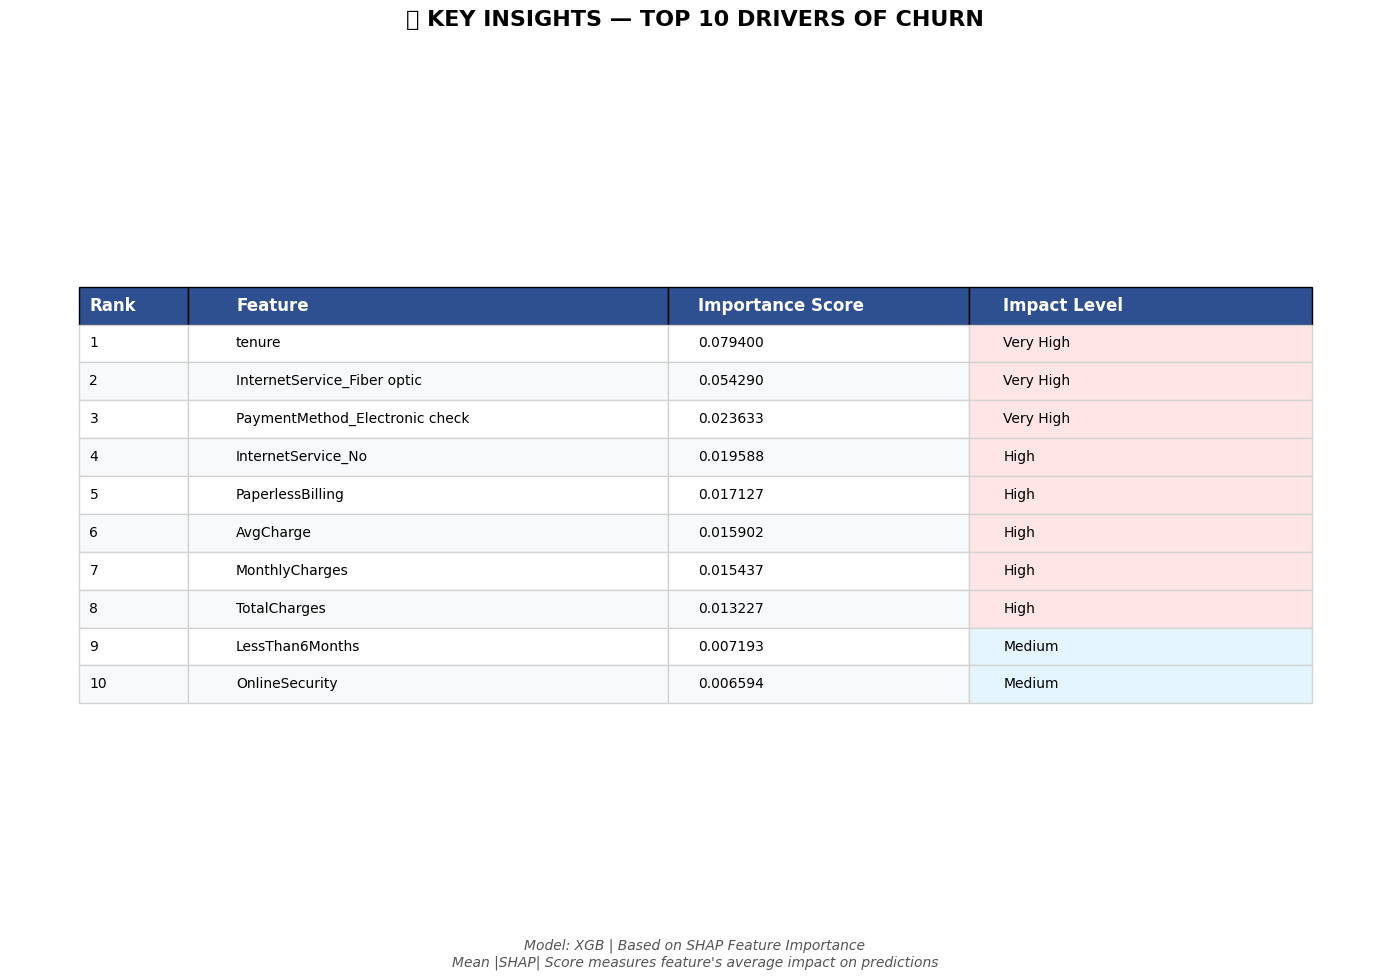

✅ Saved: shap_key_insights_table.png


In [76]:
# ============================================================================
# 📊 CREATE MODERN STYLED PNG TABLE — KEY INSIGHTS (TOP 10 CHURN DRIVERS)
# ============================================================================

# Prepare data for table
top_drivers = shap_importance_df.head(10).reset_index(drop=True)
top_drivers['Rank'] = range(1, len(top_drivers) + 1)
top_drivers['Mean |SHAP|'] = top_drivers['Mean |SHAP|'].apply(lambda x: f'{x:.6f}')

# Prepare table data
table_data = []
table_data.append(['Rank', 'Feature', 'Importance Score', 'Impact Level'])

for _, row in top_drivers.iterrows():
    score = float(row['Mean |SHAP|'])
    # Determine impact level
    if score > 0.02:
        impact = 'Very High'
    elif score > 0.01:
        impact = 'High'
    elif score > 0.005:
        impact = 'Medium'
    else:
        impact = 'Low'
    
    table_data.append([
        str(int(row['Rank'])),
        row['Feature'],
        row['Mean |SHAP|'],
        impact
    ])

# Create figure and table
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('tight')
ax.axis('off')

# Create table
tbl = ax.table(cellText=table_data, cellLoc='left', loc='center',
               colWidths=[0.08, 0.35, 0.22, 0.25])

tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1, 2.5)

# Style header row
for i in range(4):
    cell = tbl[(0, i)]
    cell.set_facecolor('#2E5090')  # Deep blue
    cell.set_text_props(weight='bold', color='white', fontsize=12)

# Alternate row colors with modern palette
colors = ['#F8F9FA', '#FFFFFF']
impact_colors = {
    'Very High': '#FFE5E5',
    'High': '#FFE5E5',
    'Medium': '#E5F5FF',
    'Low': '#E5F5FF'
}

for i in range(1, len(table_data)):
    for j in range(4):
        cell = tbl[(i, j)]
        # Alternate background
        cell.set_facecolor(colors[i % 2])
        
        # Impact level color
        if j == 3:
            impact = table_data[i][3]
            cell.set_facecolor(impact_colors.get(impact, colors[i % 2]))
        
        cell.set_text_props(fontsize=10)
        cell.set_edgecolor('#D3D3D3')

# Add title
plt.text(0.5, 0.98, '🔍 KEY INSIGHTS — TOP 10 DRIVERS OF CHURN', 
         ha='center', va='top', fontsize=16, fontweight='bold',
         transform=fig.transFigure, wrap=True)

# Add explanation
explanation = (f"Model: {best_model_name} | Based on SHAP Feature Importance\n"
               f"Mean |SHAP| Score measures feature's average impact on predictions")
plt.text(0.5, 0.02, explanation, 
         ha='center', va='bottom', fontsize=10, style='italic', color='#555555',
         transform=fig.transFigure)

plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.savefig('shap_key_insights_table.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Saved: shap_key_insights_table.png")


/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_13809/933794453.py:95: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.04, 1, 0.96])
/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_13809/933794453.py:96: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('risk_segment_summary_table.png', dpi=300, bbox_inches='tight', facecolor='white')
/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


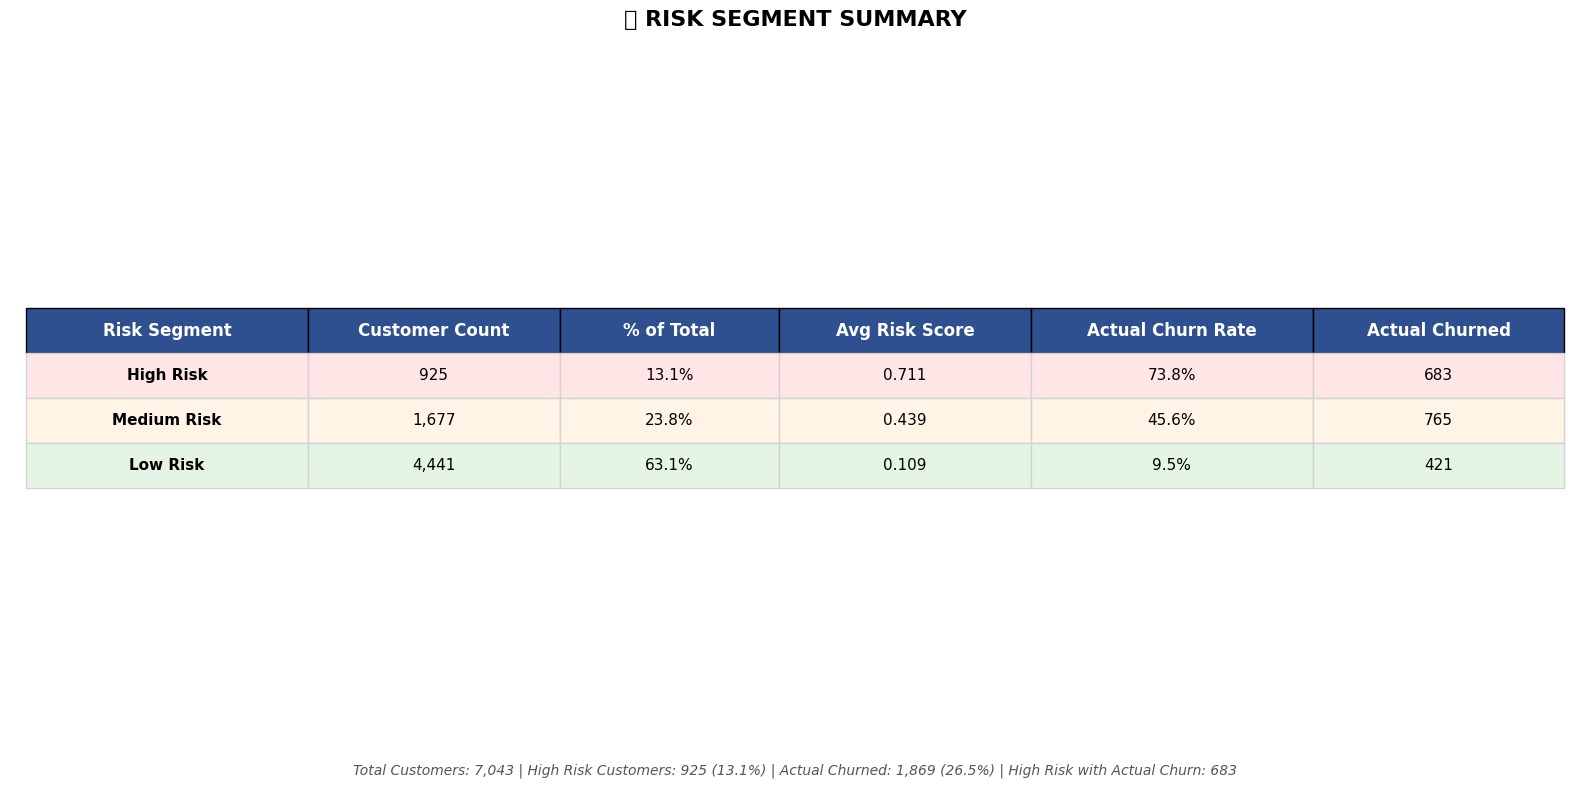

✅ Saved: risk_segment_summary_table.png


In [77]:
# ============================================================================
# 📊 CREATE MODERN STYLED PNG TABLE — RISK SEGMENT SUMMARY
# ============================================================================

# Prepare risk segment data
risk_data = []

for segment in ['High Risk', 'Medium Risk', 'Low Risk']:
    segment_df = X_full[X_full['risk_segment'] == segment]
    
    count = len(segment_df)
    pct_of_total = (count / len(X_full)) * 100
    avg_churn_prob = segment_df['churn_probability'].mean()
    actual_churn_rate = segment_df['actual_churn'].mean()
    actual_churned = segment_df['actual_churn'].sum()
    
    risk_data.append({
        'Segment': segment,
        'Customer Count': f"{count:,}",
        '% of Total': f"{pct_of_total:.1f}%",
        'Avg Risk Score': f"{avg_churn_prob:.3f}",
        'Actual Churn Rate': f"{actual_churn_rate:.1%}",
        'Actual Churned': f"{int(actual_churned):,}"
    })

# Create table data for display
table_data_risk = [['Risk Segment', 'Customer Count', '% of Total', 'Avg Risk Score', 'Actual Churn Rate', 'Actual Churned']]

for row in risk_data:
    table_data_risk.append([
        row['Segment'],
        row['Customer Count'],
        row['% of Total'],
        row['Avg Risk Score'],
        row['Actual Churn Rate'],
        row['Actual Churned']
    ])

# Create figure and table
fig, ax = plt.subplots(figsize=(16, 8))
ax.axis('tight')
ax.axis('off')

# Create table
tbl = ax.table(cellText=table_data_risk, cellLoc='center', loc='center',
               colWidths=[0.18, 0.16, 0.14, 0.16, 0.18, 0.16])

tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1, 3)

# Style header row
for i in range(6):
    cell = tbl[(0, i)]
    cell.set_facecolor('#2E5090')  # Deep blue
    cell.set_text_props(weight='bold', color='white', fontsize=12)

# Style data rows with color coding
segment_colors = {
    'High Risk': '#FFE5E5',      # Light red
    'Medium Risk': '#FFF4E5',    # Light orange
    'Low Risk': '#E5F5E5'        # Light green
}

for i in range(1, len(table_data_risk)):
    segment = table_data_risk[i][0]
    bg_color = segment_colors.get(segment, '#F8F9FA')
    
    for j in range(6):
        cell = tbl[(i, j)]
        cell.set_facecolor(bg_color)
        cell.set_text_props(fontsize=11, weight='bold' if j == 0 else 'normal')
        cell.set_edgecolor('#D3D3D3')

# Add title
plt.text(0.5, 0.98, '📊 RISK SEGMENT SUMMARY', 
         ha='center', va='top', fontsize=16, fontweight='bold',
         transform=fig.transFigure)

# Add key statistics
total_customers = len(X_full)
high_risk_count = len(X_full[X_full['risk_segment'] == 'High Risk'])
actual_churn_count = X_full['actual_churn'].sum()
high_risk_actual_churn = X_full[(X_full['risk_segment'] == 'High Risk') & (X_full['actual_churn'] == 1)].shape[0]

stats_text = (f"Total Customers: {total_customers:,} | "
              f"High Risk Customers: {high_risk_count:,} ({high_risk_count/total_customers*100:.1f}%) | "
              f"Actual Churned: {actual_churn_count:,} ({actual_churn_count/total_customers*100:.1f}%) | "
              f"High Risk with Actual Churn: {high_risk_actual_churn:,}")

plt.text(0.5, 0.02, stats_text, 
         ha='center', va='bottom', fontsize=10, style='italic', color='#555555',
         transform=fig.transFigure)

plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.savefig('risk_segment_summary_table.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Saved: risk_segment_summary_table.png")


/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_13809/1292644696.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(tenure_by_risk, labels=['Low Risk', 'Medium Risk', 'High Risk'],


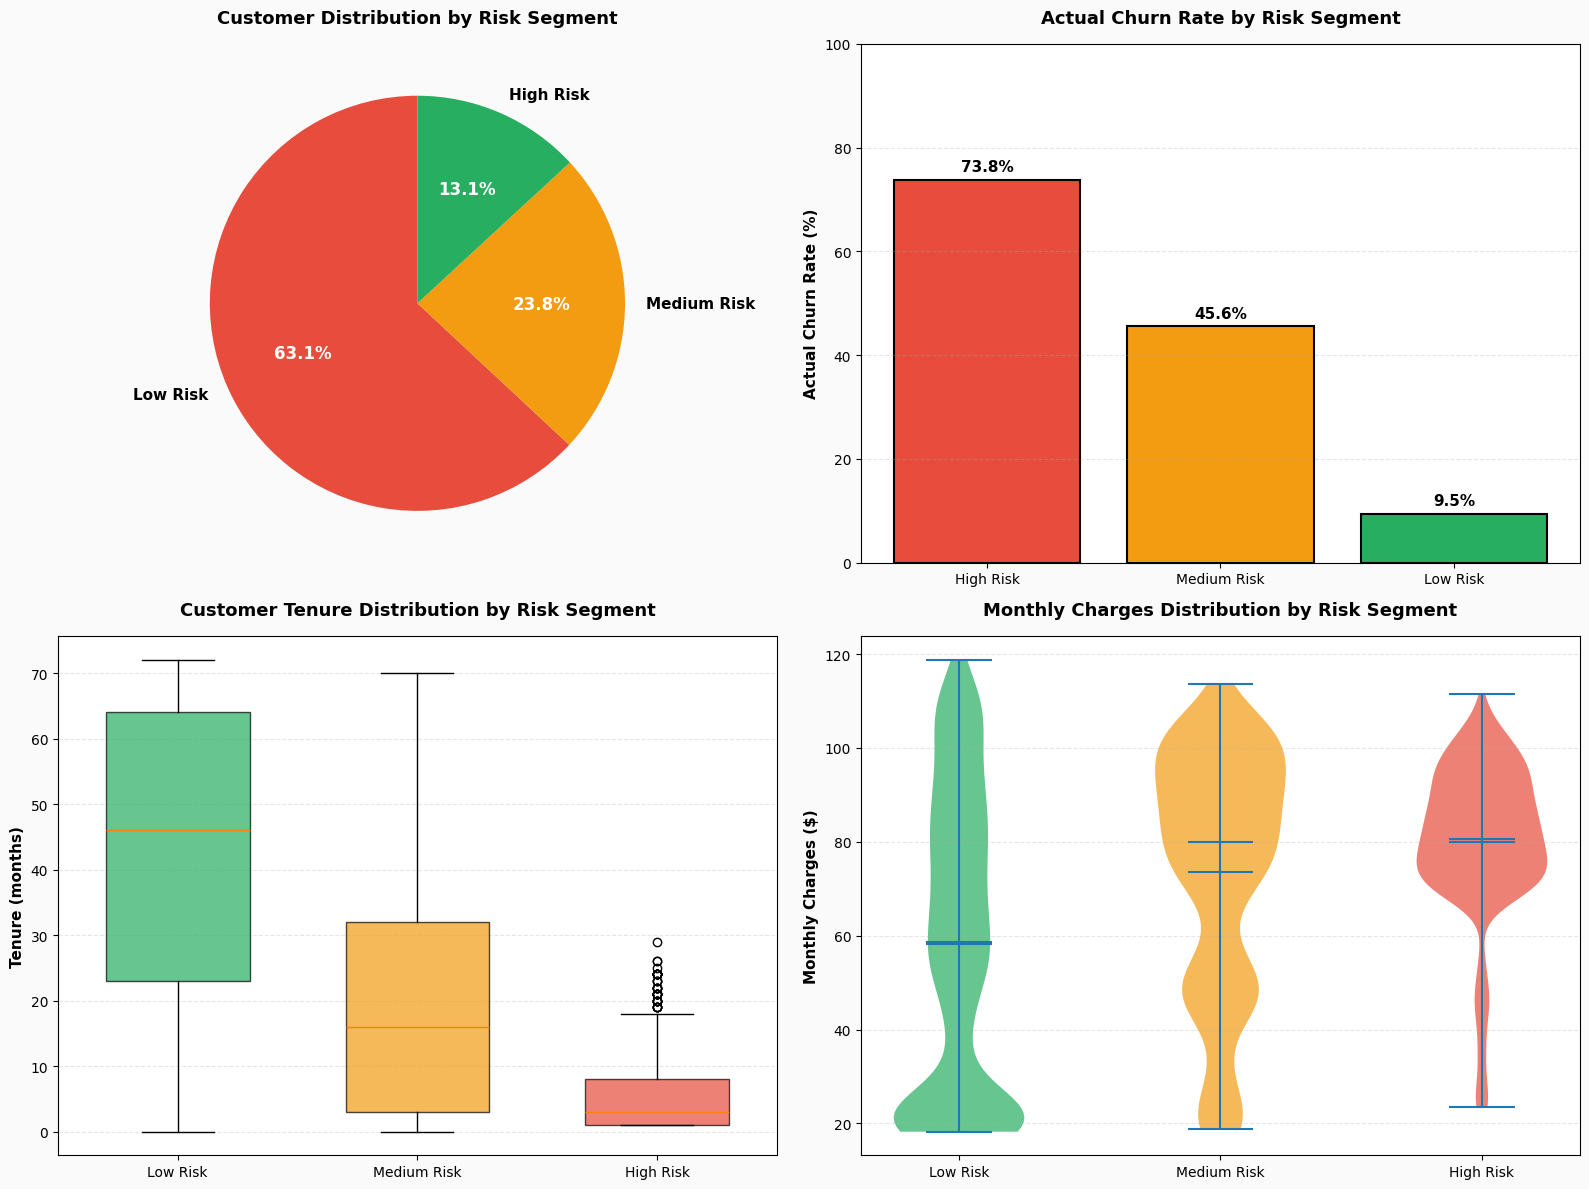

✅ Saved: risk_analysis_modern_charts.png


In [78]:
# ============================================================================
# 🎨 MODERN VISUALIZATION — RISK DISTRIBUTION & CHURN PATTERNS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('#FAFAFA')

# 1. Risk Segment Distribution (Pie Chart)
ax1 = axes[0, 0]
risk_counts = X_full['risk_segment'].value_counts()
colors_pie = ['#E74C3C', '#F39C12', '#27AE60']  # Red, Orange, Green
wedges, texts, autotexts = ax1.pie(
    risk_counts.values,
    labels=risk_counts.index,
    autopct='%1.1f%%',
    colors=colors_pie,
    startangle=90,
    textprops={'fontsize': 11, 'weight': 'bold'}
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')
ax1.set_title('Customer Distribution by Risk Segment', fontsize=13, fontweight='bold', pad=15)

# 2. Actual Churn Rate by Risk Segment (Bar Chart)
ax2 = axes[0, 1]
churn_rates = []
for segment in ['High Risk', 'Medium Risk', 'Low Risk']:
    rate = X_full[X_full['risk_segment'] == segment]['actual_churn'].mean()
    churn_rates.append(rate * 100)

bars = ax2.bar(['High Risk', 'Medium Risk', 'Low Risk'], churn_rates, 
               color=['#E74C3C', '#F39C12', '#27AE60'], edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Actual Churn Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Actual Churn Rate by Risk Segment', fontsize=13, fontweight='bold', pad=15)
ax2.set_ylim(0, 100)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, rate in zip(bars, churn_rates):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3. Tenure Distribution by Risk Segment (Box Plot)
ax3 = axes[1, 0]
tenure_by_risk = [X_full[X_full['risk_segment'] == seg]['tenure'].values 
                  for seg in ['Low Risk', 'Medium Risk', 'High Risk']]
bp = ax3.boxplot(tenure_by_risk, labels=['Low Risk', 'Medium Risk', 'High Risk'],
                 patch_artist=True, widths=0.6)

for patch, color in zip(bp['boxes'], ['#27AE60', '#F39C12', '#E74C3C']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax3.set_ylabel('Tenure (months)', fontsize=11, fontweight='bold')
ax3.set_title('Customer Tenure Distribution by Risk Segment', fontsize=13, fontweight='bold', pad=15)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# 4. Monthly Charges by Risk Segment (Violin Plot)
ax4 = axes[1, 1]
monthly_by_risk = [X_full[X_full['risk_segment'] == seg]['MonthlyCharges'].values 
                   for seg in ['Low Risk', 'Medium Risk', 'High Risk']]
parts = ax4.violinplot(monthly_by_risk, positions=[1, 2, 3], showmeans=True, showmedians=True)

# Color the violin plots
colors_violin = ['#27AE60', '#F39C12', '#E74C3C']
for pc, color in zip(parts['bodies'], colors_violin):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

ax4.set_xticks([1, 2, 3])
ax4.set_xticklabels(['Low Risk', 'Medium Risk', 'High Risk'])
ax4.set_ylabel('Monthly Charges ($)', fontsize=11, fontweight='bold')
ax4.set_title('Monthly Charges Distribution by Risk Segment', fontsize=13, fontweight='bold', pad=15)
ax4.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('risk_analysis_modern_charts.png', dpi=300, bbox_inches='tight', facecolor='#FAFAFA')
plt.show()

print("✅ Saved: risk_analysis_modern_charts.png")


In [79]:
# ============================================================================
# 🎯 DETAILED INSIGHTS & EXPLANATIONS — HIGH-RISK ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("🎯 DETAILED INSIGHTS & EXPLANATIONS — HIGH-RISK CHURNER ANALYSIS")
print("="*80)

# High-Risk Analysis
high_risk_df = X_full[X_full['risk_segment'] == 'High Risk']

print(f"\n1️⃣  HIGH-RISK SEGMENT PROFILE")
print("-" * 80)
print(f"   Total High-Risk Customers: {len(high_risk_df):,} ({len(high_risk_df)/len(X_full)*100:.1f}% of total)")
print(f"   Average Churn Probability: {high_risk_df['churn_probability'].mean():.3f}")
print(f"   Actual Churn Rate: {high_risk_df['actual_churn'].mean():.1%} ({high_risk_df['actual_churn'].sum():.0f} customers)")

# Tenure analysis
avg_tenure = high_risk_df['tenure'].mean()
pct_less_12m = (high_risk_df['tenure'] <= 12).sum() / len(high_risk_df) * 100
print(f"\n   🕐 Tenure Insight:")
print(f"      • Average tenure of high-risk customers: {avg_tenure:.1f} months")
print(f"      • {pct_less_12m:.1f}% are in their first 12 months (most critical period)")

# Monthly charges analysis
avg_monthly = high_risk_df['MonthlyCharges'].mean()
print(f"\n   💰 Pricing Insight:")
print(f"      • Average monthly charges: ${avg_monthly:.2f}")
print(f"      • High-risk customers pay {avg_monthly/X_full['MonthlyCharges'].mean():.1f}x the average")

# Services analysis
avg_services = high_risk_df['NumServices'].apply(int).mean()
print(f"\n   📦 Service Utilization:")
print(f"      • Average services per customer: {avg_services:.1f}")
print(f"      • Low service adoption correlates with churn risk")

# Contract analysis
try:
    month_to_month_rate = (high_risk_df['Contract'] == 1).sum() / len(high_risk_df) * 100
    print(f"\n   📋 Contract Type:")
    print(f"      • {month_to_month_rate:.1f}% are on month-to-month contracts (high flexibility = higher churn risk)")
except:
    pass

print(f"\n2️⃣  TOP 3 HIGH-RISK CUSTOMER CHARACTERISTICS")
print("-" * 80)

# Identify characteristics of high-risk customers
high_risk_chars = []

# Characteristic 1: Tenure
high_risk_chars.append({
    'Name': 'New Customers (Tenure < 12 months)',
    'Count': (high_risk_df['tenure'] <= 12).sum(),
    'Pct': (high_risk_df['tenure'] <= 12).sum() / len(high_risk_df) * 100,
    'Risk': 'CRITICAL'
})

# Characteristic 2: High Monthly Charges
high_risk_chars.append({
    'Name': 'High Monthly Charges (> $75/month)',
    'Count': (high_risk_df['MonthlyCharges'] > 75).sum(),
    'Pct': (high_risk_df['MonthlyCharges'] > 75).sum() / len(high_risk_df) * 100,
    'Risk': 'HIGH'
})

# Characteristic 3: Few Services
high_risk_chars.append({
    'Name': 'Low Service Adoption (≤ 2 services)',
    'Count': (high_risk_df['NumServices'] <= 2).sum(),
    'Pct': (high_risk_df['NumServices'] <= 2).sum() / len(high_risk_df) * 100,
    'Risk': 'HIGH'
})

for i, char in enumerate(high_risk_chars, 1):
    print(f"   {i}. {char['Name']}")
    print(f"      • Prevalence: {char['Pct']:.1f}% of high-risk segment ({char['Count']:,} customers)")
    print(f"      • Risk Level: {char['Risk']}")

print(f"\n3️⃣  ACTIONABLE RECOMMENDATIONS")
print("-" * 80)
print(f"""
   FOR HIGH-RISK CUSTOMERS ({len(high_risk_df):,} customers):
   ✓ Implement proactive retention campaigns
   ✓ Offer loyalty discounts for customers in first 12 months
   ✓ Bundle services to increase stickiness (cross-sell fiber + TV bundles)
   ✓ Assign dedicated account managers to high-value customers
   ✓ Conduct satisfaction surveys in month 6 & 9 (early warning system)
   
   FOR MEDIUM-RISK CUSTOMERS ({len(X_full[X_full['risk_segment'] == 'Medium Risk']):,} customers):
   ✓ Monitor for churn signals (service cancellations, support tickets)
   ✓ Targeted upsell of premium services
   ✓ Seasonal promotions to prevent cancellation
   
   FOR LOW-RISK CUSTOMERS ({len(X_full[X_full['risk_segment'] == 'Low Risk']):,} customers):
   ✓ Focus on VIP/loyalty programs
   ✓ Annual satisfaction check-ins
   ✓ Opportunity for advocacy programs (referrals)
""")

print("="*80)



🎯 DETAILED INSIGHTS & EXPLANATIONS — HIGH-RISK CHURNER ANALYSIS

1️⃣  HIGH-RISK SEGMENT PROFILE
--------------------------------------------------------------------------------
   Total High-Risk Customers: 925 (13.1% of total)
   Average Churn Probability: 0.711
   Actual Churn Rate: 73.8% (683 customers)

   🕐 Tenure Insight:
      • Average tenure of high-risk customers: 5.4 months
      • 88.3% are in their first 12 months (most critical period)

   💰 Pricing Insight:
      • Average monthly charges: $80.00
      • High-risk customers pay 1.2x the average

   📦 Service Utilization:
      • Average services per customer: 3.6
      • Low service adoption correlates with churn risk

   📋 Contract Type:
      • 99.6% are on month-to-month contracts (high flexibility = higher churn risk)

2️⃣  TOP 3 HIGH-RISK CUSTOMER CHARACTERISTICS
--------------------------------------------------------------------------------
   1. New Customers (Tenure < 12 months)
      • Prevalence: 88.3% of hig

In [ ]:
# Trees Visuals

### ✅ Testing Tree Visualizations

Run the cells below in order to generate tree visualizations. Make sure you've already:
1. Trained the models (run previous cells)
2. Have `X_train`, `X_test`, `y_train`, `y_test` available
3. Have `preprocessor` defined

## 🌳 Decision Tree Visualizations

Visualizing individual decision trees to understand the interpretable decision-making process for churn prediction.

We'll visualize:
1. **Standalone Decision Tree** - Single interpretable tree
2. **Random Forest - Most Important Tree** - Key tree from ensemble
3. **Gradient Boosting - First Tree** - Initial learner from boosting

In [88]:
# Import tree visualization libraries
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Check if required variables exist
try:
    # Test if preprocessor, X_train, y_train exist
    test_vars = [preprocessor, X_train, y_train, X_test, y_test]
    print("✅ All required variables found (preprocessor, X_train, y_train, X_test, y_test)")
except NameError as e:
    print(f"❌ ERROR: Missing required variable: {e}")
    print("\n⚠️  Please run the following cells first:")
    print("   1. Data loading and preprocessing cells")
    print("   2. Feature engineering cells")
    print("   3. Train-test split cell: X_train, X_test, y_train, y_test = train_test_split(...)")
    print("   4. Preprocessor cell: preprocessor = get_preprocessor(X_train)")
    raise

# Train individual models for tree visualization
print("\nTraining models for tree visualization...")

# 1. Standalone Decision Tree (simpler for visualization)
dt_simple = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=4,  # Limited depth for better visualization
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)

dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', dt_simple)
])
print("   Training Decision Tree...")
dt_pipe.fit(X_train, y_train)
print(f"   ✓ Decision Tree trained (depth={dt_simple.max_depth})")

# 2. Random Forest (extract most important tree)
rf_viz = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,  # Limited for visualization
    min_samples_split=50,
    min_samples_leaf=20,
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_viz)
])
print("   Training Random Forest...")
rf_pipe.fit(X_train, y_train)
print(f"   ✓ Random Forest trained ({rf_viz.n_estimators} trees)")

# 3. Gradient Boosting (extract first tree)
gb_viz = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)

gb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gb_viz)
])
print("   Training Gradient Boosting...")
gb_pipe.fit(X_train, y_train)
print(f"   ✓ Gradient Boosting trained ({gb_viz.n_estimators} trees)")

print("\n✅ All models trained successfully for visualization!")

✅ All required variables found (preprocessor, X_train, y_train, X_test, y_test)

Training models for tree visualization...
   Training Decision Tree...
   ✓ Decision Tree trained (depth=4)
   Training Random Forest...
   ✓ Random Forest trained (100 trees)
   Training Gradient Boosting...
   ✓ Gradient Boosting trained (100 trees)

✅ All models trained successfully for visualization!
   ✓ Gradient Boosting trained (100 trees)

✅ All models trained successfully for visualization!


Visualizing Tree 1: Standalone Decision Tree

Total features after preprocessing: 30


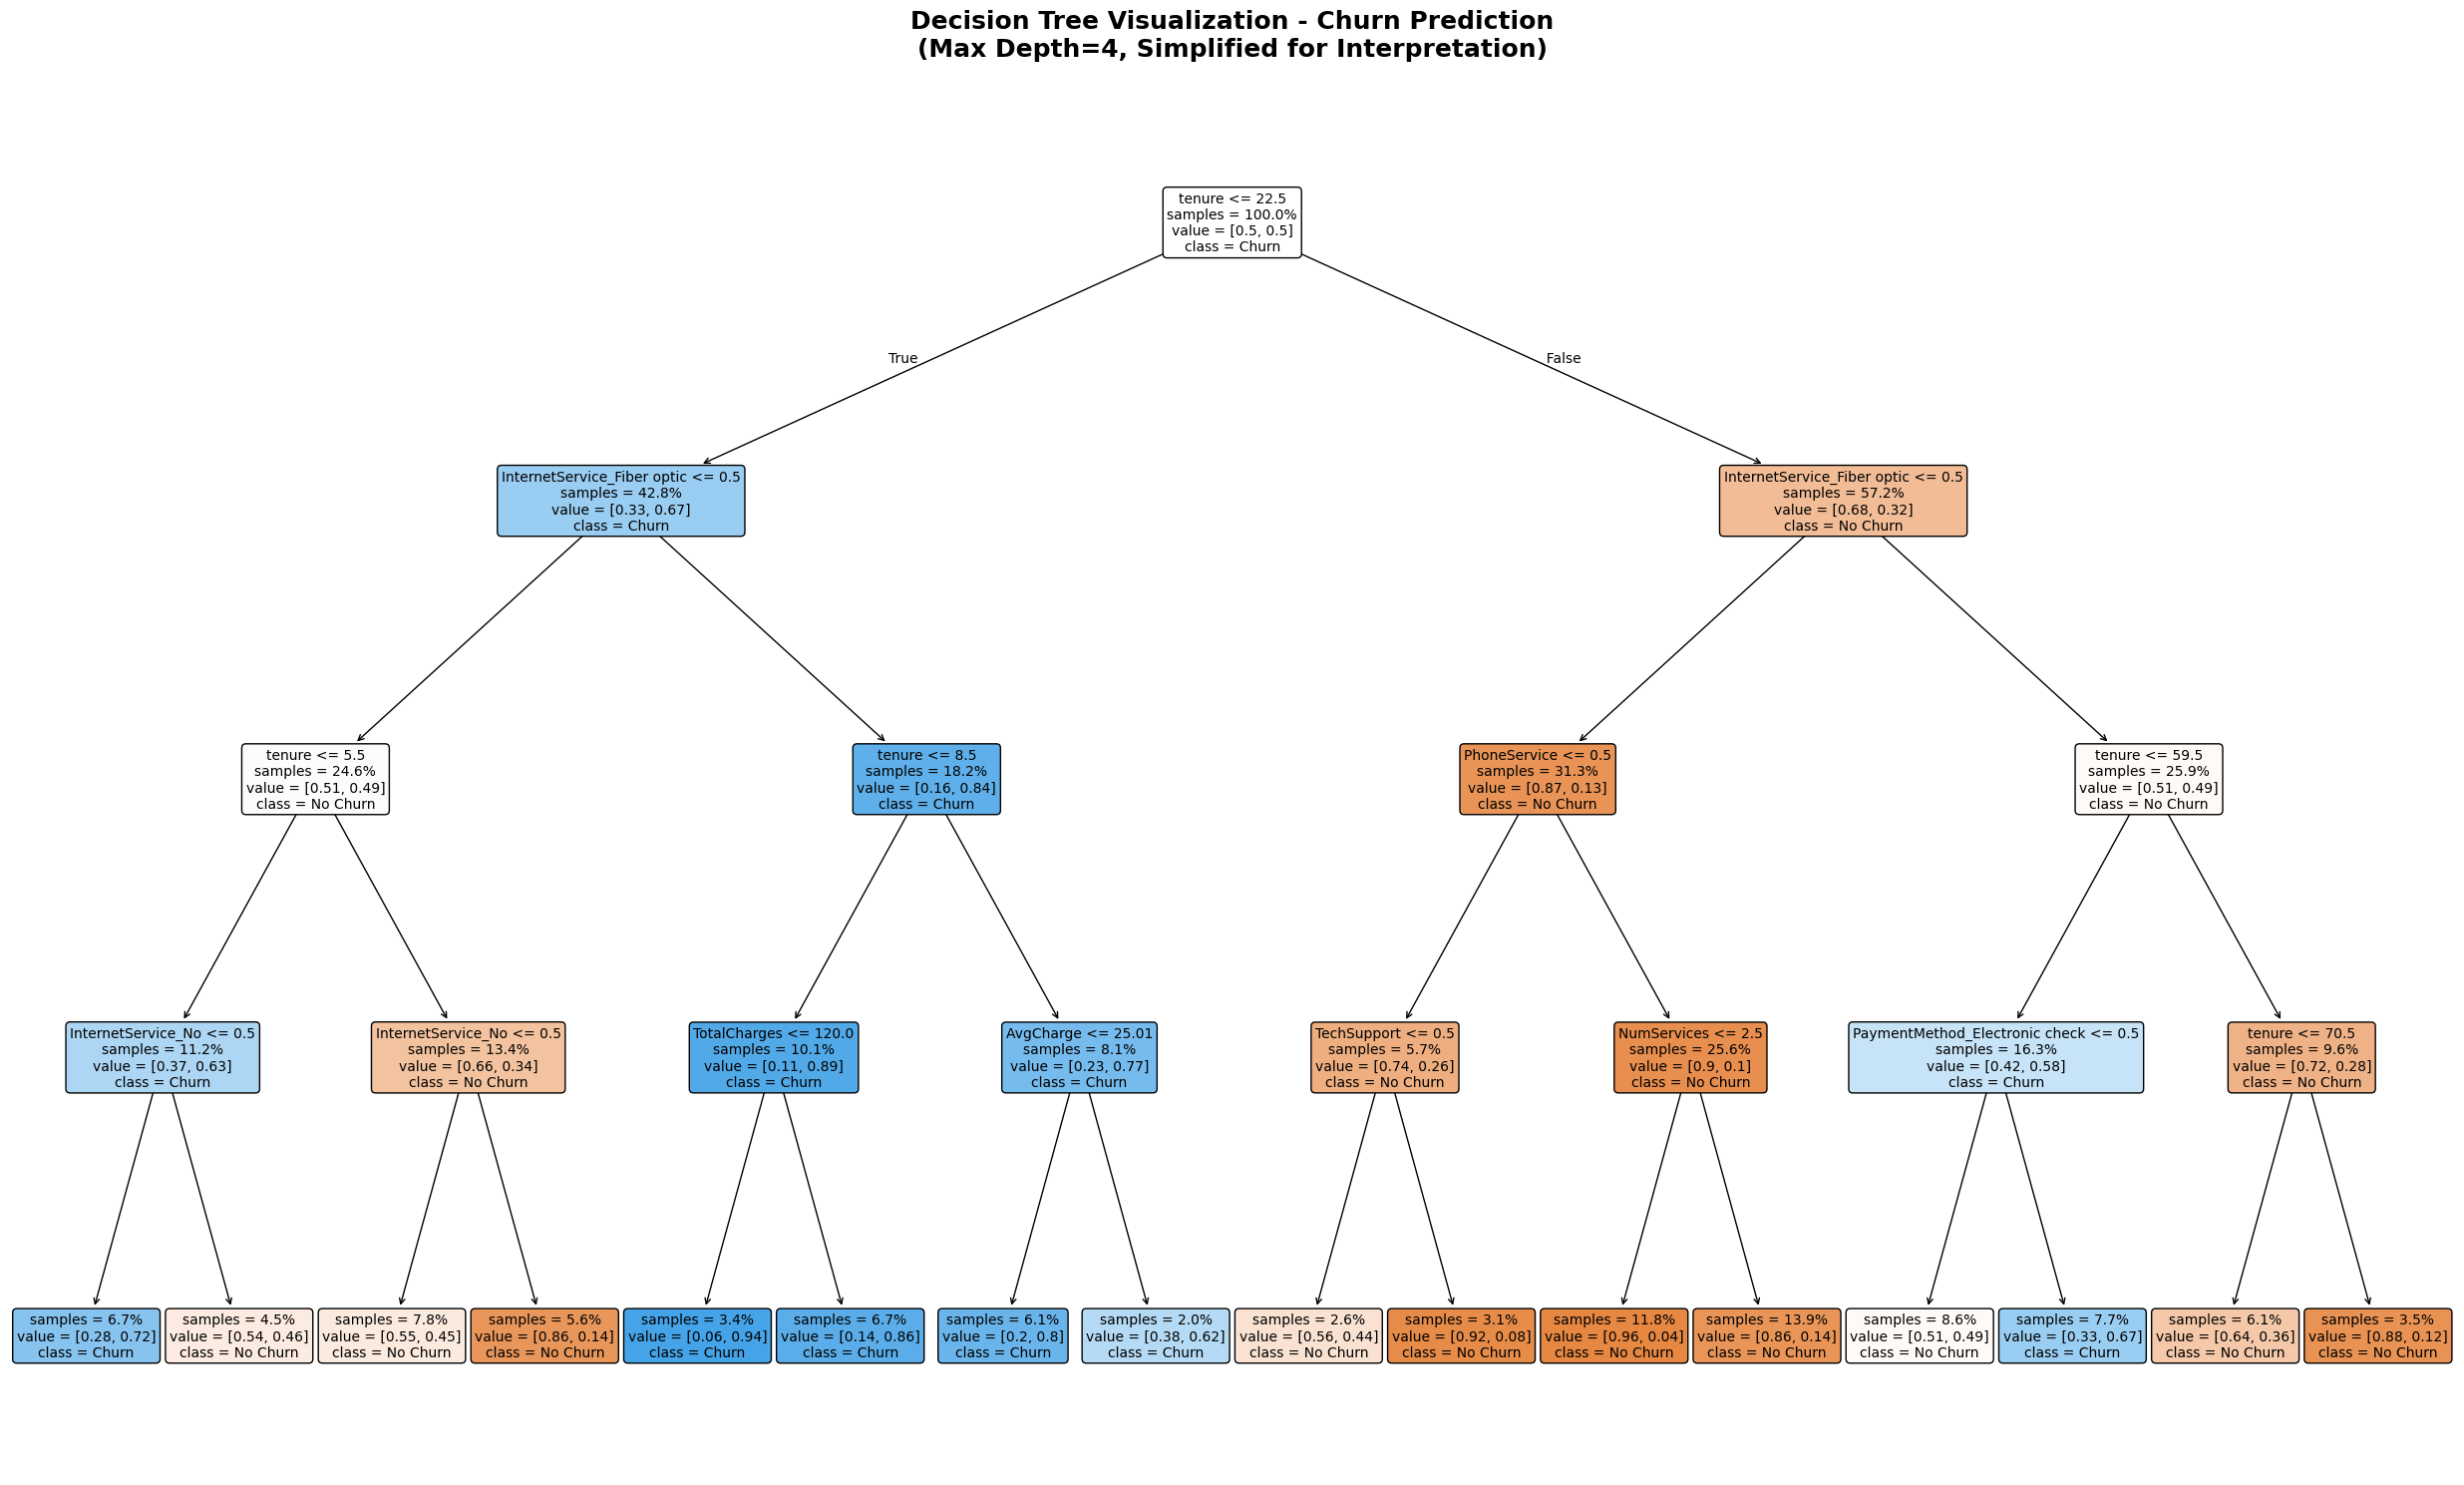

✅ Saved: decision_tree_standalone.png

📝 TEXT REPRESENTATION OF DECISION TREE (First 3 Levels)
|--- tenure <= 22.50
|   |--- InternetService_Fiber optic <= 0.50
|   |   |--- tenure <= 5.50
|   |   |   |--- InternetService_No <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- InternetService_No >  0.50
|   |   |   |   |--- class: 0
|   |   |--- tenure >  5.50
|   |   |   |--- InternetService_No <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- InternetService_No >  0.50
|   |   |   |   |--- class: 0
|   |--- InternetService_Fiber optic >  0.50
|   |   |--- tenure <= 8.50
|   |   |   |--- TotalCharges <= 120.00
|   |   |   |   |--- class: 1
|   |   |   |--- TotalCharges >  120.00
|   |   |   |   |--- class: 1
|   |   |--- tenure >  8.50
|   |   |   |--- AvgCharge <= 25.01
|   |   |   |   |--- class: 1
|   |   |   |--- AvgCharge >  25.01
|   |   |   |   |--- class: 1
|--- tenure >  22.50
|   |--- InternetService_Fiber optic <= 0.50
|   |   |--- PhoneService <= 0.50
|   |   |   |-

In [89]:
# ============================================================================
# 🌳 TREE 1: STANDALONE DECISION TREE (Most Interpretable)
# ============================================================================

print("Visualizing Tree 1: Standalone Decision Tree\n")

# Get the classifier and feature names
dt_classifier = dt_pipe.named_steps['classifier']
preprocessor_dt = dt_pipe.named_steps['preprocessor']

# Get feature names from preprocessor
categorical_features = ['gender', 'InternetService', 'PaymentMethod', 'tenure_group']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumServices', 'AvgCharge']
boolean_cols = [
    'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'LessThan6Months',
    'AvailingInternetService', 'LongTerm'
]

# Get categorical feature names after one-hot encoding
cat_transformer = preprocessor_dt.named_transformers_['cat']
cat_feature_names = cat_transformer.get_feature_names_out(categorical_features).tolist()

# Combine all feature names
feature_names_tree = cat_feature_names + numeric_features + boolean_cols

print(f"Total features after preprocessing: {len(feature_names_tree)}")

# Create figure
fig, ax = plt.subplots(figsize=(25, 15))
fig.patch.set_facecolor('white')

# Plot the tree
plot_tree(
    dt_classifier,
    feature_names=feature_names_tree,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10,
    ax=ax,
    proportion=True,
    impurity=False,
    precision=2
)

plt.title('Decision Tree Visualization - Churn Prediction\n(Max Depth=4, Simplified for Interpretation)', 
          fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('decision_tree_standalone.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Saved: decision_tree_standalone.png")

# Print text representation for key insights
print("\n" + "="*80)
print("📝 TEXT REPRESENTATION OF DECISION TREE (First 3 Levels)")
print("="*80)
tree_rules = export_text(dt_classifier, feature_names=feature_names_tree, max_depth=3)
print(tree_rules[:2000])  # Print first 2000 characters
print("="*80)

Visualizing Tree 2: Random Forest - Most Important Tree

Selected Tree Index: 0 (from 100 trees)
Tree Max Depth: 5
Tree Number of Leaves: 25


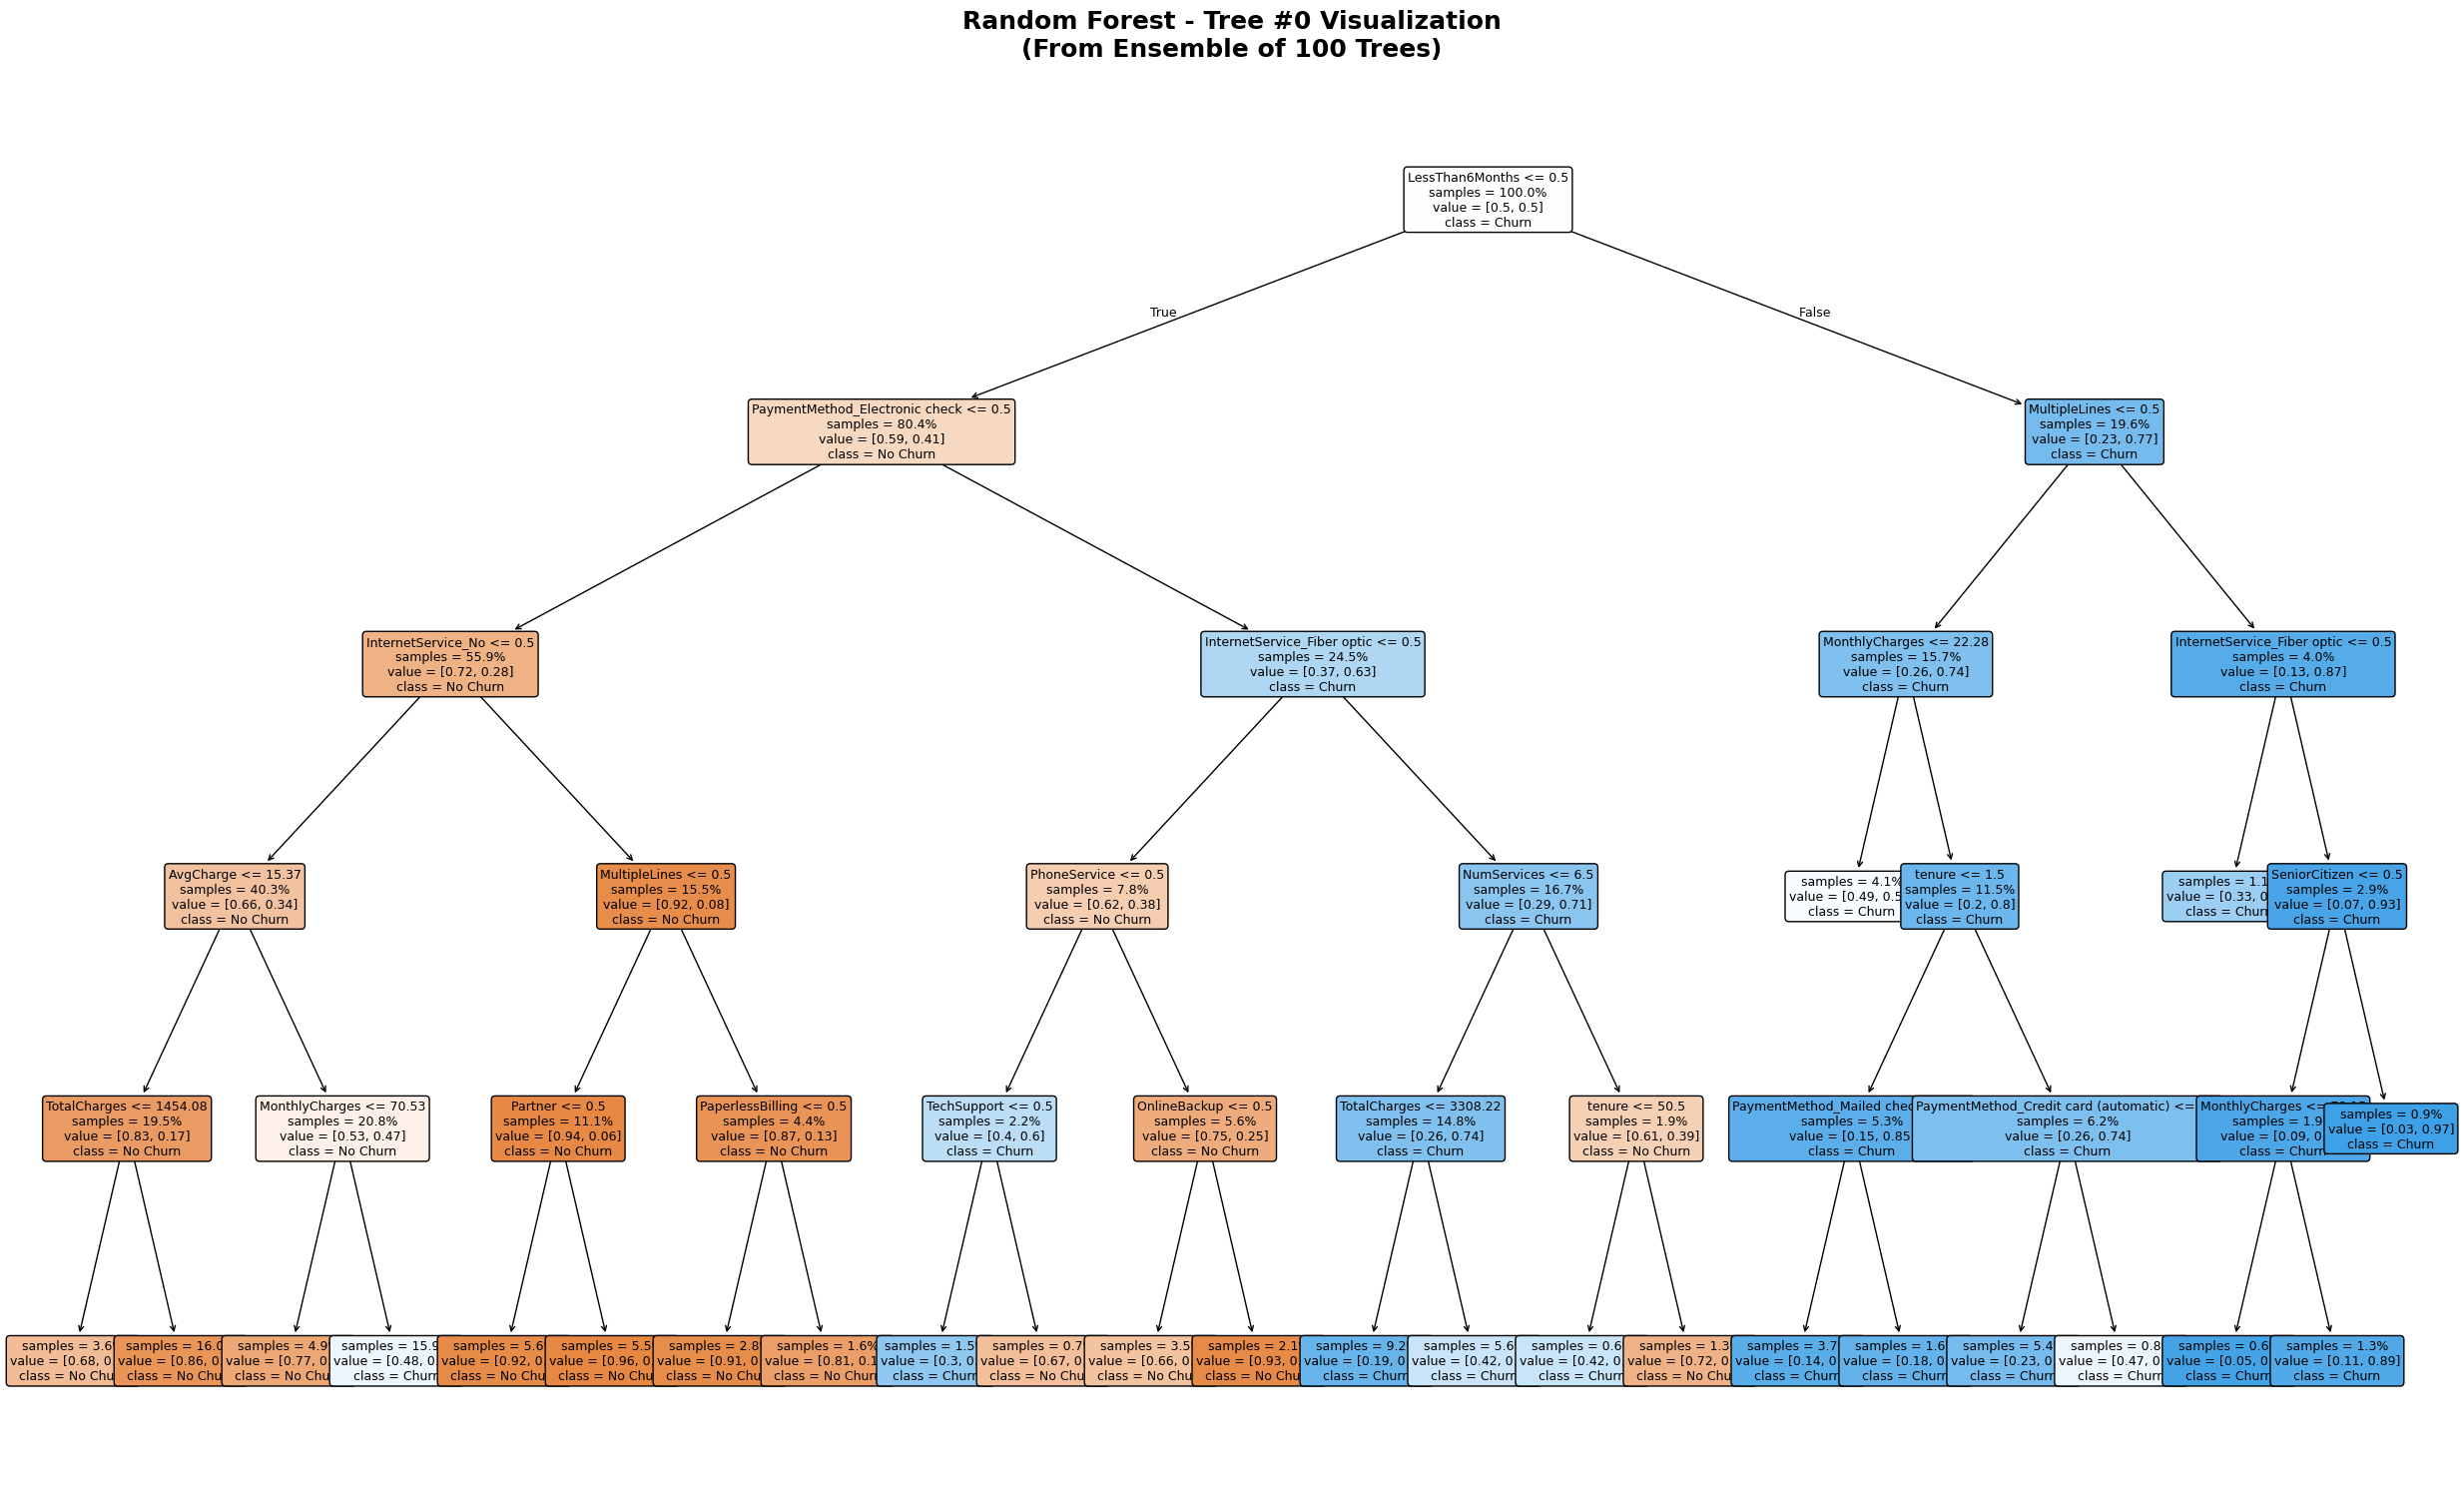

✅ Saved: random_forest_tree.png

📊 RANDOM FOREST - TOP 10 FEATURE IMPORTANCES
tenure                                        → 0.148871
InternetService_Fiber optic                   → 0.130380
AvgCharge                                     → 0.106002
LongTerm                                      → 0.086517
TotalCharges                                  → 0.073635
PaymentMethod_Electronic check                → 0.070419
LessThan6Months                               → 0.067886
MonthlyCharges                                → 0.066367
InternetService_No                            → 0.054142
AvailingInternetService                       → 0.041403


In [94]:
# ============================================================================
# 🌳 TREE 2: RANDOM FOREST - MOST IMPORTANT TREE
# ============================================================================

print("Visualizing Tree 2: Random Forest - Most Important Tree\n")

# Get the Random Forest classifier
rf_classifier = rf_pipe.named_steps['classifier']

# Find the tree with highest feature importance contribution
# Use the first tree as a representative (or select based on OOB score if available)
tree_idx = 0  # First tree
selected_tree = rf_classifier.estimators_[tree_idx]

print(f"Selected Tree Index: {tree_idx} (from {len(rf_classifier.estimators_)} trees)")
print(f"Tree Max Depth: {selected_tree.get_depth()}")
print(f"Tree Number of Leaves: {selected_tree.get_n_leaves()}")

# Create figure
fig, ax = plt.subplots(figsize=(25, 15))
fig.patch.set_facecolor('white')

# Plot the tree
plot_tree(
    selected_tree,
    feature_names=feature_names_tree,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=9,
    ax=ax,
    proportion=True,
    impurity=False,
    precision=2
)

plt.title(f'Random Forest - Tree #{tree_idx} Visualization\n(From Ensemble of {len(rf_classifier.estimators_)} Trees)', 
          fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('random_forest_tree.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Saved: random_forest_tree.png")

# Show feature importance from Random Forest
print("\n" + "="*80)
print("📊 RANDOM FOREST - TOP 10 FEATURE IMPORTANCES")
print("="*80)
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names_tree,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

for idx, row in feature_importance_rf.iterrows():
    print(f"{row['Feature']:45s} → {row['Importance']:.6f}")
print("="*80)

Visualizing Tree 3: Gradient Boosting - First Tree (Initial Learner)

First Tree from Gradient Boosting
Tree Max Depth: 3
Tree Number of Leaves: 8
Total Trees in Ensemble: 100


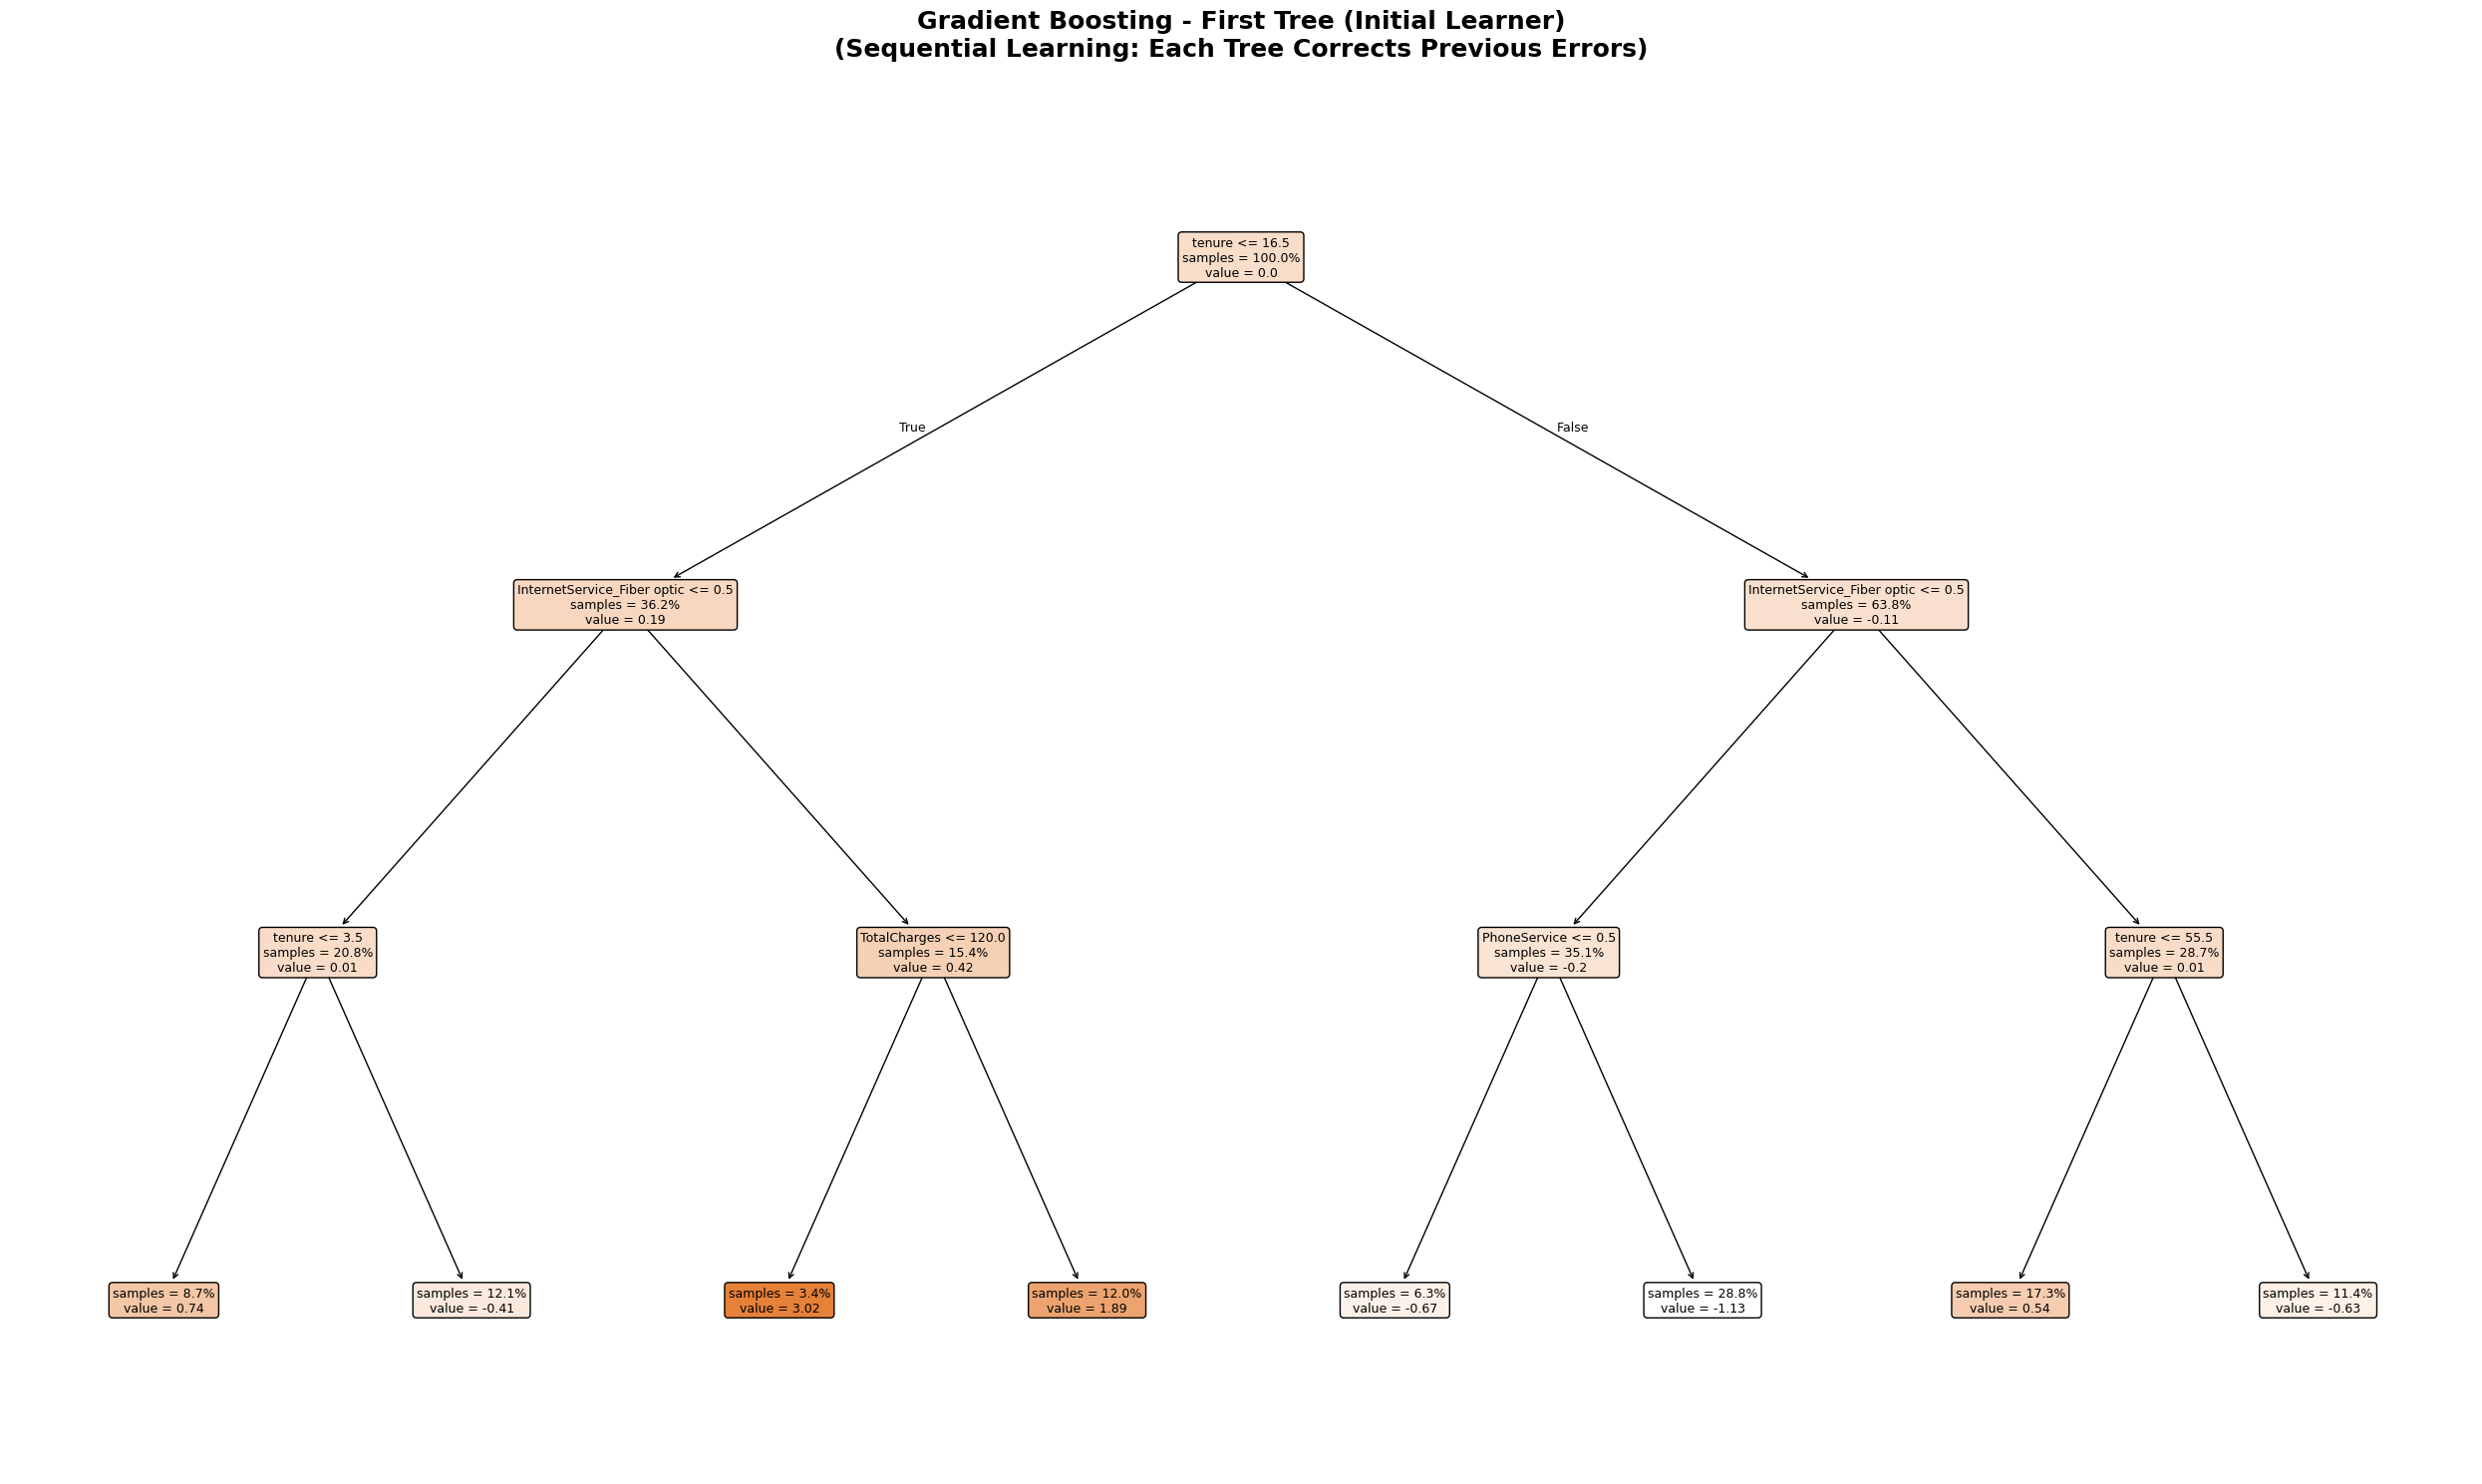

✅ Saved: gradient_boosting_tree.png

📊 GRADIENT BOOSTING - TOP 10 FEATURE IMPORTANCES
tenure                                        → 0.343422
InternetService_Fiber optic                   → 0.216073
PaymentMethod_Electronic check                → 0.152113
AvgCharge                                     → 0.045652
TotalCharges                                  → 0.035848
MonthlyCharges                                → 0.033555
PaperlessBilling                              → 0.029978
InternetService_No                            → 0.027883
LessThan6Months                               → 0.025668
AvailingInternetService                       → 0.019023


In [92]:
# ============================================================================
# 🌳 TREE 3: GRADIENT BOOSTING - FIRST TREE (Initial Learner)
# ============================================================================

print("Visualizing Tree 3: Gradient Boosting - First Tree (Initial Learner)\n")

# Get the Gradient Boosting classifier
gb_classifier = gb_pipe.named_steps['classifier']

# Extract the first tree (initial learner)
first_tree = gb_classifier.estimators_[0, 0]

print(f"First Tree from Gradient Boosting")
print(f"Tree Max Depth: {first_tree.get_depth()}")
print(f"Tree Number of Leaves: {first_tree.get_n_leaves()}")
print(f"Total Trees in Ensemble: {len(gb_classifier.estimators_)}")

# Create figure
fig, ax = plt.subplots(figsize=(25, 15))
fig.patch.set_facecolor('white')

# Plot the tree
plot_tree(
    first_tree,
    feature_names=feature_names_tree,
    filled=True,
    rounded=True,
    fontsize=9,
    ax=ax,
    proportion=True,
    impurity=False,
    precision=2
)

plt.title('Gradient Boosting - First Tree (Initial Learner)\n(Sequential Learning: Each Tree Corrects Previous Errors)', 
          fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('gradient_boosting_tree.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Saved: gradient_boosting_tree.png")

# Show feature importance from Gradient Boosting
print("\n" + "="*80)
print("📊 GRADIENT BOOSTING - TOP 10 FEATURE IMPORTANCES")
print("="*80)
feature_importance_gb = pd.DataFrame({
    'Feature': feature_names_tree,
    'Importance': gb_classifier.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

for idx, row in feature_importance_gb.iterrows():
    print(f"{row['Feature']:45s} → {row['Importance']:.6f}")
print("="*80)

Creating Comparative Tree Performance Analysis...



/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_13809/1326951408.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.08, 1, 0.92])
/var/folders/c0/4_nzbp_d3p7d9f_517mx6zlh0000gn/T/ipykernel_13809/1326951408.py:87: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('tree_models_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
/Users/ob/telecom-churn/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


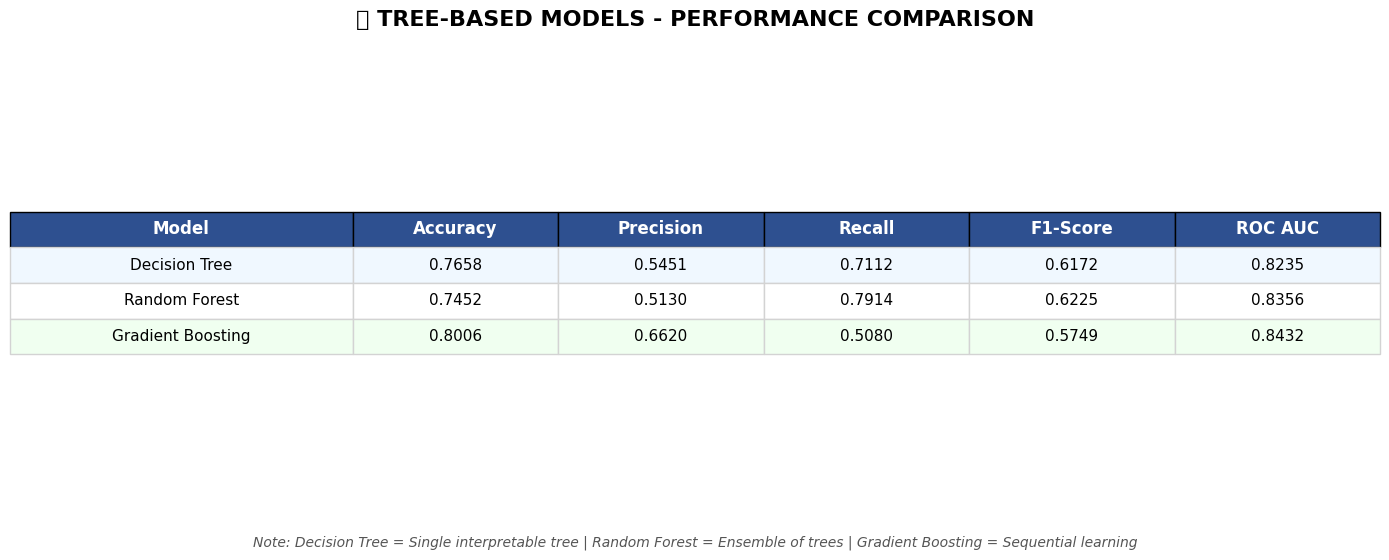

✅ Saved: tree_models_comparison.png

🎯 TREE MODELS SUMMARY
            Model  Accuracy  Precision   Recall  F1-Score  ROC AUC
    Decision Tree  0.765791   0.545082 0.711230  0.617169 0.823456
    Random Forest  0.745209   0.512998 0.791444  0.622503 0.835616
Gradient Boosting  0.800568   0.662021 0.508021  0.574887 0.843223

💡 KEY INSIGHTS:
   • Decision Tree: Most interpretable, lower performance
   • Random Forest: Better generalization through ensemble voting
   • Gradient Boosting: Highest performance through sequential error correction


In [93]:
# ============================================================================
# 📊 COMPARATIVE TREE ANALYSIS - SIDE BY SIDE
# ============================================================================

print("Creating Comparative Tree Performance Analysis...\n")

# Evaluate all three tree-based models
tree_models = {
    'Decision Tree': dt_pipe,
    'Random Forest': rf_pipe,
    'Gradient Boosting': gb_pipe
}

tree_comparison = []

for model_name, model_pipe in tree_models.items():
    # Predictions
    y_pred = model_pipe.predict(X_test)
    y_pred_proba = model_pipe.predict_proba(X_test)[:, 1]
    
    # Metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    
    tree_comparison.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    })

comparison_df = pd.DataFrame(tree_comparison)

# Create comparison table
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

# Format data for table
table_data = [['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']]
for _, row in comparison_df.iterrows():
    table_data.append([
        row['Model'],
        f"{row['Accuracy']:.4f}",
        f"{row['Precision']:.4f}",
        f"{row['Recall']:.4f}",
        f"{row['F1-Score']:.4f}",
        f"{row['ROC AUC']:.4f}"
    ])

# Create table
tbl = ax.table(cellText=table_data, cellLoc='center', loc='center',
               colWidths=[0.25, 0.15, 0.15, 0.15, 0.15, 0.15])

tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1, 2.5)

# Style header
for i in range(6):
    cell = tbl[(0, i)]
    cell.set_facecolor('#2E5090')
    cell.set_text_props(weight='bold', color='white', fontsize=12)

# Style data rows
colors = ['#F0F8FF', '#FFFFFF', '#F0FFF0']
for i in range(1, len(table_data)):
    for j in range(6):
        cell = tbl[(i, j)]
        cell.set_facecolor(colors[i-1])
        cell.set_text_props(fontsize=11)
        cell.set_edgecolor('#D3D3D3')

# Add title
plt.text(0.5, 0.95, '📊 TREE-BASED MODELS - PERFORMANCE COMPARISON', 
         ha='center', va='top', fontsize=16, fontweight='bold',
         transform=fig.transFigure)

# Add notes
notes = "Note: Decision Tree = Single interpretable tree | Random Forest = Ensemble of trees | Gradient Boosting = Sequential learning"
plt.text(0.5, 0.05, notes, 
         ha='center', va='bottom', fontsize=10, style='italic', color='#555555',
         transform=fig.transFigure)

plt.tight_layout(rect=[0, 0.08, 1, 0.92])
plt.savefig('tree_models_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Saved: tree_models_comparison.png")

# Print summary
print("\n" + "="*80)
print("🎯 TREE MODELS SUMMARY")
print("="*80)
print(comparison_df.to_string(index=False))
print("\n💡 KEY INSIGHTS:")
print("   • Decision Tree: Most interpretable, lower performance")
print("   • Random Forest: Better generalization through ensemble voting")
print("   • Gradient Boosting: Highest performance through sequential error correction")
print("="*80)